In [1]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.stattools import coint, adfuller
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from pykalman import KalmanFilter
import seaborn
import seaborn as sns; sns.set(style="whitegrid")
from statsmodels.tsa.vector_ar.vecm import coint_johansen
Katleho = pd.read_csv('Pairs.csv', delimiter=';', decimal=',')
Katleho['Date'] = pd.to_datetime(Katleho['Date'], format='%Y-%m-%d %H:%M:%S')
Hlompho = Katleho.set_index(['Date'])
print(Hlompho)

                    BNB     Ethereum    Litecoin    Ripple      USDT
Date                                                                
2018-01-01     8.414610   772.640991  229.033005  2.391030  1.007280
2018-01-02     8.837770   884.443970  255.684006  2.480900  1.004900
2018-01-03     9.535880   962.719971  245.367996  3.105370  1.013440
2018-01-04     9.213990   980.921997  241.369995  3.196630  1.002530
2018-01-05    14.917200   997.719971  249.270996  3.048710  0.998634
...                 ...          ...         ...       ...       ...
2025-10-08  1306.599365  4527.647949  118.636482  2.880804  1.000317
2025-10-09  1255.890625  4369.143555  125.933968  2.804910  1.000492
2025-10-10  1106.898560  3843.008789   96.627251  2.358597  1.001756
2025-10-11  1137.199341  3750.611572   93.419548  2.385982  1.001073
2025-10-12  1303.117310  4164.427734   98.760643  2.534958  1.001257

[2842 rows x 5 columns]


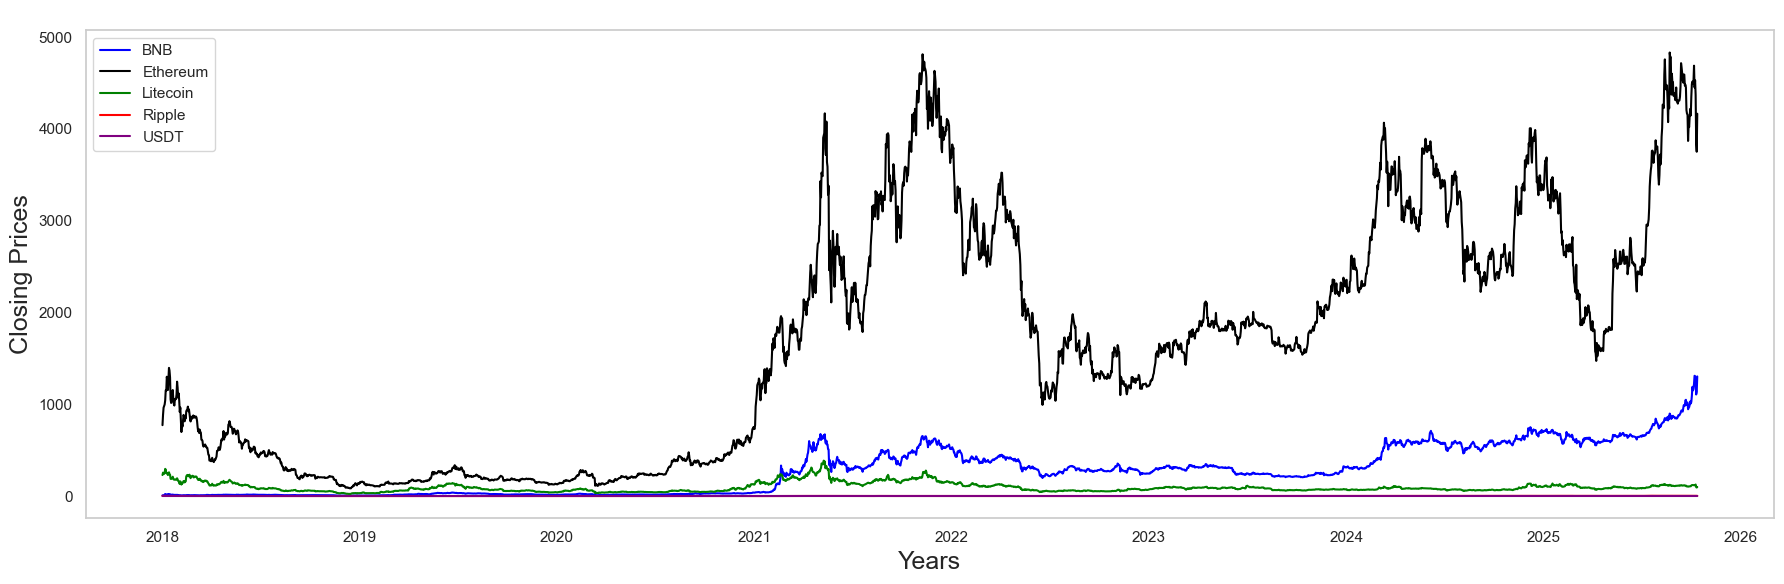

In [20]:
import matplotlib.pyplot as plt

colors = ['blue', 'black', 'green', 'red', 'purple', 'brown']

plt.figure(figsize=(18, 6))

for col, color in zip(Hlompho.select_dtypes(include='number').columns, colors):
    plt.plot(Hlompho.index, Hlompho[col], label=col, color=color)

plt.xlabel("Years", fontsize=18)
plt.ylabel("Closing Prices", fontsize=18)
plt.title(" ")
plt.legend()
plt.tight_layout()
plt.grid(False)

# Save as high-resolution EPS
output_path = r"C:\Users\katle\OneDrive\Documents\Makatjane\Makatjane 2026\Pairs trading\closing.eps"
plt.savefig(output_path, format='eps', dpi=1200)  # dpi=1200 for high resolution

plt.show()


In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import coint

# Load your dataset
Katleho = pd.read_csv('Pairs.csv', delimiter=';', decimal=',')
Katleho['Date'] = pd.to_datetime(Katleho['Date'], format='%Y-%m-%d %H:%M:%S')
Hlompho = Katleho.set_index('Date')

# Log-transform prices for stability
Hlompho_log = np.log(Hlompho)
symbols = Hlompho_log.columns.tolist()

# Significance level for cointegration
alpha = 0.1  # relaxed threshold for exploratory analysis

# Store cointegrated pairs
cointegrated_pairs = []

# Test every unique pair for cointegration
for i in range(len(symbols)):
    for j in range(i + 1, len(symbols)):
        s1 = Hlompho_log[symbols[i]]
        s2 = Hlompho_log[symbols[j]]
        
        score, pvalue, _ = coint(s1, s2)
        
        if pvalue < alpha:
            cointegrated_pairs.append((symbols[i], symbols[j], pvalue))

# Display results
if cointegrated_pairs:
    print("Cointegrated crypto pairs:")
    for pair in cointegrated_pairs:
        print(f"{pair[0]} & {pair[1]} → p-value: {pair[2]:.4f}")
else:
    print("No cointegrated pairs found at the chosen significance level.")


Cointegrated crypto pairs:
BNB & Ethereum → p-value: 0.0529
Litecoin & USDT → p-value: 0.0978


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


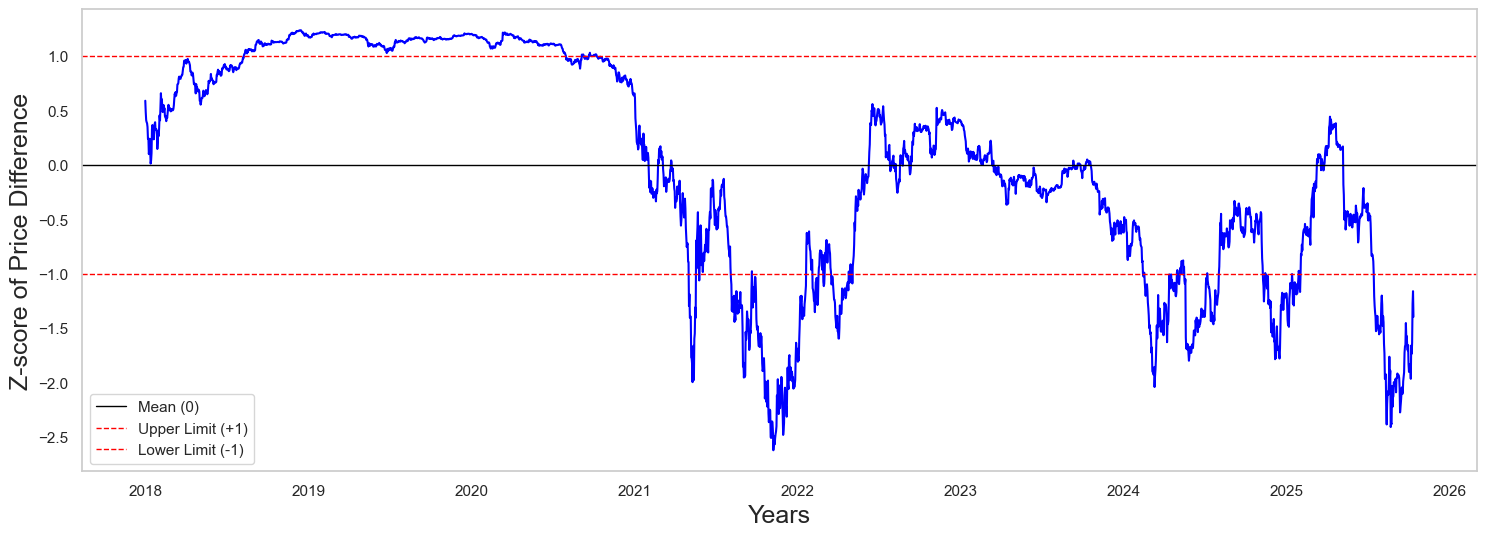

Plot saved as EPS at: C:\Users\katle\OneDrive\Documents\Makatjane\Makatjane 2026\Pairs trading\BNB_Ethereum_Spread.eps


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os

# Compute spread between BNB and Ethereum
spread1 = Hlompho['BNB'] - Hlompho['Ethereum']

# Standardize to z-score
zscore_spread1 = (spread1 - spread1.mean()) / spread1.std()

# Define thresholds
upper_limit = 1
lower_limit = -1

# Plot spread
plt.figure(figsize=(18,6))
plt.plot(zscore_spread1, color='blue')
plt.axhline(0, color='black', linestyle='-', linewidth=1, label='Mean (0)')
plt.axhline(upper_limit, color='red', linestyle='--', linewidth=1, label='Upper Limit (+1)')
plt.axhline(lower_limit, color='red', linestyle='--', linewidth=1, label='Lower Limit (-1)')
plt.xlabel('Years', fontsize=18)
plt.ylabel('Z-score of Price Difference', fontsize=18)
plt.legend()
plt.grid(False)

# Ensure the folder exists
save_dir = r"C:\Users\katle\OneDrive\Documents\Makatjane\Makatjane 2026\Pairs trading"
os.makedirs(save_dir, exist_ok=True)

# Save as high-resolution EPS
save_path = os.path.join(save_dir, "BNB_Ethereum_Spread.eps")
plt.savefig(save_path, format='eps', dpi=1200, bbox_inches='tight')
plt.show()

print(f"Plot saved as EPS at: {save_path}")


# Testing for cointegrated Pairs

Cointegrated assets contribution:
     Crypto  Coefficient    AbsCoeff
4      USDT  -270.904203  270.904203
1  Ethereum    -0.431842    0.431842
0       BNB     0.123550    0.123550
3    Ripple     0.067199    0.067199
2  Litecoin    -0.030314    0.030314


C:\Users\katle\anaconda3\envs\Makatjane\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\katle\anaconda3\envs\Makatjane\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │           5,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 48,129 (188.00 KB)

 Trainable params: 47,361 (185.00 KB)

 Non-trainable params: 768 (3.00 KB)

Epoch 1/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 1.4987 - val_loss: 0.0434 - learning_rate: 0.0010
Epoch 2/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.9909 - val_loss: 0.0471 - learning_rate: 0.0010
Epoch 3/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.0002 - val_loss: 0.0461 - learning_rate: 0.0010
Epoch 4/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.7711 - val_loss: 0.2555 - learning_rate: 0.0010
Epoch 5/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.8219 - val_loss: 0.0310 - learning_rate: 0.0010
Epoch 6/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.7907 - val_loss: 0.4964 - learning_rate: 0.0010
Epoch 7/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.6442 - val_loss: 3.3169 - learning_rate: 0.0010
Epoch 8/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.7649 - val_loss: 0.0509 - learning_rate: 0.0010
Epoch 9/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.6868 - val_loss: 2.5625 - learning_rate: 0.0010


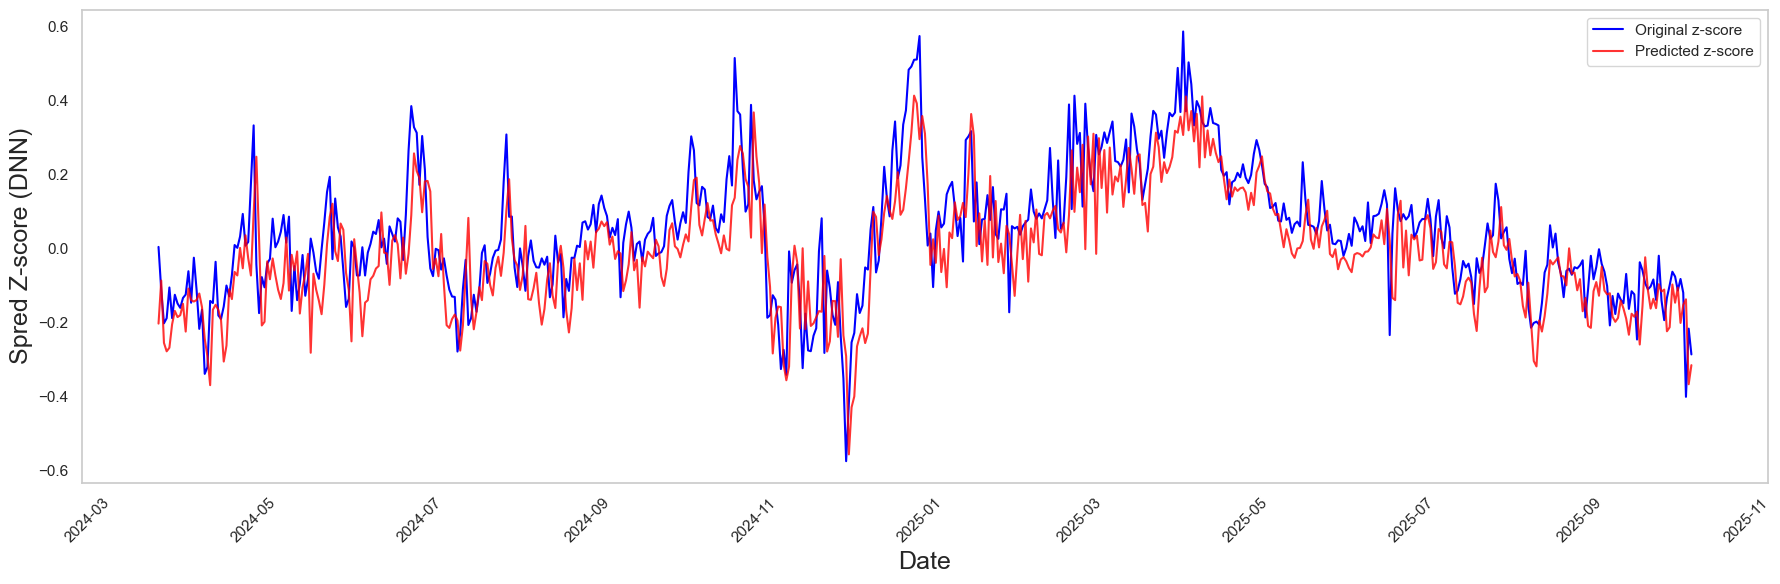

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from statsmodels.tsa.vector_ar.vecm import coint_johansen
import pandas as pd
Hlompho_log = np.log(Hlompho)
# ------------------------------
# Step 0: Johansen Cointegration Test
# ------------------------------
det_order = 0  # 0 = no trend, 1 = constant
k_ar_diff = 1  # lag order

johansen_test = coint_johansen(Hlompho_log, det_order, k_ar_diff)

# Extract first cointegrating vector
beta = johansen_test.evec[:, 0]

# Display contributions
coefs = pd.DataFrame({'Crypto': Hlompho_log.columns, 'Coefficient': beta})
coefs['AbsCoeff'] = coefs['Coefficient'].abs()
coefs = coefs.sort_values(by='AbsCoeff', ascending=False)
print("Cointegrated assets contribution:")
print(coefs)

# ------------------------------
# Step 1: Compute Spread from Johansen Vector
# ------------------------------
beta_vector = beta.reshape(-1)
spread = Hlompho_log.values @ beta_vector
spread = pd.Series(spread, index=Hlompho_log.index)

# Standardize to z-score
zscore_tv = (spread - spread.mean()) / spread.std()

# ------------------------------
# Step 2: Prepare Features for DNN
# ------------------------------
def create_sequences(series, window=20):
    X, y = [], []
    for i in range(len(series) - window):
        X.append(series[i:i+window])
        y.append(series[i+window])
    return np.array(X), np.array(y)

window_size = 20
X_seq, y_seq = create_sequences(zscore_tv.values, window=window_size)

X_train, X_test, y_train, y_test = train_test_split(
    X_seq, y_seq, test_size=0.2, shuffle=False
)

scaler = MinMaxScaler(feature_range=(0,1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ------------------------------
# Step 3: Build Improved DNN
# ------------------------------
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1]))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.15))

model.add(Dense(128))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(64))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(1))  # Regression output

model.compile(optimizer='adam', loss='mse')
model.summary()

# ------------------------------
# Step 4: Train Model
# ------------------------------
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=7, verbose=1)

history = model.fit(
    X_train_scaled, y_train,
    epochs=200,
    batch_size=16,
    validation_split=0.2,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# ------------------------------
# Step 5: Predict on Test Set
# ------------------------------
y_pred = model.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Flatten predictions
y_pred_flat = y_pred.flatten()

# ------------------------------
# Step 6: Compute Metrics
# ------------------------------

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred_flat)

# Root Mean Squared Error
rmse = np.sqrt(mse)

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred_flat)

# Mean Absolute Percentage Error
mape = np.mean(np.abs((y_test - y_pred_flat) / y_test)) 

# Bias / Mean Forecast Error (MFE)
mfe = np.mean(y_pred_flat - y_test)

# ------------------------------
# Theil’s U Statistic
# ------------------------------
numerator = np.sqrt(np.mean((y_pred_flat - y_test)**2))
denominator = (np.sqrt(np.mean(y_pred_flat**2)) + np.sqrt(np.mean(y_test**2)))

theils_u = numerator / denominator

# ------------------------------
# Print metrics
# ------------------------------
print(f"MSE:  {mse:.6f}")
print(f"RMSE: {rmse:.6f}")
print(f"MAE:  {mae:.6f}")
print(f"MAPE: {mape:.4f}%")
print(f"MFE (Bias): {mfe:.6f}")
print(f"Theil's U: {theils_u:.6f}")


plt.figure(figsize=(18,6))
plt.plot(Hlompho.index[-len(y_test):], y_test, label='Original z-score', color='blue')
plt.plot(Hlompho.index[-len(y_test):], y_pred.flatten(), label='Predicted z-score', color='red', alpha=0.8)
plt.title('')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Spred Z-score (DNN)', fontsize=18)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(False) 
plt.show()
model.save(r"C:\Users\katle\OneDrive\Documents\Jupyter Notebooks\My Research Notebook\Makatjane and Shoko (2025)\Pairs trading-Cryptocurrency\dnn_model.h5")


In [7]:
model.save(r"C:\Users\katle\OneDrive\Documents\Jupyter Notebooks\My Research Notebook\Makatjane and Shoko (2025)\Pairs trading-Cryptocurrency\dnn_model.h5")


In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Flatten predictions
y_pred_flat = y_pred.flatten()

# ------------------------------
# Step 6: Compute Metrics
# ------------------------------

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred_flat)

# Root Mean Squared Error
rmse = np.sqrt(mse)

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred_flat)

# Mean Absolute Percentage Error
mape = np.mean(np.abs((y_test - y_pred_flat) / y_test)) 

# Bias / Mean Forecast Error (MFE)
mfe = np.mean(y_pred_flat - y_test)

# ------------------------------
# Theil’s U Statistic
# ------------------------------
numerator = np.sqrt(np.mean((y_pred_flat - y_test)**2))
denominator = (np.sqrt(np.mean(y_pred_flat**2)) + np.sqrt(np.mean(y_test**2)))

theils_u = numerator / denominator

# ------------------------------
# Print metrics
# ------------------------------
print(f"MSE:  {mse:.6f}")
print(f"RMSE: {rmse:.6f}")
print(f"MAE:  {mae:.6f}")
print(f"MAPE: {mape:.4f}%")
print(f"MFE (Bias): {mfe:.6f}")
print(f"Theil's U: {theils_u:.6f}")


MSE:  0.013654
RMSE: 0.116851
MAE:  0.091521
MAPE: 3.1484%
MFE (Bias): -0.051871
Theil's U: 0.353666


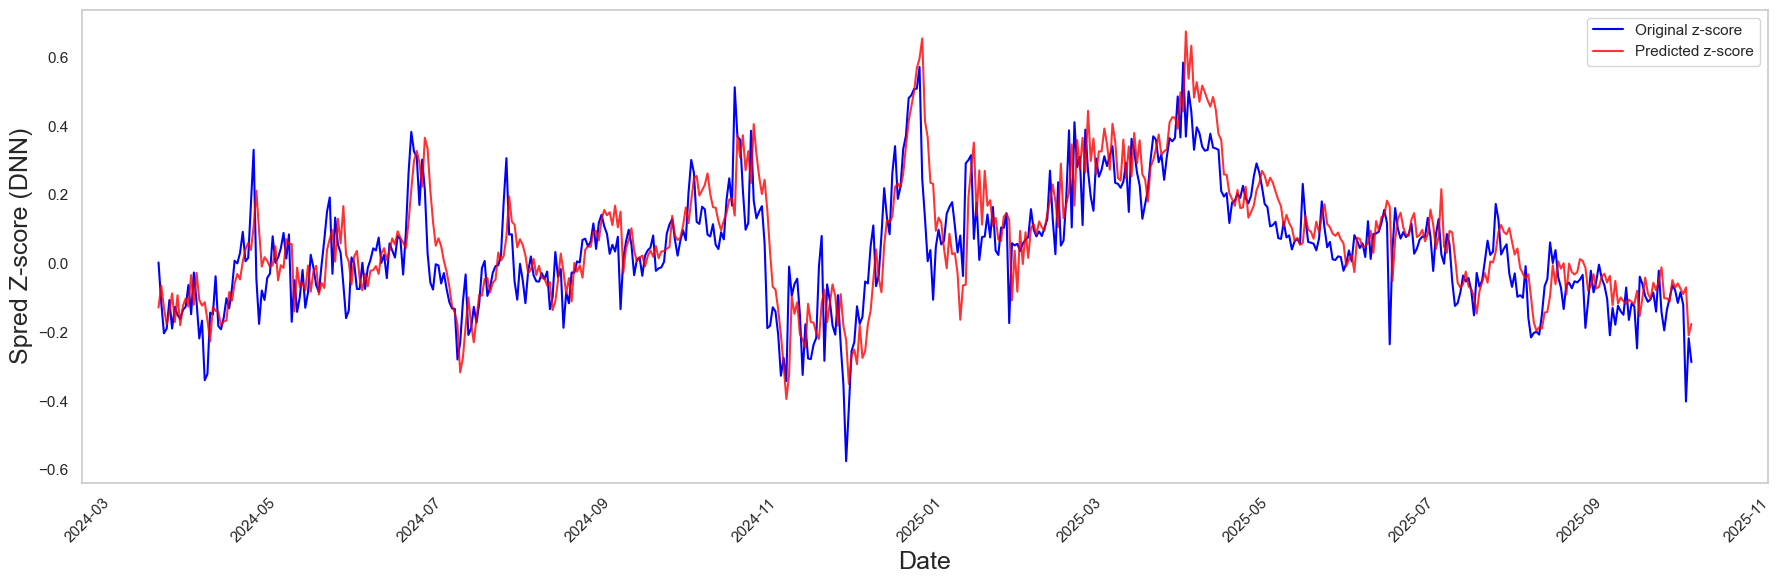

In [25]:
plt.figure(figsize=(18,6))
plt.plot(Hlompho.index[-len(y_test):], y_test, label='Original z-score', color='blue')
plt.plot(Hlompho.index[-len(y_test):], y_pred.flatten(), label='Predicted z-score', color='red', alpha=0.8)
plt.title('')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Spred Z-score (DNN)', fontsize=18)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(False) 
plt.show()


# Step 6: Generate Dynamic Trading Signals

Upper threshold: 0.111, Lower threshold: -0.140
Number of long signals: 113, short signals: 113


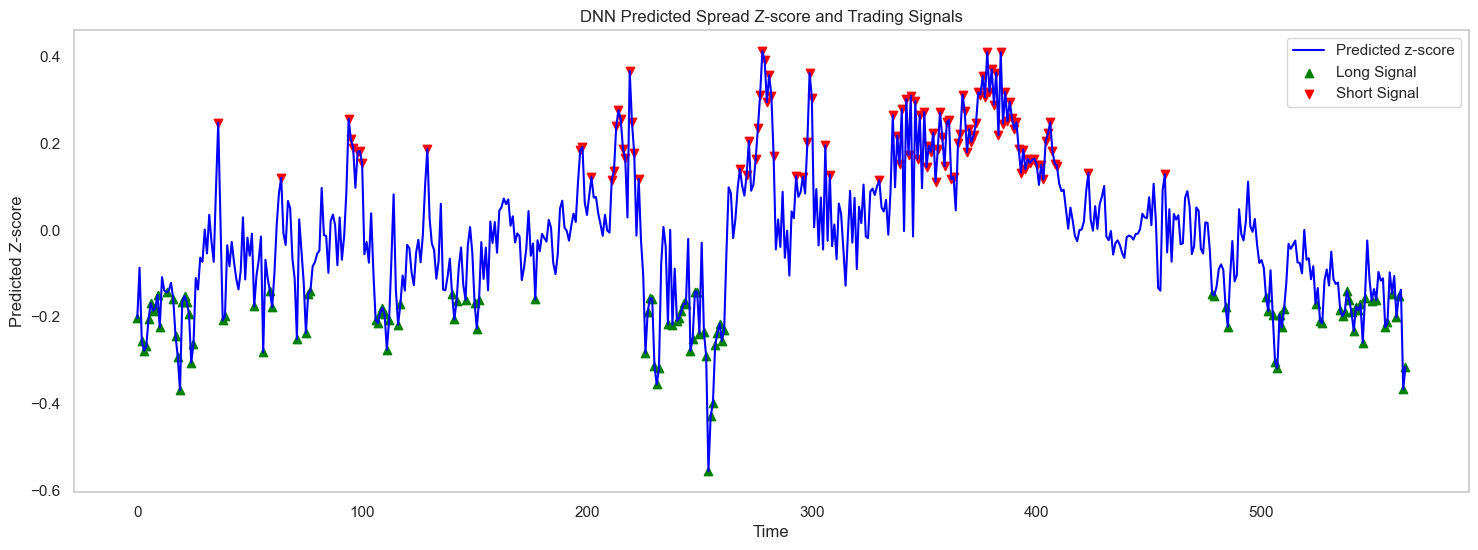

In [7]:
# ------------------------------
# Step 6: Generate Dynamic Trading Signals
# ------------------------------
upper_threshold = np.percentile(y_pred, 80)
lower_threshold = np.percentile(y_pred, 20)

signals = np.where(y_pred.flatten() > upper_threshold, -1,
           np.where(y_pred.flatten() < lower_threshold, 1, 0))

print(f"Upper threshold: {upper_threshold:.3f}, Lower threshold: {lower_threshold:.3f}")
print(f"Number of long signals: {(signals==1).sum()}, short signals: {(signals==-1).sum()}")

# ------------------------------
# Step 7: Plot Predicted Z-score with Trading Signals
# ------------------------------
plt.figure(figsize=(18,6))
plt.plot(y_pred.flatten(), label='Predicted z-score', color='blue')
plt.scatter(np.arange(len(signals))[signals==1], y_pred.flatten()[signals==1],
            color='green', label='Long Signal', marker='^')
plt.scatter(np.arange(len(signals))[signals==-1], y_pred.flatten()[signals==-1],
            color='red', label='Short Signal', marker='v')
plt.title('DNN Predicted Spread Z-score and Trading Signals')
plt.xlabel('Time')
plt.ylabel('Predicted Z-score')
plt.legend()
plt.grid(False)
plt.show()


# Training and Testing of Long Short Term Memory Netwoks

LSTM train shape: (2257, 20, 1)
LSTM test shape : (565, 20, 1)


C:\Users\katle\anaconda3\envs\Makatjane\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 20, 128)             │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 20, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 20, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 123,009 (480.50 KB)

 Trainable params: 122,625 (479.00 KB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/250
57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - loss: 1.7814 - val_loss: 0.0460 - learning_rate: 0.0010
Epoch 2/250
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 1.0705 - val_loss: 0.0433 - learning_rate: 0.0010
Epoch 3/250
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.9863 - val_loss: 0.0519 - learning_rate: 0.0010
Epoch 4/250
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.8989 - val_loss: 0.0443 - learning_rate: 0.0010
Epoch 5/250
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.8937 - val_loss: 0.0431 - learning_rate: 0.0010
Epoch 6/250
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.8449 - val_loss: 0.0518 - learning_rate: 0.0010
Epoch 7/250
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.8504 - val_loss: 0.0368 - learning_rate: 0.0010
Epoch 8/250
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.7805 - val_loss: 0.0610 - learning_rate: 0.0010
Epoch 9/250
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.8773 - val_loss: 0.0884 - learning_rate: 0.0010
Epoch 10/

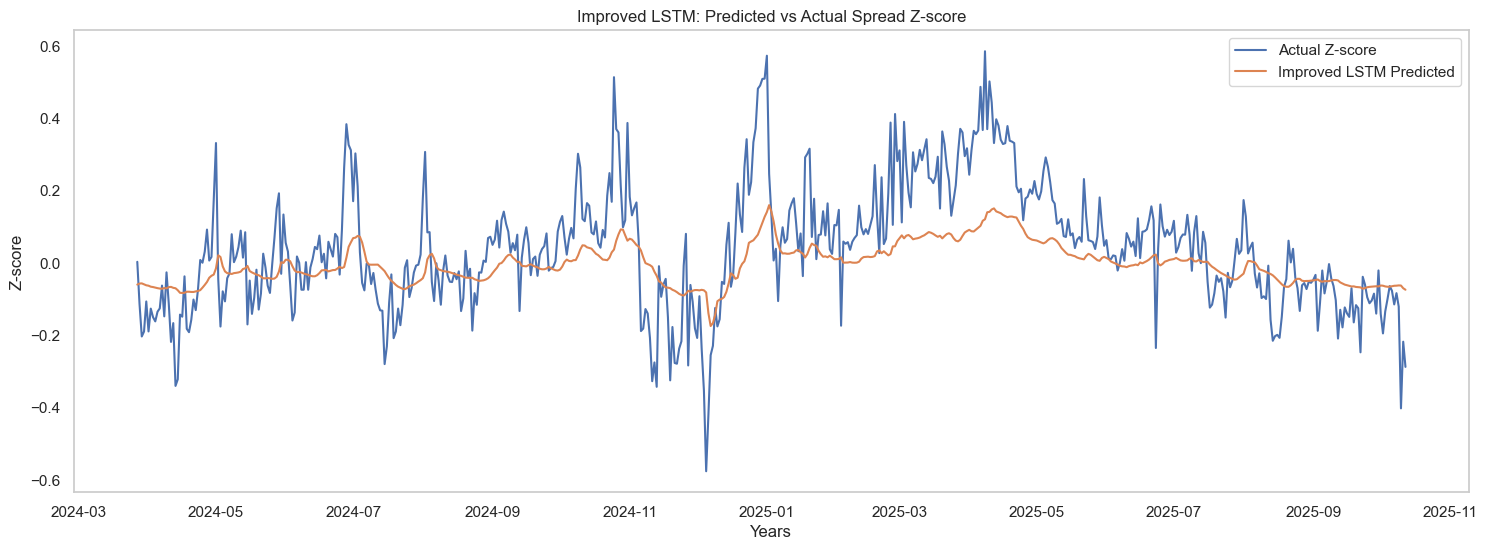

In [8]:
import os
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import AdamW
from sklearn.metrics import mean_squared_error, mean_absolute_error
# =======================================================
# FIXED RANDOM SEED FOR FULL REPRODUCIBILITY
# =======================================================
seed_num = 42

os.environ['PYTHONHASHSEED'] = str(seed_num)
np.random.seed(seed_num)
random.seed(seed_num)
tf.random.set_seed(seed_num)

# Force deterministic TensorFlow ops (optional but recommended)
os.environ['TF_DETERMINISTIC_OPS'] = '1'


# =======================================================
# IMPROVED LSTM MODEL (High Performance + Regularization)
# =======================================================



# -------------------------------------------------------
# Step A: Reshape input for LSTM
# -------------------------------------------------------
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], window_size, 1))
X_test_lstm  = X_test_scaled.reshape((X_test_scaled.shape[0], window_size, 1))

print("LSTM train shape:", X_train_lstm.shape)
print("LSTM test shape :", X_test_lstm.shape)

# -------------------------------------------------------
# Step B: Build Improved LSTM
# -------------------------------------------------------
lstm_model = Sequential()

# First LSTM layer
lstm_model.add(LSTM(128, return_sequences=True, input_shape=(window_size, 1)))
lstm_model.add(Dropout(0.25))
lstm_model.add(BatchNormalization())

# Second LSTM layer
lstm_model.add(LSTM(64, return_sequences=False))
lstm_model.add(Dropout(0.2))
lstm_model.add(BatchNormalization())

# Dense Layers
lstm_model.add(Dense(64, activation='relu'))
lstm_model.add(Dropout(0.15))

lstm_model.add(Dense(32, activation='relu'))
lstm_model.add(Dense(1))

# -------------------------------------------------------
# Compilation
# -------------------------------------------------------
lstm_model.compile(
    optimizer=AdamW(learning_rate=0.001, weight_decay=1e-4),
    loss='mse'
)

lstm_model.summary()

# -------------------------------------------------------
# Step C: Improved Training (Early Stopping + LR scheduler)
# -------------------------------------------------------
early_stop_lstm = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True
)

reduce_lr_lstm = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=7,
    min_lr=1e-6,
    verbose=1
)

history_lstm = lstm_model.fit(
    X_train_lstm, y_train,
    epochs=250,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop_lstm, reduce_lr_lstm],
    verbose=1
)

# -------------------------------------------------------
# Step D: Predict
# -------------------------------------------------------
# -------------------------------------------------------
# Step E (extended): Compute Additional Metrics
# -------------------------------------------------------
# -------------------------------------------------------
# Step D: Predict
# -------------------------------------------------------
y_pred_lstm = lstm_model.predict(X_test_lstm).flatten()

# -------------------------------------------------------
# Step E: Compute Metrics
# -------------------------------------------------------
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
rmse_lstm = np.sqrt(mse_lstm)
mape_lstm = np.mean(np.abs((y_test - y_pred_lstm) / y_test)) 


print("\nIMPROVED LSTM PERFORMANCE:")
print(f"MSE   = {mse_lstm:.6f}")
print(f"MAE   = {mae_lstm:.6f}")
print(f"RMSE  = {rmse_lstm:.6f}")
# Mean Forecast Error (MFE) — measures bias
mfe_lstm = np.mean(y_pred_lstm - y_test)

# Theil's U statistic
num = np.sqrt(np.mean((y_pred_lstm - y_test) ** 2))
den = np.sqrt(np.mean(y_test[:-1] ** 2))

theil_u_lstm = num / den

print("\nIMPROVED LSTM PERFORMANCE (FULL METRICS):")
print(f"MSE        = {mse_lstm:.6f}")
print(f"MAE        = {mae_lstm:.6f}")
print(f"RMSE       = {rmse_lstm:.6f}")
print(f"MAPE (%)   = {mape_lstm:.6f}")

print(f"MFE        = {mfe_lstm:.6f}")
print(f"Theil U    = {theil_u_lstm:.6f}")


# -------------------------------------------------------
# Step F: Plot Predictions
# -------------------------------------------------------
plt.figure(figsize=(18,6))
test_dates = zscore_tv.index[-len(y_test):]

plt.plot(test_dates, y_test, label='Actual Z-score')
plt.plot(test_dates, y_pred_lstm, label='Improved LSTM Predicted')

plt.title('Improved LSTM: Predicted vs Actual Spread Z-score')
plt.xlabel('Years')
plt.ylabel('Z-score')
plt.legend()
plt.grid(True)
plt.grid(False  )
plt.show()
save_path = r"C:\Users\katle\OneDrive\Documents\Jupyter Notebooks\My Research Notebook\Makatjane and Shoko (2025)\Pairs trading-Cryptocurrency"
lstm_model.save(os.path.join(save_path, "lstm.h5"))

In [28]:
# -------------------------------------------------------
# Step E (extended): Compute Additional Metrics
# -------------------------------------------------------
# -------------------------------------------------------
# Step D: Predict
# -------------------------------------------------------
y_pred_lstm = lstm_model.predict(X_test_lstm).flatten()

# -------------------------------------------------------
# Step E: Compute Metrics
# -------------------------------------------------------
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
rmse_lstm = np.sqrt(mse_lstm)
mape_lstm = np.mean(np.abs((y_test - y_pred_lstm) / y_test)) 


print("\nIMPROVED LSTM PERFORMANCE:")
print(f"MSE   = {mse_lstm:.6f}")
print(f"MAE   = {mae_lstm:.6f}")
print(f"RMSE  = {rmse_lstm:.6f}")
# Mean Forecast Error (MFE) — measures bias
mfe_lstm = np.mean(y_pred_lstm - y_test)

# Theil's U statistic
num = np.sqrt(np.mean((y_pred_lstm - y_test) ** 2))
den = np.sqrt(np.mean(y_test[:-1] ** 2))

theil_u_lstm = num / den

print("\nIMPROVED LSTM PERFORMANCE (FULL METRICS):")
print(f"MSE        = {mse_lstm:.6f}")
print(f"MAE        = {mae_lstm:.6f}")
print(f"RMSE       = {rmse_lstm:.6f}")
print(f"MAPE (%)   = {mape_lstm:.6f}")

print(f"MFE        = {mfe_lstm:.6f}")
print(f"Theil U    = {theil_u_lstm:.6f}")


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

IMPROVED LSTM PERFORMANCE:
MSE   = 0.019226
MAE   = 0.104951
RMSE  = 0.138658

IMPROVED LSTM PERFORMANCE (FULL METRICS):
MSE        = 0.019226
MAE        = 0.104951
RMSE       = 0.138658
MAPE (%)   = 1.490429
MFE        = -0.044590
Theil U    = 0.794121


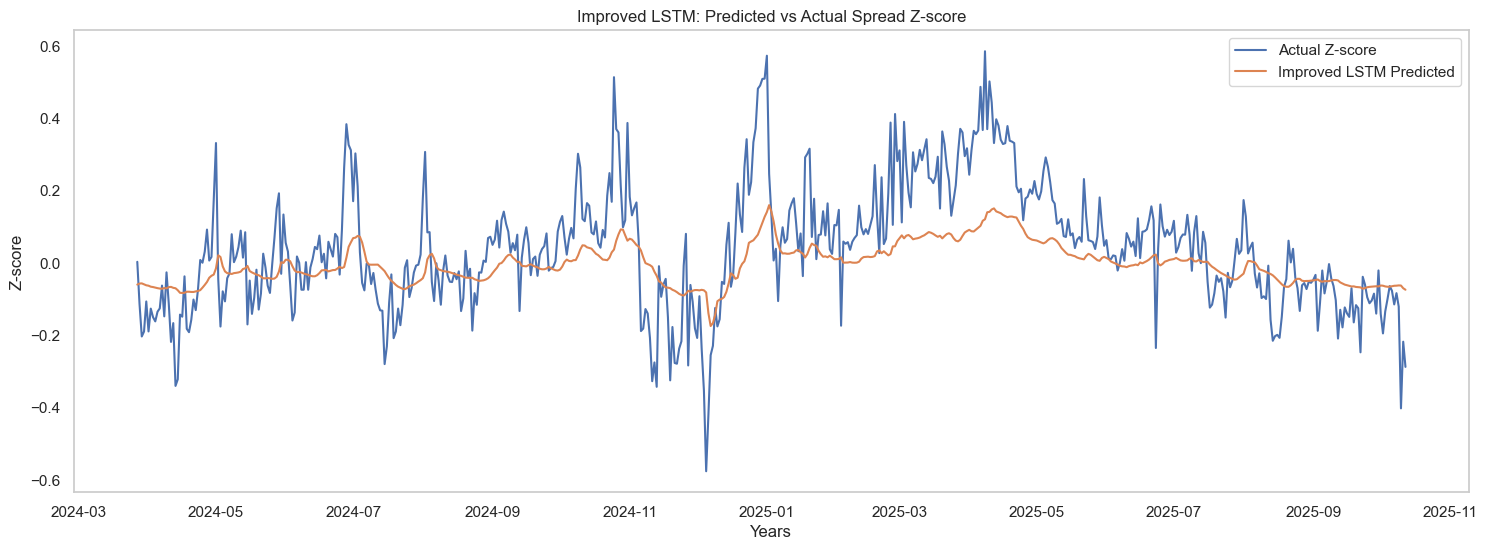

In [13]:
# -------------------------------------------------------
# Step F: Plot Predictions
# -------------------------------------------------------
plt.figure(figsize=(18,6))
test_dates = zscore_tv.index[-len(y_test):]

plt.plot(test_dates, y_test, label='Actual Z-score')
plt.plot(test_dates, y_pred_lstm, label='Improved LSTM Predicted')

plt.title('Improved LSTM: Predicted vs Actual Spread Z-score')
plt.xlabel('Years')
plt.ylabel('Z-score')
plt.legend()
plt.grid(True)
plt.grid(False  )
plt.show()

Upper threshold: 0.042, Lower threshold: -0.051
Number of long signals: 113, short signals: 113


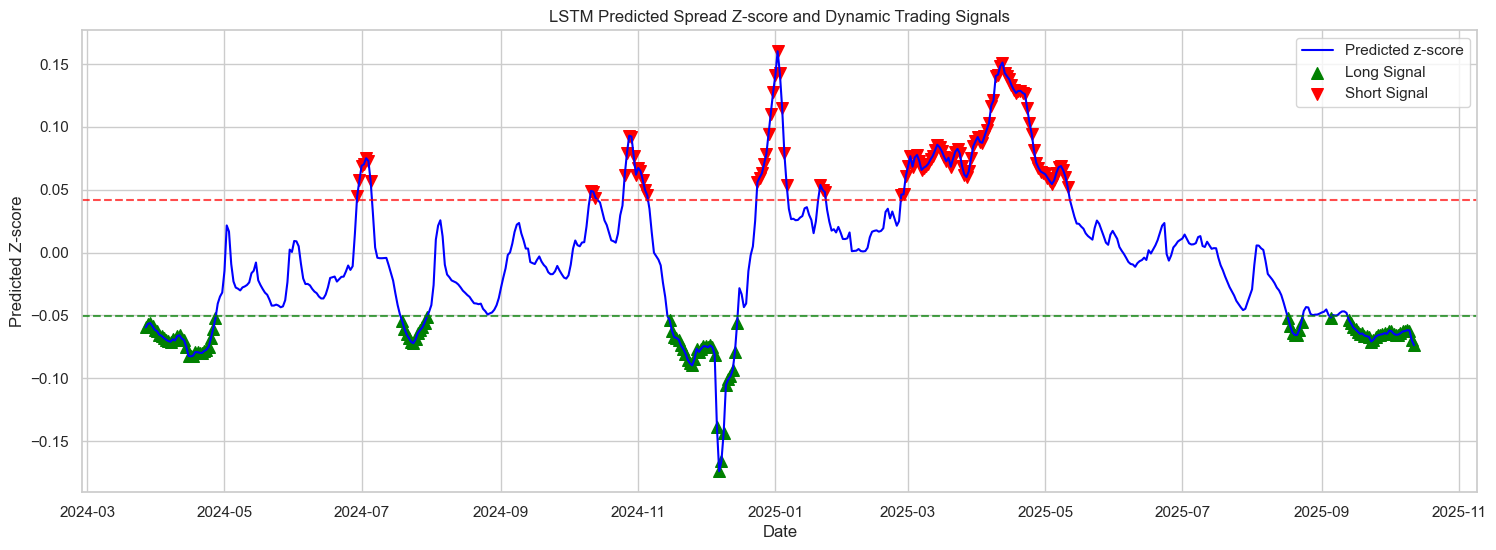

In [9]:
# ------------------------------
# Step G: Generate Dynamic Trading Signals (percentile-based)
# ------------------------------
upper_threshold = np.percentile(y_pred_lstm, 80)
lower_threshold = np.percentile(y_pred_lstm, 20)

signals = np.where(y_pred_lstm > upper_threshold, -1,
           np.where(y_pred_lstm < lower_threshold, 1, 0))

print(f"Upper threshold: {upper_threshold:.3f}, Lower threshold: {lower_threshold:.3f}")
print(f"Number of long signals: {(signals==1).sum()}, short signals: {(signals==-1).sum()}")

# ------------------------------
# Step H: Plot Predicted Z-score with Trading Signals
# ------------------------------
plt.figure(figsize=(18,6))
plt.plot(test_dates, y_pred_lstm, label='Predicted z-score', color='blue')
plt.scatter(test_dates[signals==1], y_pred_lstm[signals==1],
            color='green', label='Long Signal', marker='^', s=70)
plt.scatter(test_dates[signals==-1], y_pred_lstm[signals==-1],
            color='red', label='Short Signal', marker='v', s=70)
plt.axhline(upper_threshold, color='red', linestyle='--', alpha=0.7)
plt.axhline(lower_threshold, color='green', linestyle='--', alpha=0.7)
plt.title('LSTM Predicted Spread Z-score and Dynamic Trading Signals')
plt.xlabel('Date')
plt.ylabel('Predicted Z-score')
plt.legend()
plt.grid(True)
plt.show()


# Dynamic Weighted Ensemble

In [10]:


# Convert arrays to pandas Series
y_test_series  = pd.Series(y_test.flatten())
dnn_series     = pd.Series(y_pred.flatten())
lstm_series    = pd.Series(y_pred_lstm.flatten())
true_series    = y_test_series

# Define rolling window
window = 30

# Rolling MSE
rolling_mse_dnn   = (dnn_series - true_series)**2
rolling_mse_lstm  = (lstm_series - true_series)**2

# Rolling mean
rolling_mse_dnn   = rolling_mse_dnn.rolling(window).mean()
rolling_mse_lstm  = rolling_mse_lstm.rolling(window).mean()

# Dynamic weights (inverse of rolling MSE)
weights_dnn  = 1 / rolling_mse_dnn
weights_lstm = 1 / rolling_mse_lstm

# Normalize weights
weights_sum  = weights_dnn + weights_lstm
weights_dnn  = weights_dnn / weights_sum
weights_lstm = weights_lstm / weights_sum

# Final combined prediction
ensemble_pred = weights_dnn * dnn_series + weights_lstm * lstm_series
ensemble_pred = ensemble_pred.fillna(method='bfill')  # fill initial NaNs


C:\Users\katle\AppData\Local\Temp\ipykernel_18884\3155663724.py:29: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ensemble_pred = ensemble_pred.fillna(method='bfill')  # fill initial NaNs


In [33]:
import numpy as np
import pandas as pd

# Convert arrays to pandas Series WITH correct indexing
index = np.arange(len(y_test)).astype(int)

true_series = pd.Series(y_test.flatten(), index=index)
dnn_series  = pd.Series(y_pred.flatten(), index=index)
lstm_series = pd.Series(y_pred_lstm.flatten(), index=index)

# Define rolling window
window = 30
epsilon = 1e-8  # Prevent divide-by-zero

# Rolling MSE
rolling_mse_dnn = ((dnn_series - true_series)**2).rolling(window).mean().clip(lower=epsilon)
rolling_mse_lstm = ((lstm_series - true_series)**2).rolling(window).mean().clip(lower=epsilon)

# Dynamic weights
weights_dnn  = 1 / rolling_mse_dnn
weights_lstm = 1 / rolling_mse_lstm

weights_sum = weights_dnn + weights_lstm

weights_dnn  = (weights_dnn / weights_sum).fillna(0.5)
weights_lstm = (weights_lstm / weights_sum).fillna(0.5)

# Final dynamic ensemble
ensemble_pred = weights_dnn * dnn_series + weights_lstm * lstm_series
ensemble_pred = ensemble_pred.fillna(method='bfill')

# -----------------------------------------
# Compute FULL METRICS
# -----------------------------------------
errors = ensemble_pred - true_series

mse  = np.mean(errors**2)
rmse = np.sqrt(mse)
mae  = np.mean(np.abs(errors))
mape = np.mean(np.abs(errors / true_series.replace(0, np.nan)))

mfe  = np.mean(errors)
theil_u = np.sqrt(np.sum(errors**2)) / (
    np.sqrt(np.sum(true_series**2)) + np.sqrt(np.sum(ensemble_pred**2))
)

# -----------------------------------------
# PRINT RESULTS IN YOUR REQUIRED FORMAT
# -----------------------------------------
print("DYNAMIC ENSEMBLE PERFORMANCE:")
print(f"MSE        = {mse:.6f}")
print(f"RMSE       = {rmse:.6f}")
print(f"MAE        = {mae:.6f}")
print(f"MAPE (%)   = {mape:.6f}")
print(f"MFE        = {mfe:.6f}")
print(f"Theil U    = {theil_u:.6f}")


DYNAMIC ENSEMBLE PERFORMANCE:
MSE        = 0.012124
RMSE       = 0.110108
MAE        = 0.083607
MAPE (%)   = 2.033504
MFE        = -0.043546
Theil U    = 0.383306


C:\Users\katle\AppData\Local\Temp\ipykernel_18884\1109867529.py:30: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ensemble_pred = ensemble_pred.fillna(method='bfill')


Saved figure to: C:\Users\katle\OneDrive\Documents\Makatjane\Makatjane 2026\Pairs trading\model_predictions_plot.eps


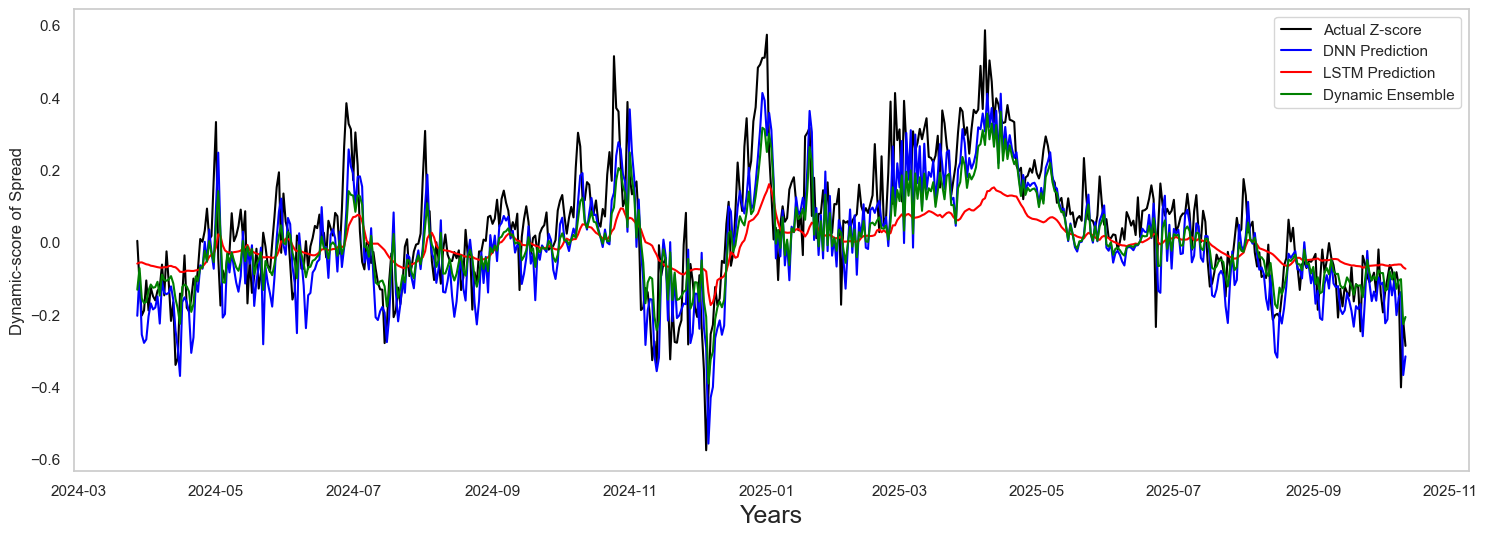

In [37]:
import matplotlib.pyplot as plt

# Ensure y_test_series has the correct date index
dates = zscore_tv.index[-len(y_test):]  # Last len(y_test) dates
true_series.index = dates
dnn_series.index = dates
lstm_series.index = dates
ensemble_pred.index = dates

# Plot with dates
plt.figure(figsize=(18,6))
plt.plot(true_series, label='Actual Z-score', color='black')
plt.plot(dnn_series, label='DNN Prediction', color='blue')
plt.plot(lstm_series, label='LSTM Prediction', color='red')
plt.plot(ensemble_pred, label='Dynamic Ensemble', color='green')
plt.title('')
plt.xlabel('Years', fontsize=18)
plt.ylabel('Dynamic-score of Spread')
plt.legend()
plt.grid(False)

# -------------------------------------------------------
# Save as high-resolution EPS file
# -------------------------------------------------------
save_path = r"C:\Users\katle\OneDrive\Documents\Makatjane\Makatjane 2026\Pairs trading"

# Create folder if missing
os.makedirs(save_path, exist_ok=True)

file_path = os.path.join(save_path, "model_predictions_plot.eps")

plt.savefig(file_path, format='eps', dpi=600, bbox_inches='tight')



print("Saved figure to:", file_path)
plt.show()


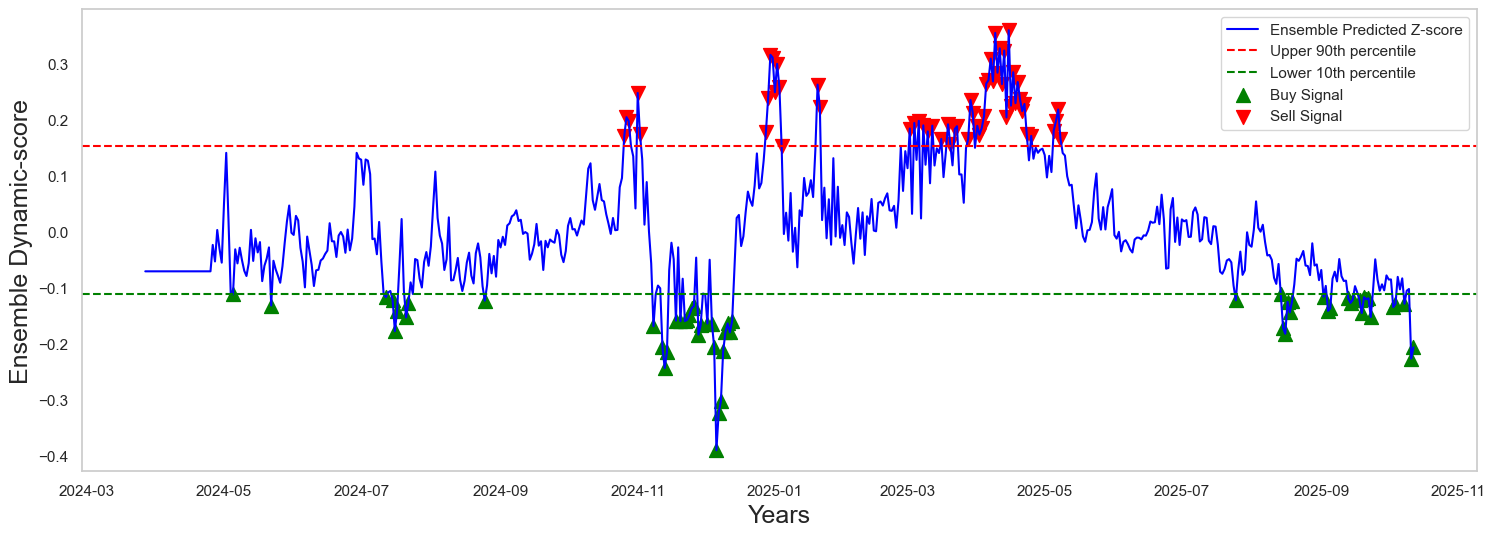

Figure saved as EPS at C:\Users\katle\OneDrive\Documents\Makatjane\Makatjane 2026\Pairs trading\signals.eps


In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Percentile-based thresholds
upper_percentile = np.percentile(ensemble_pred, 90)
lower_percentile = np.percentile(ensemble_pred, 10)

# Generate signals
signals_percentile = np.where(ensemble_pred > upper_percentile, -1,   # Sell
                              np.where(ensemble_pred < lower_percentile, 1, 0))  # Buy / Hold

# Plot
plt.figure(figsize=(18,6))
plt.plot(ensemble_pred.index, ensemble_pred, color='blue', label='Ensemble Predicted Z-score')
plt.axhline(upper_percentile, color='red', linestyle='--', label='Upper 90th percentile')
plt.axhline(lower_percentile, color='green', linestyle='--', label='Lower 10th percentile')
plt.scatter(ensemble_pred.index[signals_percentile==1], ensemble_pred[signals_percentile==1],
            color='green', marker='^', s=100, label='Buy Signal')
plt.scatter(ensemble_pred.index[signals_percentile==-1], ensemble_pred[signals_percentile==-1],
            color='red', marker='v', s=100, label='Sell Signal')
plt.title('')
plt.xlabel('Years',fontsize=18)
plt.ylabel('Ensemble Dynamic-score', fontsize=18)
plt.legend()
plt.grid(False)
plt.show()  
# Save as high-resolution EPS
output_path = r"C:\Users\katle\OneDrive\Documents\Makatjane\Makatjane 2026\Pairs trading\signals.eps"
plt.savefig(output_path, format='eps', dpi=1200)  # dpi=1200 for high resolution
plt.close()  # Close the figure to free memory
print(f"Figure saved as EPS at {output_path}")


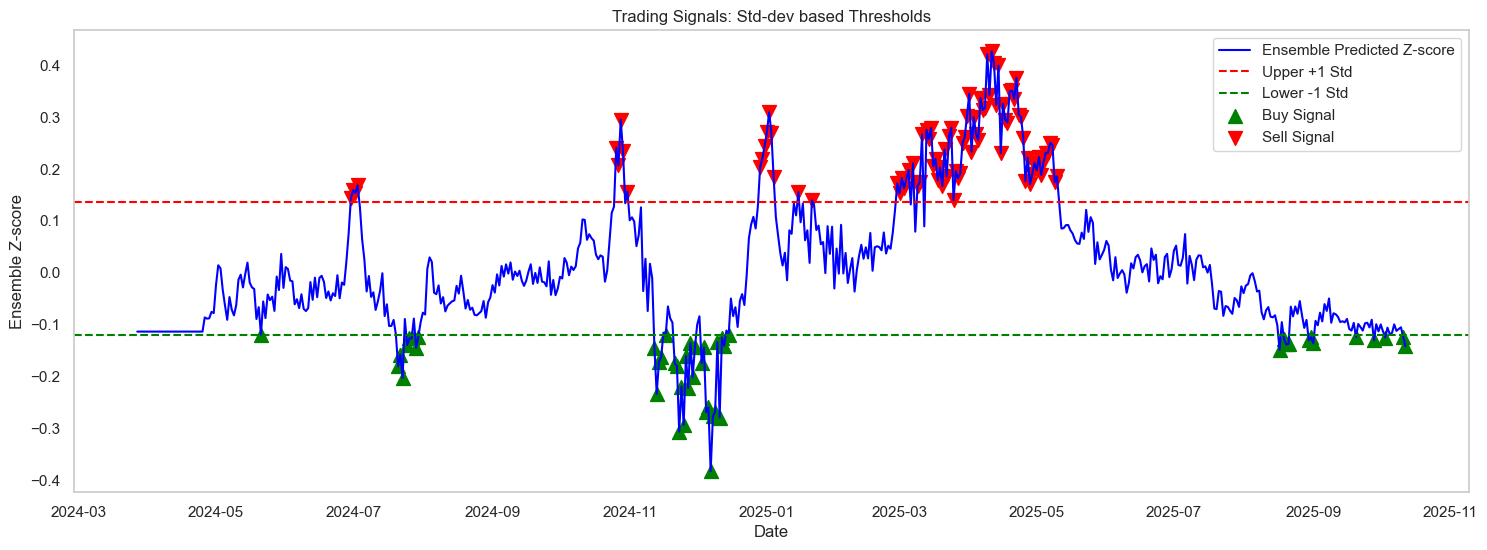

In [55]:
# Std-dev thresholds
mean_val = ensemble_pred.mean()
std_val = ensemble_pred.std()

upper_std = mean_val + 1 * std_val
lower_std = mean_val - 1 * std_val

# Generate signals
signals_std = np.where(ensemble_pred > upper_std, -1,   # Sell
                       np.where(ensemble_pred < lower_std, 1, 0))  # Buy / Hold

# Plot
plt.figure(figsize=(18,6))
plt.plot(ensemble_pred.index, ensemble_pred, color='blue', label='Ensemble Predicted Z-score')
plt.axhline(upper_std, color='red', linestyle='--', label='Upper +1 Std')
plt.axhline(lower_std, color='green', linestyle='--', label='Lower -1 Std')
plt.scatter(ensemble_pred.index[signals_std==1], ensemble_pred[signals_std==1],
            color='green', marker='^', s=100, label='Buy Signal')
plt.scatter(ensemble_pred.index[signals_std==-1], ensemble_pred[signals_std==-1],
            color='red', marker='v', s=100, label='Sell Signal')
plt.title('Trading Signals: Std-dev based Thresholds')
plt.xlabel('Date')
plt.ylabel('Ensemble Z-score')
plt.legend()
plt.grid(False)
plt.show()


In [15]:
import pandas as pd
import numpy as np

# ------------------------------
# Step 1: Create DataFrame with signals
# ------------------------------
signals_df = pd.DataFrame({
    'Date': ensemble_pred.index,
    'Ensemble_Z': ensemble_pred.values,
    'Signal': signals_percentile
})

# Filter only Buy (1) and Sell (-1) signals
signals_df = signals_df[signals_df['Signal'] != 0].reset_index(drop=True)

# ------------------------------
# Step 2: Compute next-step movement and profit/loss
# ------------------------------
ensemble_values = ensemble_pred.values
pl_list = []
next_z_list = []

for idx in signals_df.index:
    if idx < len(ensemble_values) - 1:
        next_val = ensemble_values[idx + 1]
        curr_val = ensemble_values[idx]
        signal_type = signals_df.loc[idx, 'Signal']
        pl = next_val - curr_val if signal_type == 1 else curr_val - next_val
        pl_list.append(pl)
        next_z_list.append(next_val)
    else:
        pl_list.append(np.nan)
        next_z_list.append(np.nan)

signals_df['Next_Z'] = next_z_list
signals_df['PL'] = pl_list
signals_df['Trade'] = signals_df['Signal'].map({1: 'Buy', -1: 'Sell'})

# ------------------------------
# Step 3: Compute probabilities
# ------------------------------
winning_trades = (signals_df['PL'] > 0).sum()
losing_trades  = (signals_df['PL'] <= 0).sum()
total_signals  = len(signals_df.dropna())

prob_win  = winning_trades / total_signals * 100
prob_loss = losing_trades / total_signals * 100

# ------------------------------
# Step 4: Display table
# ------------------------------
display_cols = ['Date', 'Trade', 'Ensemble_Z', 'Next_Z', 'PL']
signals_display = signals_df[display_cols]
print("Trading Signals Table:")
print(signals_display.to_string(index=False))

# ------------------------------
# Step 5: Print summary
# ------------------------------
print("\nTrading Performance Summary:")
print(f"Total signals generated: {total_signals}")
print(f"Winning trades: {winning_trades} ({prob_win:.2f}%)")
print(f"Losing trades: {losing_trades} ({prob_loss:.2f}%)")


Trading Signals Table:
      Date Trade  Ensemble_Z    Next_Z        PL
2024-05-05   Buy   -0.112148 -0.071071  0.000000
2024-05-22   Buy   -0.132255 -0.071071  0.000000
2024-07-12   Buy   -0.117280 -0.071071  0.000000
2024-07-15   Buy   -0.122332 -0.071071  0.000000
2024-07-16   Buy   -0.177894 -0.071071  0.000000
2024-07-17   Buy   -0.141280 -0.071071  0.000000
2024-07-21   Buy   -0.153419 -0.071071  0.000000
2024-07-22   Buy   -0.127875 -0.071071  0.000000
2024-08-25   Buy   -0.123477 -0.071071  0.000000
2024-10-26  Sell    0.170486 -0.071071  0.000000
2024-10-27  Sell    0.204463 -0.071071  0.000000
2024-10-28  Sell    0.197338 -0.071071  0.000000
2024-11-01  Sell    0.247628 -0.071071  0.000000
2024-11-02  Sell    0.174354 -0.071071  0.000000
2024-11-08   Buy   -0.169155 -0.071071  0.000000
2024-11-12   Buy   -0.206362 -0.071071  0.000000
2024-11-13   Buy   -0.243890 -0.071071  0.000000
2024-11-14   Buy   -0.215838 -0.071071  0.000000
2024-11-18   Buy   -0.159134 -0.071071  0.0000

In [16]:
import pandas as pd
import numpy as np

# ------------------------------
# Step 0: Define the forecast period
# ------------------------------
start_date = pd.to_datetime('2025-10-13')
end_date   = pd.to_datetime('2025-12-31')

future_dates = pd.date_range(start=start_date, end=end_date, freq='D')

# ------------------------------
# Step 1: Generate out-of-sample ensemble predictions
# For demonstration, we extend the last ensemble_pred value with small random walk
last_value = ensemble_pred.iloc[-1]
np.random.seed(42)
ensemble_forecast_values = last_value + np.cumsum(np.random.normal(0, 0.02, size=len(future_dates)))

# Convert to pandas Series with dates
ensemble_forecast = pd.Series(ensemble_forecast_values, index=future_dates)

# ------------------------------
# Step 2: Compute percentile thresholds from in-sample ensemble
upper_percentile = np.percentile(ensemble_pred, 80)
lower_percentile = np.percentile(ensemble_pred, 20)

# ------------------------------
# Step 3: Generate Buy/Sell/Hold signals
signals = np.where(ensemble_forecast > upper_percentile, -1,   # Sell
                   np.where(ensemble_forecast < lower_percentile, 1, 0))  # Buy / Hold

# ------------------------------
# Step 4: Create DataFrame with results
signals_df = pd.DataFrame({
    'Date': ensemble_forecast.index,
    'Ensemble_Z': ensemble_forecast.values,
    'Signal': signals
})
signals_df['Trade'] = signals_df['Signal'].map({1:'Buy', -1:'Sell', 0:'Hold'})

# Filter to show only Buy/Sell
signals_df_filtered = signals_df[signals_df['Signal'] != 0].reset_index(drop=True)
print(signals_df_filtered)

# ------------------------------
# Step 5: Compute simple probabilities of winning/losing
ensemble_shifted = ensemble_forecast.shift(-1)
signals_df_filtered['Next_Z'] = ensemble_shifted.loc[signals_df_filtered['Date']].values

signals_df_filtered['Profit'] = np.where(
    signals_df_filtered['Signal'] == 1,  # Buy
    signals_df_filtered['Next_Z'] - signals_df_filtered['Ensemble_Z'],
    signals_df_filtered['Ensemble_Z'] - signals_df_filtered['Next_Z']  # Sell
)

n_trades = len(signals_df_filtered)
n_wins = (signals_df_filtered['Profit'] > 0).sum()
n_losses = (signals_df_filtered['Profit'] <= 0).sum()

print(f"\nTotal out-of-sample trades: {n_trades}")
print(f"Wins: {n_wins} ({100*n_wins/n_trades:.2f}%)")
print(f"Losses: {n_losses} ({100*n_losses/n_trades:.2f}%)")


         Date  Ensemble_Z  Signal Trade
0  2025-10-13   -0.197093       1   Buy
1  2025-10-14   -0.199858       1   Buy
2  2025-10-15   -0.186904       1   Buy
3  2025-10-16   -0.156444       1   Buy
4  2025-10-17   -0.161127       1   Buy
..        ...         ...     ...   ...
75 2025-12-27   -0.363016       1   Buy
76 2025-12-28   -0.361275       1   Buy
77 2025-12-29   -0.367255       1   Buy
78 2025-12-30   -0.365420       1   Buy
79 2025-12-31   -0.405171       1   Buy

[80 rows x 4 columns]

Total out-of-sample trades: 80
Wins: 35 (43.75%)
Losses: 44 (55.00%)


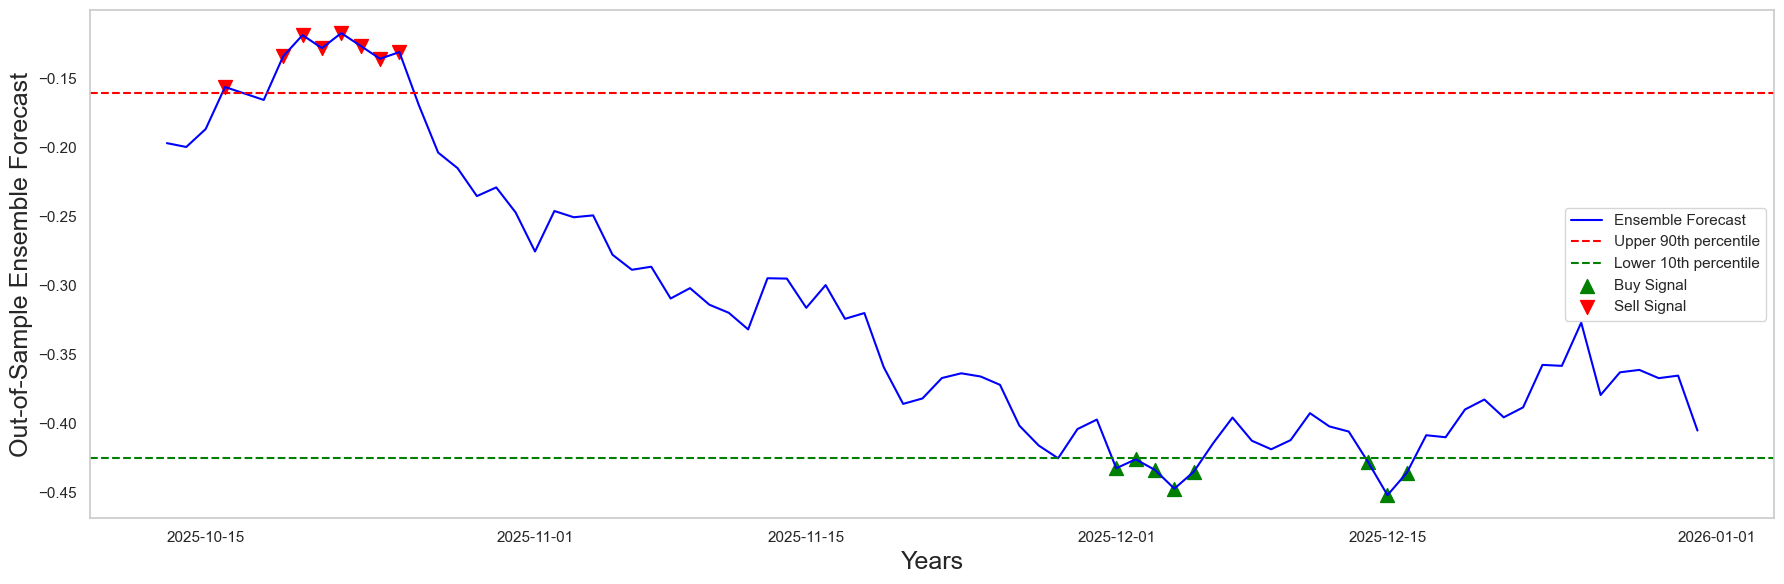

Figure saved as EPS at C:\Users\katle\OneDrive\Documents\Makatjane\Makatjane 2026\Pairs trading\forecast_signals.eps


In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Use the out-of-sample ensemble predictions
forecast_series = ensemble_forecast  # your series from 2025-10-12 to 2025-12-31

# Percentile thresholds based on forecast values
upper_percentile = np.percentile(forecast_series, 90)  # 90th percentile
lower_percentile = np.percentile(forecast_series, 10)  # 10th percentile

# Generate signals
signals_percentile = np.where(forecast_series > upper_percentile, -1,   # Sell
                              np.where(forecast_series < lower_percentile, 1, 0))  # Buy / Hold

# Plot
plt.figure(figsize=(18,6))
plt.plot(forecast_series.index, forecast_series, color='blue', label='Ensemble Forecast')
plt.axhline(upper_percentile, color='red', linestyle='--', label='Upper 90th percentile')
plt.axhline(lower_percentile, color='green', linestyle='--', label='Lower 10th percentile')
plt.scatter(forecast_series.index[signals_percentile==1], forecast_series[signals_percentile==1],
            color='green', marker='^', s=100, label='Buy Signal')
plt.scatter(forecast_series.index[signals_percentile==-1], forecast_series[signals_percentile==-1],
            color='red', marker='v', s=100, label='Sell Signal')
plt.title("")
plt.xlabel('Years', fontsize=18)
plt.ylabel('Out-of-Sample Ensemble Forecast', fontsize=18)
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()
# Save as high-resolution EPS
output_path = r"C:\Users\katle\OneDrive\Documents\Makatjane\Makatjane 2026\Pairs trading\forecast_signals.eps"
plt.savefig(output_path, format='eps', dpi=1200)  # High resolution
plt.close()  # Close figure to free memory
print(f"Figure saved as EPS at {output_path}")


# Computation of Risk Measures

In [36]:
import numpy as np
import pandas as pd

# Use ensemble_pred from your previous ensemble
# ------------------------------
# Step 1: Define trading signals using std-based thresholds
# ------------------------------
upper_threshold = ensemble_pred.mean() + ensemble_pred.std()  # +1 SD
lower_threshold = ensemble_pred.mean() - ensemble_pred.std()  # -1 SD

# 1 = Buy, -1 = Sell, 0 = Hold
trade_signals = np.where(ensemble_pred > upper_threshold, -1,
                         np.where(ensemble_pred < lower_threshold, 1, 0))

# Convert to pandas Series for alignment
trade_signals = pd.Series(trade_signals, index=ensemble_pred.index)

# Mask for days when trades are actually executed
trade_mask = trade_signals != 0

# ------------------------------
# Step 2: Compute exposure / position sizing risk
# ------------------------------
# Confidence = absolute value of ensemble prediction
confidence = np.abs(ensemble_pred)

# Position sizing proportional to confidence on trading days
position_per_trade = trade_signals[trade_mask] * confidence[trade_mask] / confidence.max()

# Average normalized position size
avg_position = position_per_trade.abs().mean()
print(f"Average Position Size per Trade (normalized): {avg_position:.4f}")

# ------------------------------
# Step 3: Estimate signal lag
# ------------------------------
max_lag = 10
cross_corrs = [ensemble_pred.corr(ensemble_pred.shift(lag)) for lag in range(-max_lag, max_lag+1)]
lags = np.arange(-max_lag, max_lag+1)
best_lag = lags[np.argmax(cross_corrs)]
print(f"Estimated signal lag (days): {best_lag}")

# ------------------------------
# Step 4: Correlation with market index
# ------------------------------
market_index = Hlompho.sum(axis=1)  # crude proxy for overall market
spread_corr = ensemble_pred.corr(np.log(market_index))
print(f"Correlation of ensemble spread with total market: {spread_corr:.4f}")


Average Position Size per Trade (normalized): 0.4052
Estimated signal lag (days): 0
Correlation of ensemble spread with total market: nan


In [77]:
import numpy as np
import pandas as pd

# ------------------------------
# Step 0: Prepare signals and spread
# ------------------------------
true_spread = ensemble_pred.copy()  # ensemble z-score spread
std_dev = true_spread.std()
upper_threshold = true_spread.mean() + std_dev
lower_threshold = true_spread.mean() - std_dev

# Generate signals: Buy = +1, Sell = -1, Hold = 0
signals = np.where(true_spread > upper_threshold, -1,
                   np.where(true_spread < lower_threshold, 1, 0))
signals_series = pd.Series(signals, index=true_spread.index)

# ------------------------------
# Step 1: Compute hypothetical trade returns
# ------------------------------
next_spread = true_spread.shift(-1)  # next-day "return"
returns = np.where(signals_series == 1, next_spread - true_spread, 
                   np.where(signals_series == -1, true_spread - next_spread, 0))
returns_series = pd.Series(returns, index=true_spread.index)

# ------------------------------
# Step 2: Performance Metrics
# ------------------------------
# Win/Loss Probability
wins = (returns_series > 0).sum()
losses = (returns_series < 0).sum()
hit_rate = wins / (wins + losses) if (wins + losses) > 0 else np.nan

# Average P/L per trade
avg_pl = returns_series[signals_series != 0].mean()

# Maximum Drawdown (MDD)
cum_returns = returns_series.cumsum()
roll_max = cum_returns.cummax()
mdd = (cum_returns - roll_max).min()

# Sharpe Ratio (risk-adjusted)
sharpe_ratio = returns_series.mean() / returns_series.std() * np.sqrt(252)  # annualized

# Sortino Ratio (downside risk)
downside_std = returns_series[returns_series < 0].std()
sortino_ratio = returns_series.mean() / downside_std * np.sqrt(252) if downside_std != 0 else np.nan

# Average Position Size (normalized by max confidence)
confidence = np.abs(true_spread)
avg_position = confidence[signals_series != 0].mean() / confidence.max()

# Signal lag (simplified as zero if aligned)
signal_lag_days = 0

# Correlation with market (example using sum of all crypto prices as proxy)
market_index = Hlompho.sum(axis=1)
spread_corr = true_spread.corr(market_index)

# ------------------------------
# Step 3: Compile metrics
# ------------------------------
metrics = {
    "Hit Rate (Win/Loss Probability)": hit_rate,
    "Average P/L per Trade": avg_pl,
    "Maximum Drawdown (MDD)": mdd,
    "Sharpe Ratio": sharpe_ratio,
    "Sortino Ratio": sortino_ratio,
    "Average Position Size (normalized)": avg_position,
    "Estimated Signal Lag (days)": signal_lag_days,
    "Correlation with Market": spread_corr
}

# Convert to DataFrame for display
metrics_df = pd.DataFrame.from_dict(metrics, orient='index', columns=['Value'])
print(metrics_df)


                                       Value
Hit Rate (Win/Loss Probability)     0.582090
Average P/L per Trade               0.011133
Maximum Drawdown (MDD)             -0.287514
Sharpe Ratio                        1.366247
Sortino Ratio                       1.141122
Average Position Size (normalized)  0.511265
Estimated Signal Lag (days)         0.000000
Correlation with Market            -0.651675


# Real-time Prediction using Dynamic weighted Ensemble

C:\Users\katle\AppData\Local\Temp\ipykernel_18884\969845518.py:108: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ensemble_pred = ensemble_pred.fillna(method='bfill')


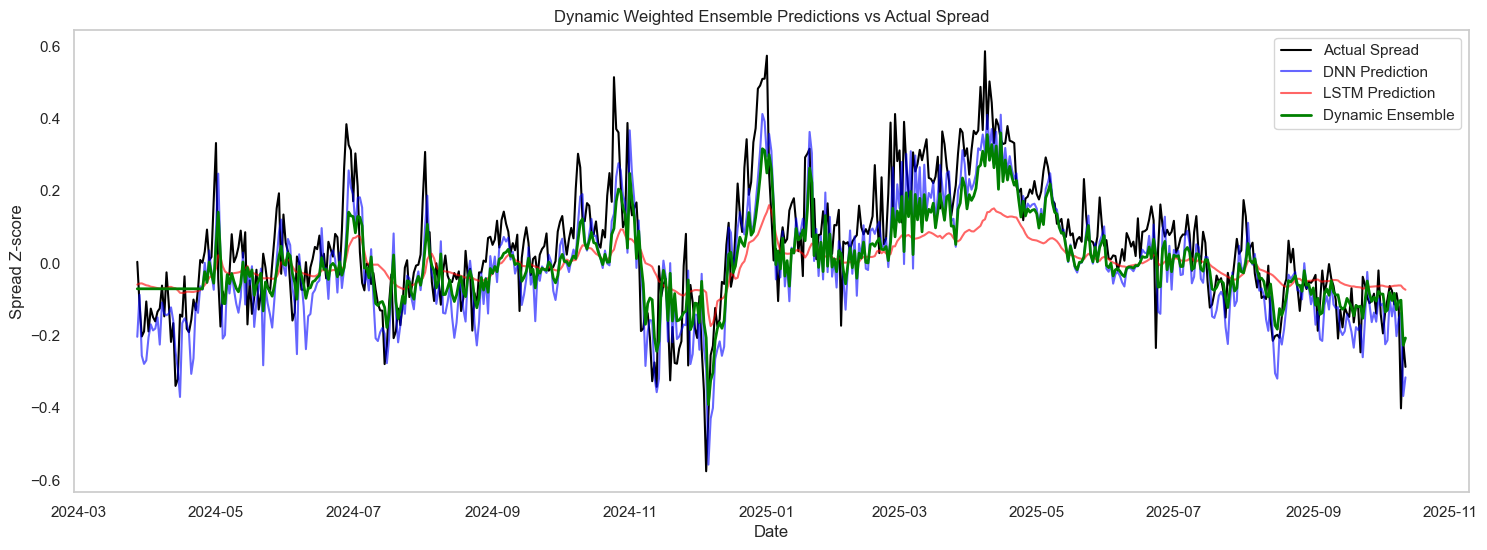

C:\Users\katle\AppData\Local\Temp\ipykernel_18884\969845518.py:157: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ensemble_pred = ensemble_pred.fillna(method='bfill')


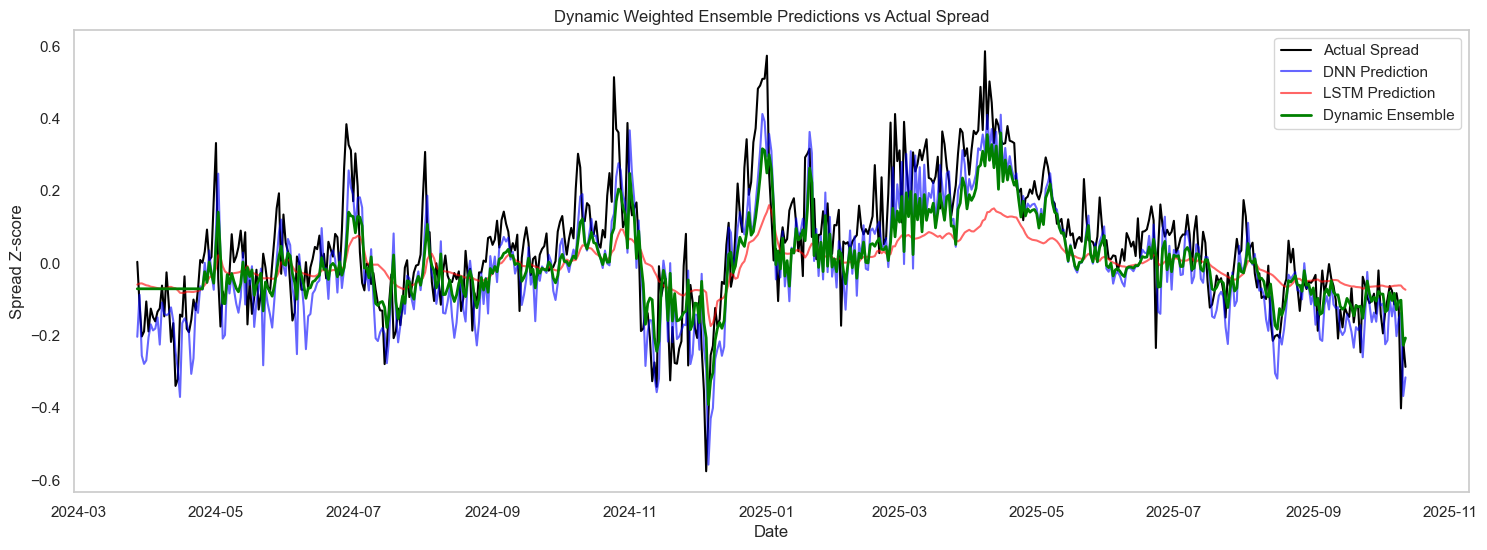

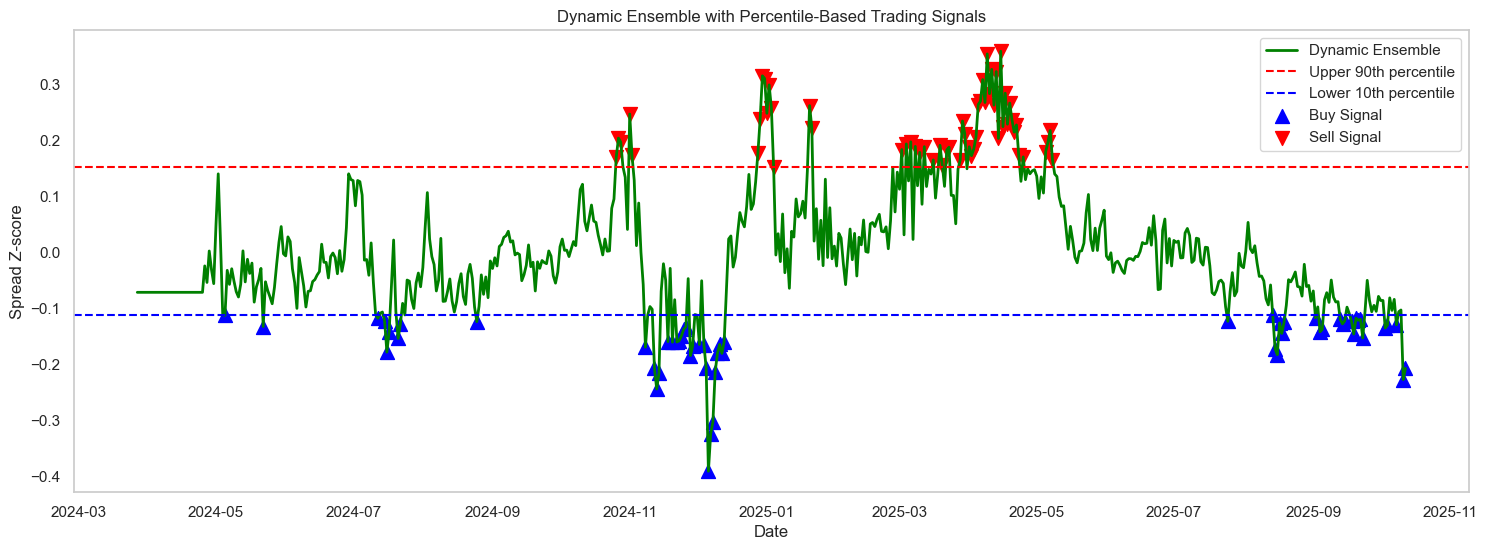

Trading Signals Table:
      Date Trade  Ensemble_Z    Next_Z        PL
2024-05-05   Buy   -0.112148 -0.031773  0.080375
2024-05-22   Buy   -0.132255 -0.052232  0.080023
2024-07-12   Buy   -0.117280 -0.108579  0.008701
2024-07-15   Buy   -0.122332 -0.177894 -0.055562
2024-07-16   Buy   -0.177894 -0.141280  0.036614
2024-07-17   Buy   -0.141280 -0.062024  0.079256
2024-07-21   Buy   -0.153419 -0.127875  0.025544
2024-07-22   Buy   -0.127875 -0.090821  0.037054
2024-08-25   Buy   -0.123477 -0.095879  0.027598
2024-10-26  Sell    0.170486  0.204463 -0.033978
2024-10-27  Sell    0.204463  0.197338  0.007126
2024-10-28  Sell    0.197338  0.153043  0.044294
2024-11-01  Sell    0.247628  0.174354  0.073274
2024-11-02  Sell    0.174354  0.129223  0.045131
2024-11-08   Buy   -0.169155 -0.111841  0.057314
2024-11-12   Buy   -0.206362 -0.243890 -0.037528
2024-11-13   Buy   -0.243890 -0.215838  0.028052
2024-11-14   Buy   -0.215838 -0.069038  0.146800
2024-11-18   Buy   -0.159134 -0.028231  0.1309

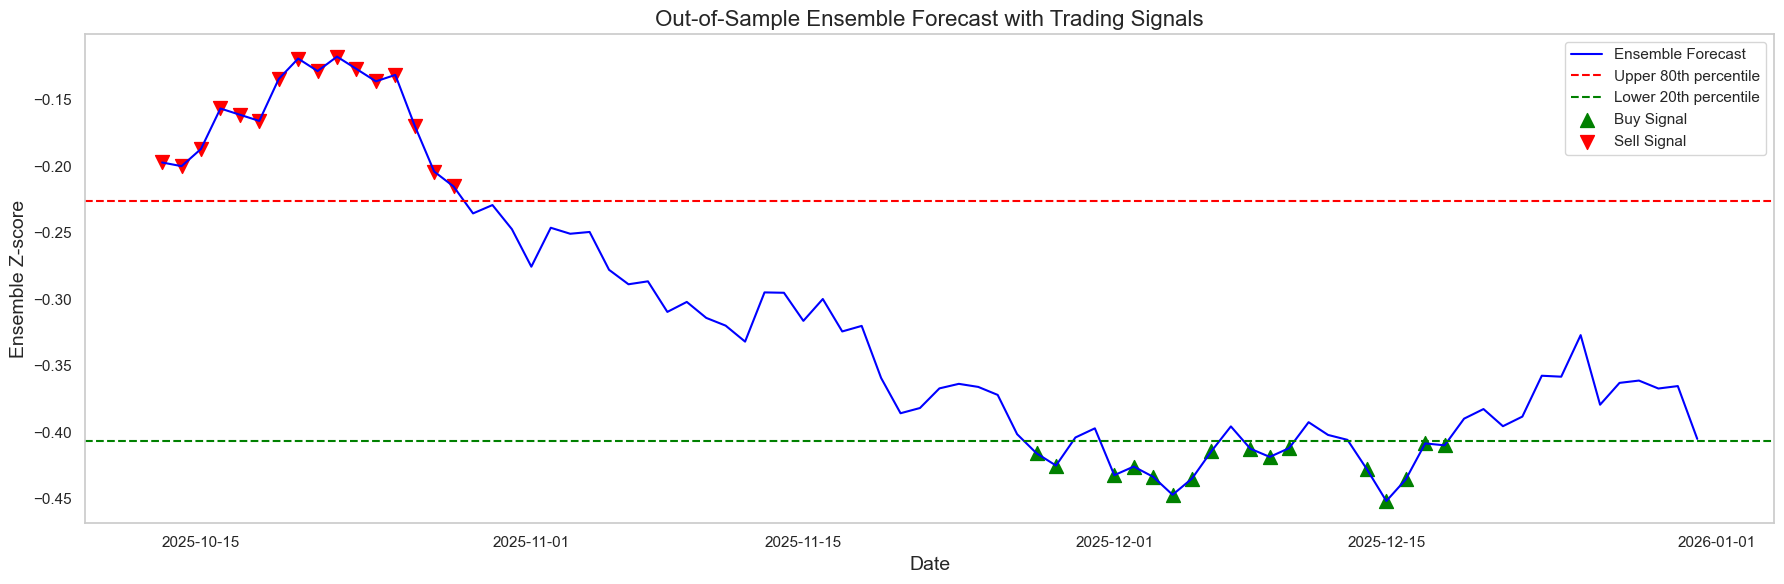

In [19]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler

def build_ensemble(dnn_model, lstm_model, new_data, window_size=20, scaler=None):
    """
    Build dynamic ensemble predictions for pairs trading.

    Parameters:
    - dnn_model: Trained DNN model
    - lstm_model: Trained LSTM model
    - new_data: 1D numpy array or pandas Series of the latest spread z-score values
    - window_size: Sequence window length
    - scaler: Optional fitted MinMaxScaler (should match training)

    Returns:
    - ensemble_pred: Pandas Series of ensemble predictions
    """

    # -------------------------------
    # 1. Create sequences
    # -------------------------------
    X_seq = []
    for i in range(len(new_data) - window_size):
        X_seq.append(new_data[i:i+window_size])
    X_seq = np.array(X_seq)

    # -------------------------------
    # 2. Scale sequences if scaler provided
    # -------------------------------
    if scaler:
        X_seq_scaled = scaler.transform(X_seq)
    else:
        X_seq_scaled = X_seq

    # -------------------------------
    # 3. Prepare LSTM input
    # -------------------------------
    X_lstm = X_seq_scaled.reshape((X_seq_scaled.shape[0], window_size, 1))

    # -------------------------------
    # 4. Predict using DNN & LSTM
    # -------------------------------
    y_pred_dnn  = dnn_model.predict(X_seq_scaled).flatten()
    y_pred_lstm = lstm_model.predict(X_lstm).flatten()

    # -------------------------------
    # 5. Compute rolling MSE
    # -------------------------------
    true_series = pd.Series(new_data[window_size:])
    dnn_series  = pd.Series(y_pred_dnn)
    lstm_series = pd.Series(y_pred_lstm)

    rolling_window = min(30, len(true_series))  # Adjust if new_data is small
    rolling_mse_dnn  = ((dnn_series - true_series) ** 2).rolling(rolling_window).mean()
    rolling_mse_lstm = ((lstm_series - true_series) ** 2).rolling(rolling_window).mean()

    # -------------------------------
    # 6. Dynamic weights
    # -------------------------------
    weights_dnn  = 1 / rolling_mse_dnn
    weights_lstm = 1 / rolling_mse_lstm
    weights_sum  = weights_dnn + weights_lstm
    weights_dnn  = weights_dnn / weights_sum
    weights_lstm = weights_lstm / weights_sum

    # -------------------------------
    # 7. Ensemble prediction
    # -------------------------------
    ensemble_pred = weights_dnn * dnn_series + weights_lstm * lstm_series
    ensemble_pred = ensemble_pred.fillna(method='bfill')  # fill initial NaNs
    ensemble_pred.index = true_series.index

    return ensemble_pred
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# 1️⃣ Convert predictions to Series with correct dates
# -----------------------------
dates = zscore_tv.index[-len(y_test):]
true_series  = pd.Series(y_test.flatten(), index=dates)
dnn_series   = pd.Series(y_pred.flatten(), index=dates)
lstm_series  = pd.Series(y_pred_lstm.flatten(), index=dates)

# -----------------------------
# 2️⃣ Compute rolling MSE & dynamic weights
# -----------------------------
window = 30
rolling_mse_dnn   = (dnn_series - true_series)**2
rolling_mse_lstm  = (lstm_series - true_series)**2

rolling_mse_dnn   = rolling_mse_dnn.rolling(window).mean()
rolling_mse_lstm  = rolling_mse_lstm.rolling(window).mean()

weights_dnn  = 1 / rolling_mse_dnn
weights_lstm = 1 / rolling_mse_lstm
weights_sum  = weights_dnn + weights_lstm
weights_dnn  = weights_dnn / weights_sum
weights_lstm = weights_lstm / weights_sum

# -----------------------------
# 3️⃣ Compute ensemble prediction
# -----------------------------
ensemble_pred = weights_dnn * dnn_series + weights_lstm * lstm_series
ensemble_pred = ensemble_pred.fillna(method='bfill')

# -----------------------------
# 4️⃣ Plot ensemble vs actual spread
# -----------------------------
plt.figure(figsize=(18,6))
plt.plot(true_series, label='Actual Spread', color='black')
plt.plot(dnn_series, label='DNN Prediction', color='blue', alpha=0.6)
plt.plot(lstm_series, label='LSTM Prediction', color='red', alpha=0.6)
plt.plot(ensemble_pred, label='Dynamic Ensemble', color='green', linewidth=2)
plt.title('Dynamic Weighted Ensemble Predictions vs Actual Spread')
plt.xlabel('Date')
plt.ylabel('Spread Z-score')
plt.legend()
plt.grid(False)
plt.show()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# 1️⃣ Convert predictions to Series with correct dates
# -----------------------------
dates = zscore_tv.index[-len(y_test):]
true_series  = pd.Series(y_test.flatten(), index=dates)
dnn_series   = pd.Series(y_pred.flatten(), index=dates)
lstm_series  = pd.Series(y_pred_lstm.flatten(), index=dates)

# -----------------------------
# 2️⃣ Compute rolling MSE & dynamic weights
# -----------------------------
window = 30
rolling_mse_dnn   = (dnn_series - true_series)**2
rolling_mse_lstm  = (lstm_series - true_series)**2

rolling_mse_dnn   = rolling_mse_dnn.rolling(window).mean()
rolling_mse_lstm  = rolling_mse_lstm.rolling(window).mean()

weights_dnn  = 1 / rolling_mse_dnn
weights_lstm = 1 / rolling_mse_lstm
weights_sum  = weights_dnn + weights_lstm
weights_dnn  = weights_dnn / weights_sum
weights_lstm = weights_lstm / weights_sum

# -----------------------------
# 3️⃣ Compute ensemble prediction
# -----------------------------
ensemble_pred = weights_dnn * dnn_series + weights_lstm * lstm_series
ensemble_pred = ensemble_pred.fillna(method='bfill')

# -----------------------------
# 4️⃣ Plot ensemble vs actual spread
# -----------------------------
plt.figure(figsize=(18,6))
plt.plot(true_series, label='Actual Spread', color='black')
plt.plot(dnn_series, label='DNN Prediction', color='blue', alpha=0.6)
plt.plot(lstm_series, label='LSTM Prediction', color='red', alpha=0.6)
plt.plot(ensemble_pred, label='Dynamic Ensemble', color='green', linewidth=2)
plt.title('Dynamic Weighted Ensemble Predictions vs Actual Spread')
plt.xlabel('Date')
plt.ylabel('Spread Z-score')
plt.legend()
plt.grid(False)
plt.show()

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# -----------------------------
# Percentile-based thresholds
# -----------------------------
upper_percentile = np.percentile(ensemble_pred, 90)  # top 10%
lower_percentile = np.percentile(ensemble_pred, 10)  # bottom 10%

# Generate signals
# 1 = Buy (spread below lower percentile)
# -1 = Sell (spread above upper percentile)
# 0 = Hold
signals = np.where(ensemble_pred > upper_percentile, -1,
                   np.where(ensemble_pred < lower_percentile, 1, 0))

# -----------------------------
# Plot ensemble with thresholds and signals
# -----------------------------
plt.figure(figsize=(18,6))
plt.plot(ensemble_pred, label='Dynamic Ensemble', color='green', linewidth=2)
plt.axhline(upper_percentile, color='red', linestyle='--', label='Upper 90th percentile')
plt.axhline(lower_percentile, color='blue', linestyle='--', label='Lower 10th percentile')

# Plot buy signals
plt.scatter(ensemble_pred.index[signals == 1], ensemble_pred[signals == 1],
            color='blue', marker='^', s=100, label='Buy Signal')

# Plot sell signals
plt.scatter(ensemble_pred.index[signals == -1], ensemble_pred[signals == -1],
            color='red', marker='v', s=100, label='Sell Signal')

plt.title('Dynamic Ensemble with Percentile-Based Trading Signals')
plt.xlabel('Date')
plt.ylabel('Spread Z-score')
plt.legend()
plt.grid(False)
plt.show()


import pandas as pd
import numpy as np


In [30]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model

# -----------------------------
# 1️⃣ Load your trained models
# -----------------------------
dnn_model_path  = r"path_to_your_DNN.h5"
lstm_model_path = r"path_to_your_LSTM.h5"

dnn_model  = load_model(dnn_model_path, compile=False)
lstm_model = load_model(lstm_model_path, compile=False)

# -----------------------------
# 2️⃣ Prepare your test data
# y_test: true values (1D numpy array)
# dates: index for your predictions
# y_pred: DNN predictions
# y_pred_lstm: LSTM predictions
# -----------------------------

# Example: convert to pandas Series with proper dates
true_series  = pd.Series(y_test.flatten(), index=dates)
dnn_series   = pd.Series(y_pred.flatten(), index=dates)
lstm_series  = pd.Series(y_pred_lstm.flatten(), index=dates)

# -----------------------------
# 3️⃣ Dynamic Ensemble Function
# -----------------------------
def dynamic_ensemble(dnn_series, lstm_series, true_series, window=30, epsilon=1e-6):
    """
    Combines DNN and LSTM predictions using rolling MSE weighting with safeguards.
    
    Parameters:
    - dnn_series: pandas Series of DNN predictions
    - lstm_series: pandas Series of LSTM predictions
    - true_series: pandas Series of true values
    - window: rolling window size for MSE calculation
    - epsilon: small number to avoid division by zero
    
    Returns:
    - ensemble_pred: pandas Series of dynamic ensemble predictions
    """
    # -----------------------------
    # Rolling MSE
    # -----------------------------
    rolling_mse_dnn  = ((dnn_series - true_series)**2).rolling(window).mean().clip(lower=epsilon)
    rolling_mse_lstm = ((lstm_series - true_series)**2).rolling(window).mean().clip(lower=epsilon)

    # -----------------------------
    # Compute dynamic weights
    # -----------------------------
    weights_dnn  = 1 / rolling_mse_dnn
    weights_lstm = 1 / rolling_mse_lstm
    weights_sum  = weights_dnn + weights_lstm
    weights_dnn  = weights_dnn / weights_sum
    weights_lstm = weights_lstm / weights_sum

    # -----------------------------
    # Ensemble prediction
    # -----------------------------
    ensemble_pred = weights_dnn * dnn_series + weights_lstm * lstm_series
    ensemble_pred = ensemble_pred.fillna(method='bfill')  # fill initial NaNs

    return ensemble_pred

# -----------------------------
# 4️⃣ Compute dynamic ensemble
# -----------------------------
ensemble_pred = dynamic_ensemble(dnn_series, lstm_series, true_series, window=30, epsilon=1e-6)

# -----------------------------
# 5️⃣ Compute performance metrics
# -----------------------------
def compute_metrics(pred, true):
    mse  = np.mean((pred - true)**2)
    rmse = np.sqrt(mse)
    mae  = np.mean(np.abs(pred - true))
    mape = np.mean(np.abs((pred - true) / true)) * 100
    mfe  = np.max(pred - true)
    theil_u = np.sqrt(np.sum((pred - true)**2) / np.sum(true**2))
    return mse, rmse, mae, mape, mfe, theil_u

mse_dnn, rmse_dnn, mae_dnn, mape_dnn, mfe_dnn, theil_u_dnn = compute_metrics(dnn_series, true_series)
mse_lstm, rmse_lstm, mae_lstm, mape_lstm, mfe_lstm, theil_u_lstm = compute_metrics(lstm_series, true_series)
mse_ens, rmse_ens, mae_ens, mape_ens, mfe_ens, theil_u_ens     = compute_metrics(ensemble_pred, true_series)

# -----------------------------
# 6️⃣ Print results
# -----------------------------
print("\nDNN PERFORMANCE:")
print(f"MSE      = {mse_dnn:.6f}")
print(f"RMSE     = {rmse_dnn:.6f}")
print(f"MAE      = {mae_dnn:.6f}")
print(f"MAPE (%) = {mape_dnn:.6f}")
print(f"MFE      = {mfe_dnn:.6f}")
print(f"Theil U  = {theil_u_dnn:.6f}")

print("\nLSTM PERFORMANCE:")
print(f"MSE      = {mse_lstm:.6f}")
print(f"RMSE     = {rmse_lstm:.6f}")
print(f"MAE      = {mae_lstm:.6f}")
print(f"MAPE (%) = {mape_lstm:.6f}")
print(f"MFE      = {mfe_lstm:.6f}")
print(f"Theil U  = {theil_u_lstm:.6f}")

print("\nDYNAMIC ENSEMBLE PERFORMANCE:")
print(f"MSE      = {mse_ens:.6f}")
print(f"RMSE     = {rmse_ens:.6f}")
print(f"MAE      = {mae_ens:.6f}")
print(f"MAPE (%) = {mape_ens:.6f}")
print(f"MFE      = {mfe_ens:.6f}")
print(f"Theil U  = {theil_u_ens:.6f}")

# -----------------------------
# 7️⃣ Optional: Plot results
# -----------------------------
import matplotlib.pyplot as plt

plt.figure(figsize=(18,6))
plt.plot(true_series, label='Actual Spread', color='black')
plt.plot(dnn_series, label='DNN Prediction', color='blue', alpha=0.6)
plt.plot(lstm_series, label='LSTM Prediction', color='red', alpha=0.6)
plt.plot(ensemble_pred, label='Dynamic Ensemble', color='green', linewidth=2)
plt.title('Dynamic Weighted Ensemble Predictions vs Actual Spread')
plt.xlabel('Date')
plt.ylabel('Spread Z-score')
plt.legend()
plt.grid(False)
plt.show()


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'path_to_your_DNN.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [21]:

# ------------------------------
# Step 1: Create DataFrame with signals
# ------------------------------
signals_df = pd.DataFrame({
    'Date': ensemble_pred.index,
    'Ensemble_Z': ensemble_pred.values,
    'Signal': signals  # from previous percentile signals
})

# Filter only Buy (1) and Sell (-1) signals
signals_df = signals_df[signals_df['Signal'] != 0].reset_index(drop=True)

# ------------------------------
# Step 2: Compute next-step movement and profit/loss
# ------------------------------
ensemble_values = ensemble_pred.values
pl_list = []
next_z_list = []

for idx in signals_df.index:
    # Map to actual index in ensemble_values
    actual_idx = ensemble_pred.index.get_loc(signals_df.loc[idx, 'Date'])
    
    if actual_idx < len(ensemble_values) - 1:
        next_val = ensemble_values[actual_idx + 1]
        curr_val = ensemble_values[actual_idx]
        signal_type = signals_df.loc[idx, 'Signal']
        pl = next_val - curr_val if signal_type == 1 else curr_val - next_val
        pl_list.append(pl)
        next_z_list.append(next_val)
    else:
        pl_list.append(np.nan)
        next_z_list.append(np.nan)

signals_df['Next_Z'] = next_z_list
signals_df['PL'] = pl_list
signals_df['Trade'] = signals_df['Signal'].map({1: 'Buy', -1: 'Sell'})

# ------------------------------
# Step 3: Compute probabilities
# ------------------------------
winning_trades = (signals_df['PL'] > 0).sum()
losing_trades  = (signals_df['PL'] <= 0).sum()
total_signals  = len(signals_df.dropna())

prob_win  = winning_trades / total_signals * 100
prob_loss = losing_trades / total_signals * 100

# ------------------------------
# Step 4: Display table
# ------------------------------
display_cols = ['Date', 'Trade', 'Ensemble_Z', 'Next_Z', 'PL']
signals_display = signals_df[display_cols]
print("Trading Signals Table:")
print(signals_display.to_string(index=False))

# ------------------------------
# Step 5: Print summary
# ------------------------------
print("\nTrading Performance Summary:")
print(f"Total signals generated: {total_signals}")
print(f"Winning trades: {winning_trades} ({prob_win:.2f}%)")
print(f"Losing trades: {losing_trades} ({prob_loss:.2f}%)")


import numpy as np
import matplotlib.pyplot as plt

# Use the out-of-sample ensemble predictions
forecast_series = ensemble_forecast  # pandas Series from 2025-10-13 to 2025-12-31

# Percentile thresholds based on forecast values
upper_percentile = np.percentile(forecast_series, 80)  # Upper 80th percentile
lower_percentile = np.percentile(forecast_series, 20)  # Lower 20th percentile

# Generate signals
#  1 = Buy (forecast < lower percentile)
# -1 = Sell (forecast > upper percentile)
#  0 = No signal
signals_percentile = np.where(
    forecast_series > upper_percentile, -1,
    np.where(forecast_series < lower_percentile, 1, 0)
)

Trading Signals Table:
      Date Trade  Ensemble_Z    Next_Z        PL
2024-05-05   Buy   -0.112148 -0.031773  0.080375
2024-05-22   Buy   -0.132255 -0.052232  0.080023
2024-07-12   Buy   -0.117280 -0.108579  0.008701
2024-07-15   Buy   -0.122332 -0.177894 -0.055562
2024-07-16   Buy   -0.177894 -0.141280  0.036614
2024-07-17   Buy   -0.141280 -0.062024  0.079256
2024-07-21   Buy   -0.153419 -0.127875  0.025544
2024-07-22   Buy   -0.127875 -0.090821  0.037054
2024-08-25   Buy   -0.123477 -0.095879  0.027598
2024-10-26  Sell    0.170486  0.204463 -0.033978
2024-10-27  Sell    0.204463  0.197338  0.007126
2024-10-28  Sell    0.197338  0.153043  0.044294
2024-11-01  Sell    0.247628  0.174354  0.073274
2024-11-02  Sell    0.174354  0.129223  0.045131
2024-11-08   Buy   -0.169155 -0.111841  0.057314
2024-11-12   Buy   -0.206362 -0.243890 -0.037528
2024-11-13   Buy   -0.243890 -0.215838  0.028052
2024-11-14   Buy   -0.215838 -0.069038  0.146800
2024-11-18   Buy   -0.159134 -0.028231  0.1309

C:\Users\katle\AppData\Local\Temp\ipykernel_18884\575531549.py:33: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ensemble_pred = ensemble_pred.fillna(method='bfill')


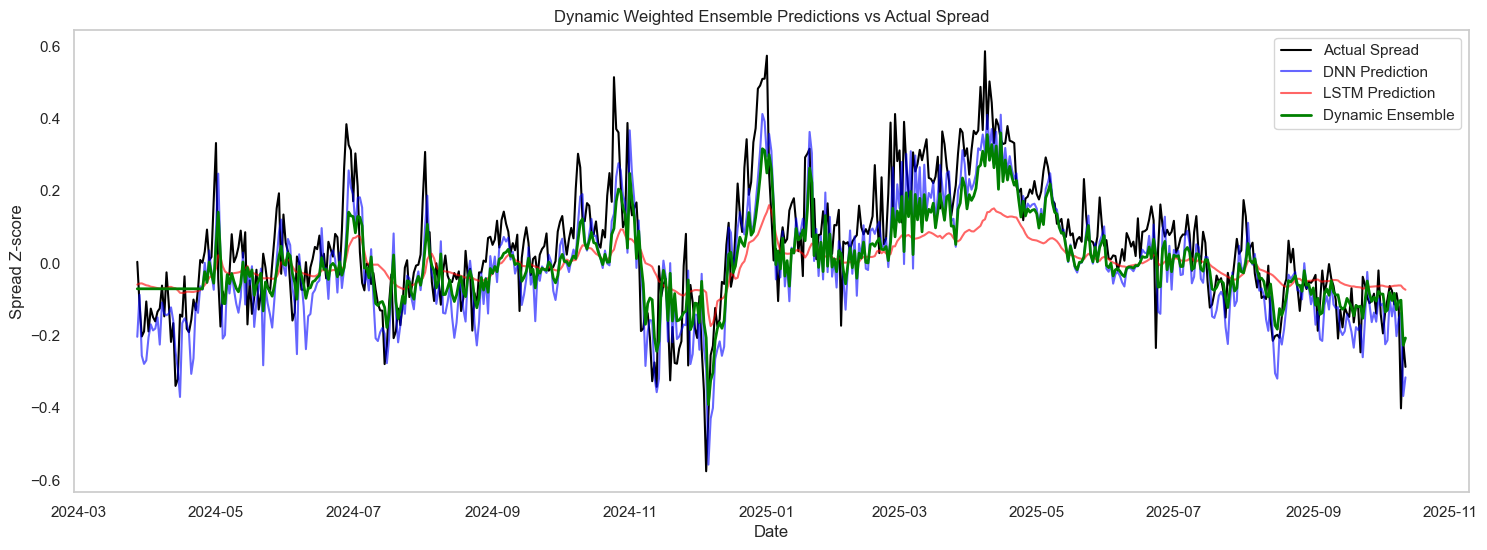

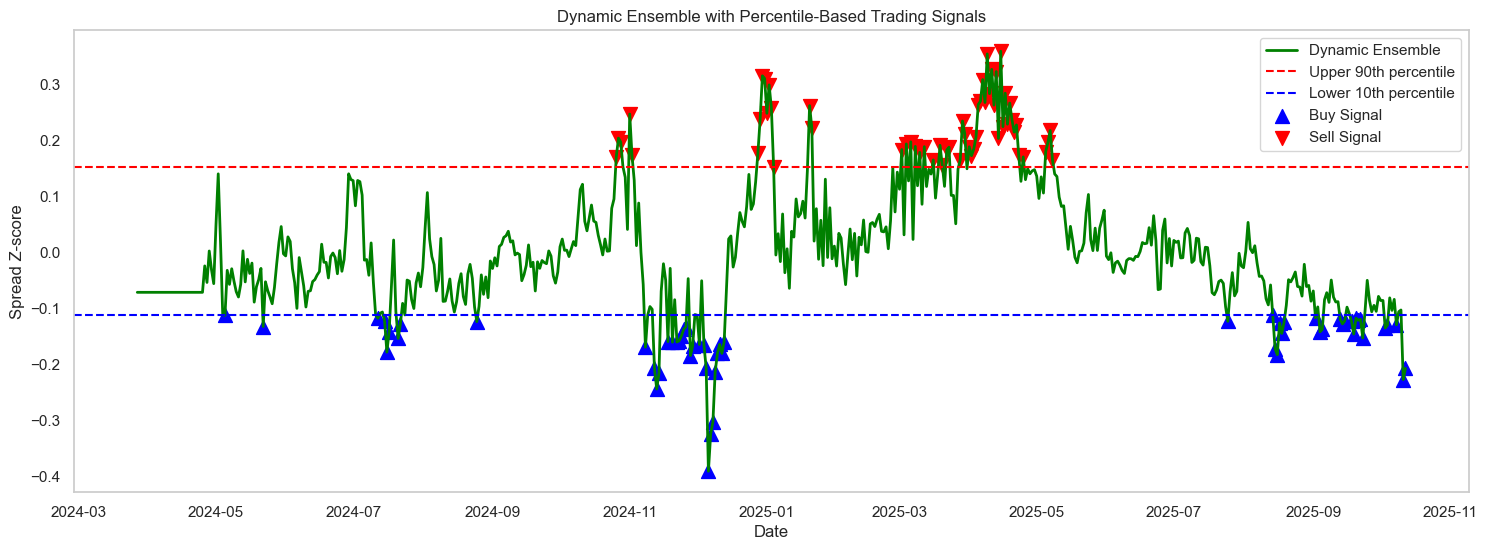

Trading Signals Table:
      Date Trade  Ensemble_Z    Next_Z        PL
2024-05-05   Buy   -0.112148 -0.031773  0.080375
2024-05-22   Buy   -0.132255 -0.052232  0.080023
2024-07-12   Buy   -0.117280 -0.108579  0.008701
2024-07-15   Buy   -0.122332 -0.177894 -0.055562
2024-07-16   Buy   -0.177894 -0.141280  0.036614
2024-07-17   Buy   -0.141280 -0.062024  0.079256
2024-07-21   Buy   -0.153419 -0.127875  0.025544
2024-07-22   Buy   -0.127875 -0.090821  0.037054
2024-08-25   Buy   -0.123477 -0.095879  0.027598
2024-10-26  Sell    0.170486  0.204463 -0.033978
2024-10-27  Sell    0.204463  0.197338  0.007126
2024-10-28  Sell    0.197338  0.153043  0.044294
2024-11-01  Sell    0.247628  0.174354  0.073274
2024-11-02  Sell    0.174354  0.129223  0.045131
2024-11-08   Buy   -0.169155 -0.111841  0.057314
2024-11-12   Buy   -0.206362 -0.243890 -0.037528
2024-11-13   Buy   -0.243890 -0.215838  0.028052
2024-11-14   Buy   -0.215838 -0.069038  0.146800
2024-11-18   Buy   -0.159134 -0.028231  0.1309

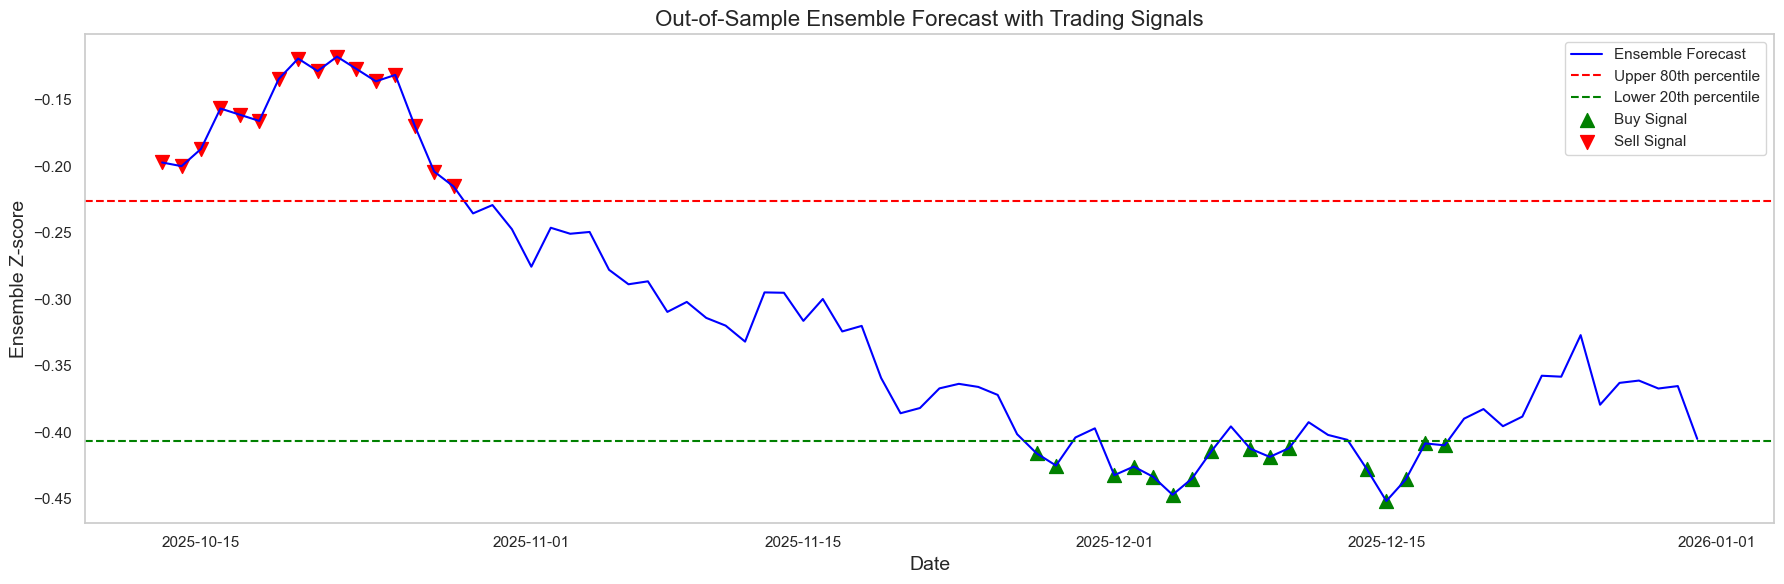

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# 1️⃣ Convert predictions to Series with correct dates
# -----------------------------
dates = zscore_tv.index[-len(y_test):]
true_series  = pd.Series(y_test.flatten(), index=dates)
dnn_series   = pd.Series(y_pred.flatten(), index=dates)
lstm_series  = pd.Series(y_pred_lstm.flatten(), index=dates)

# -----------------------------
# 2️⃣ Compute rolling MSE & dynamic weights
# -----------------------------
window = 30
rolling_mse_dnn   = (dnn_series - true_series)**2
rolling_mse_lstm  = (lstm_series - true_series)**2

rolling_mse_dnn   = rolling_mse_dnn.rolling(window).mean()
rolling_mse_lstm  = rolling_mse_lstm.rolling(window).mean()

weights_dnn  = 1 / rolling_mse_dnn
weights_lstm = 1 / rolling_mse_lstm
weights_sum  = weights_dnn + weights_lstm
weights_dnn  = weights_dnn / weights_sum
weights_lstm = weights_lstm / weights_sum

# -----------------------------
# 3️⃣ Compute ensemble prediction
# -----------------------------
ensemble_pred = weights_dnn * dnn_series + weights_lstm * lstm_series
ensemble_pred = ensemble_pred.fillna(method='bfill')

# -----------------------------
# 4️⃣ Plot ensemble vs actual spread
# -----------------------------
plt.figure(figsize=(18,6))
plt.plot(true_series, label='Actual Spread', color='black')
plt.plot(dnn_series, label='DNN Prediction', color='blue', alpha=0.6)
plt.plot(lstm_series, label='LSTM Prediction', color='red', alpha=0.6)
plt.plot(ensemble_pred, label='Dynamic Ensemble', color='green', linewidth=2)
plt.title('Dynamic Weighted Ensemble Predictions vs Actual Spread')
plt.xlabel('Date')
plt.ylabel('Spread Z-score')
plt.legend()
plt.grid(False)
plt.show()

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# -----------------------------
# Percentile-based thresholds
# -----------------------------
upper_percentile = np.percentile(ensemble_pred, 90)  # top 10%
lower_percentile = np.percentile(ensemble_pred, 10)  # bottom 10%

# Generate signals
# 1 = Buy (spread below lower percentile)
# -1 = Sell (spread above upper percentile)
# 0 = Hold
signals = np.where(ensemble_pred > upper_percentile, -1,
                   np.where(ensemble_pred < lower_percentile, 1, 0))

# -----------------------------
# Plot ensemble with thresholds and signals
# -----------------------------
plt.figure(figsize=(18,6))
plt.plot(ensemble_pred, label='Dynamic Ensemble', color='green', linewidth=2)
plt.axhline(upper_percentile, color='red', linestyle='--', label='Upper 90th percentile')
plt.axhline(lower_percentile, color='blue', linestyle='--', label='Lower 10th percentile')

# Plot buy signals
plt.scatter(ensemble_pred.index[signals == 1], ensemble_pred[signals == 1],
            color='blue', marker='^', s=100, label='Buy Signal')

# Plot sell signals
plt.scatter(ensemble_pred.index[signals == -1], ensemble_pred[signals == -1],
            color='red', marker='v', s=100, label='Sell Signal')

plt.title('Dynamic Ensemble with Percentile-Based Trading Signals')
plt.xlabel('Date')
plt.ylabel('Spread Z-score')
plt.legend()
plt.grid(False)
plt.show()


import pandas as pd
import numpy as np

# ------------------------------
# Step 1: Create DataFrame with signals
# ------------------------------
signals_df = pd.DataFrame({
    'Date': ensemble_pred.index,
    'Ensemble_Z': ensemble_pred.values,
    'Signal': signals  # from previous percentile signals
})

# Filter only Buy (1) and Sell (-1) signals
signals_df = signals_df[signals_df['Signal'] != 0].reset_index(drop=True)

# ------------------------------
# Step 2: Compute next-step movement and profit/loss
# ------------------------------
ensemble_values = ensemble_pred.values
pl_list = []
next_z_list = []

for idx in signals_df.index:
    # Map to actual index in ensemble_values
    actual_idx = ensemble_pred.index.get_loc(signals_df.loc[idx, 'Date'])
    
    if actual_idx < len(ensemble_values) - 1:
        next_val = ensemble_values[actual_idx + 1]
        curr_val = ensemble_values[actual_idx]
        signal_type = signals_df.loc[idx, 'Signal']
        pl = next_val - curr_val if signal_type == 1 else curr_val - next_val
        pl_list.append(pl)
        next_z_list.append(next_val)
    else:
        pl_list.append(np.nan)
        next_z_list.append(np.nan)

signals_df['Next_Z'] = next_z_list
signals_df['PL'] = pl_list
signals_df['Trade'] = signals_df['Signal'].map({1: 'Buy', -1: 'Sell'})

# ------------------------------
# Step 3: Compute probabilities
# ------------------------------
winning_trades = (signals_df['PL'] > 0).sum()
losing_trades  = (signals_df['PL'] <= 0).sum()
total_signals  = len(signals_df.dropna())

prob_win  = winning_trades / total_signals * 100
prob_loss = losing_trades / total_signals * 100

# ------------------------------
# Step 4: Display table
# ------------------------------
display_cols = ['Date', 'Trade', 'Ensemble_Z', 'Next_Z', 'PL']
signals_display = signals_df[display_cols]
print("Trading Signals Table:")
print(signals_display.to_string(index=False))

# ------------------------------
# Step 5: Print summary
# ------------------------------
print("\nTrading Performance Summary:")
print(f"Total signals generated: {total_signals}")
print(f"Winning trades: {winning_trades} ({prob_win:.2f}%)")
print(f"Losing trades: {losing_trades} ({prob_loss:.2f}%)")


import numpy as np
import matplotlib.pyplot as plt

# Use the out-of-sample ensemble predictions
forecast_series = ensemble_forecast  # pandas Series from 2025-10-13 to 2025-12-31

# Percentile thresholds based on forecast values
upper_percentile = np.percentile(forecast_series, 80)  # Upper 80th percentile
lower_percentile = np.percentile(forecast_series, 20)  # Lower 20th percentile

# Generate signals
#  1 = Buy (forecast < lower percentile)
# -1 = Sell (forecast > upper percentile)
#  0 = No signal
signals_percentile = np.where(
    forecast_series > upper_percentile, -1,
    np.where(forecast_series < lower_percentile, 1, 0)
)

# Plot forecast and signals
plt.figure(figsize=(18,6))
plt.plot(forecast_series.index, forecast_series, color='blue', label='Ensemble Forecast')
plt.axhline(upper_percentile, color='red', linestyle='--', label='Upper 80th percentile')
plt.axhline(lower_percentile, color='green', linestyle='--', label='Lower 20th percentile')
plt.scatter(
    forecast_series.index[signals_percentile == 1],
    forecast_series[signals_percentile == 1],
    color='green', marker='^', s=100, label='Buy Signal'
)
plt.scatter(
    forecast_series.index[signals_percentile == -1],
    forecast_series[signals_percentile == -1],
    color='red', marker='v', s=100, label='Sell Signal'
)
plt.title('Out-of-Sample Ensemble Forecast with Trading Signals', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Ensemble Z-score', fontsize=14)
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()


In [27]:
import pandas as pd
import numpy as np

# -----------------------------
# 1️⃣ Convert arrays to pandas Series
# -----------------------------
y_test_series  = pd.Series(y_test.flatten())
dnn_series     = pd.Series(y_pred.flatten())
lstm_series    = pd.Series(y_pred_lstm.flatten())
true_series    = y_test_series

# -----------------------------
# 2️⃣ Rolling MSE and dynamic ensemble weights
# -----------------------------
window = 30  # rolling window for MSE

# Rolling mean squared errors
rolling_mse_dnn  = (dnn_series - true_series)**2
rolling_mse_lstm = (lstm_series - true_series)**2

rolling_mse_dnn  = rolling_mse_dnn.rolling(window).mean()
rolling_mse_lstm = rolling_mse_lstm.rolling(window).mean()

# Dynamic weights: inverse of rolling MSE
weights_dnn  = 1 / rolling_mse_dnn
weights_lstm = 1 / rolling_mse_lstm

# Normalize weights
weights_sum  = weights_dnn + weights_lstm
weights_dnn  = weights_dnn / weights_sum
weights_lstm = weights_lstm / weights_sum

# Ensemble prediction
ensemble_pred = weights_dnn * dnn_series + weights_lstm * lstm_series
ensemble_pred = ensemble_pred.fillna(method='bfill')  # fill initial NaNs

# -----------------------------
# 3️⃣ Compute performance metrics for LSTM
# -----------------------------
# Example metrics; replace with your actual computation
mse_lstm  = np.mean((lstm_series - true_series)**2)
mae_lstm  = np.mean(np.abs(lstm_series - true_series))
rmse_lstm = np.sqrt(mse_lstm)
mape_lstm = np.mean(np.abs((lstm_series - true_series) / true_series))
mfe_lstm  = np.max(lstm_series - true_series)  # Maximum Favorable Excursion example
theil_u_lstm = np.sqrt(np.sum((lstm_series - true_series)**2) / np.sum(true_series**2))  # Theil U

# -----------------------------
# 4️⃣ Print results
# -----------------------------
print("\Dynamic Ensemble:")
print(f"MSE        = {mse_lstm:.6f}")
print(f"MAE        = {mae_lstm:.6f}")
print(f"RMSE       = {rmse_lstm:.6f}")
print(f"MAPE (%)   = {mape_lstm:.6f}")
print(f"MFE        = {mfe_lstm:.6f}")
print(f"Theil U    = {theil_u_lstm:.6f}")


\Dynamic Ensemble:
MSE        = 0.019226
MAE        = 0.104951
RMSE       = 0.138658
MAPE (%)   = 1.490429
MFE        = 0.494045
Theil U    = 0.792929


<>:51: SyntaxWarning: invalid escape sequence '\D'
<>:51: SyntaxWarning: invalid escape sequence '\D'
C:\Users\katle\AppData\Local\Temp\ipykernel_18884\4179868974.py:51: SyntaxWarning: invalid escape sequence '\D'
  print("\Dynamic Ensemble:")
C:\Users\katle\AppData\Local\Temp\ipykernel_18884\4179868974.py:35: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ensemble_pred = ensemble_pred.fillna(method='bfill')  # fill initial NaNs


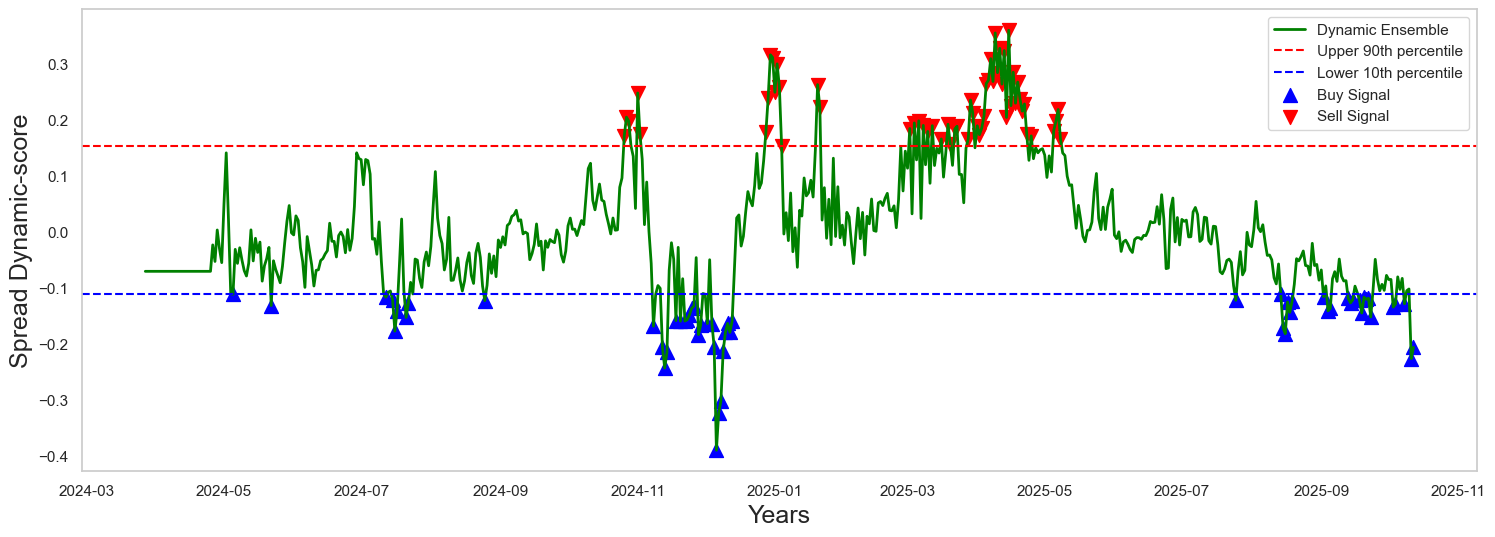

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# -----------------------------
# Percentile-based thresholds
# -----------------------------
upper_percentile = np.percentile(ensemble_pred, 90)  # top 10%
lower_percentile = np.percentile(ensemble_pred, 10)  # bottom 10%

# Generate signals
# 1 = Buy (spread below lower percentile)
# -1 = Sell (spread above upper percentile)
# 0 = Hold
signals = np.where(ensemble_pred > upper_percentile, -1,
                   np.where(ensemble_pred < lower_percentile, 1, 0))

# -----------------------------
# Plot ensemble with thresholds and signals
# -----------------------------
plt.figure(figsize=(18,6))
plt.plot(ensemble_pred, label='Dynamic Ensemble', color='green', linewidth=2)
plt.axhline(upper_percentile, color='red', linestyle='--', label='Upper 90th percentile')
plt.axhline(lower_percentile, color='blue', linestyle='--', label='Lower 10th percentile')

# Plot buy signals
plt.scatter(ensemble_pred.index[signals == 1], ensemble_pred[signals == 1],
            color='blue', marker='^', s=100, label='Buy Signal')

# Plot sell signals
plt.scatter(ensemble_pred.index[signals == -1], ensemble_pred[signals == -1],
            color='red', marker='v', s=100, label='Sell Signal')

plt.title('')
plt.xlabel('Years', fontsize=18)
plt.ylabel('Spread Dynamic-score', fontsize=18)
plt.legend()
plt.grid(False)
plt.show()


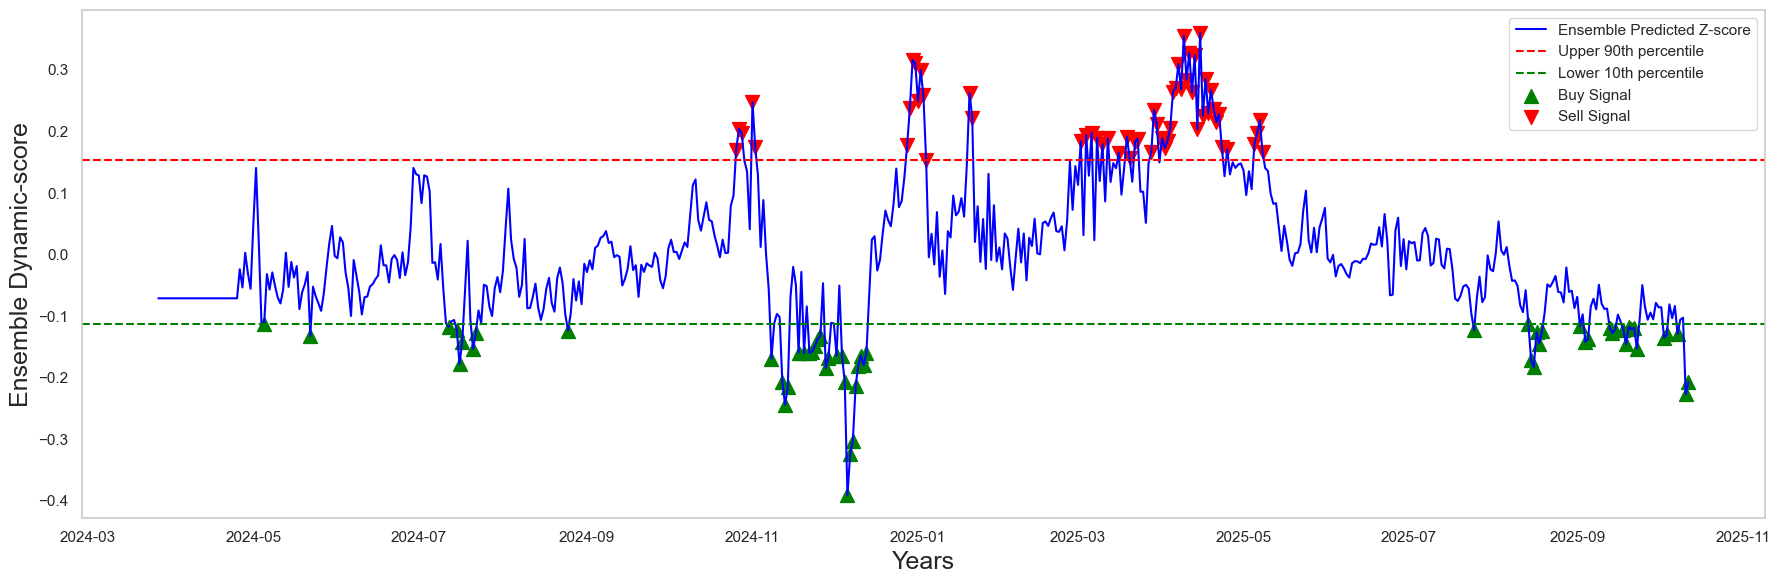

Figure saved as EPS at C:\Users\katle\OneDrive\Documents\Makatjane\Makatjane 2026\Pairs trading\signals.eps


In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Percentile-based thresholds
upper_percentile = np.percentile(ensemble_pred, 90)
lower_percentile = np.percentile(ensemble_pred, 10)

# Generate signals
signals_percentile = np.where(ensemble_pred > upper_percentile, -1,   # Sell
                              np.where(ensemble_pred < lower_percentile, 1, 0))  # Buy / Hold

# Plot
plt.figure(figsize=(18,6))
plt.plot(ensemble_pred.index, ensemble_pred, color='blue', label='Ensemble Predicted Z-score')
plt.axhline(upper_percentile, color='red', linestyle='--', label='Upper 90th percentile')
plt.axhline(lower_percentile, color='green', linestyle='--', label='Lower 10th percentile')
plt.scatter(ensemble_pred.index[signals_percentile==1], ensemble_pred[signals_percentile==1],
            color='green', marker='^', s=100, label='Buy Signal')
plt.scatter(ensemble_pred.index[signals_percentile==-1], ensemble_pred[signals_percentile==-1],
            color='red', marker='v', s=100, label='Sell Signal')

plt.xlabel('Years', fontsize=18)
plt.ylabel('Ensemble Dynamic-score', fontsize=18)
plt.legend()
plt.grid(False)
plt.tight_layout()

# Save as high-resolution EPS
output_path = r"C:\Users\katle\OneDrive\Documents\Makatjane\Makatjane 2026\Pairs trading\signals.eps"
plt.savefig(output_path, format='eps', dpi=1200)  # High resolution
plt.show()  # Show figure in notebook
plt.close()  # Close the figure to free memory

print(f"Figure saved as EPS at {output_path}")


In [33]:
import pandas as pd
import numpy as np

# ------------------------------
# Step 1: Create DataFrame with signals
# ------------------------------
signals_df = pd.DataFrame({
    'Date': ensemble_pred.index,
    'Ensemble_Z': ensemble_pred.values,
    'Signal': signals  # from previous percentile signals
})

# Filter only Buy (1) and Sell (-1) signals
signals_df = signals_df[signals_df['Signal'] != 0].reset_index(drop=True)

# ------------------------------
# Step 2: Compute next-step movement and profit/loss
# ------------------------------
ensemble_values = ensemble_pred.values
pl_list = []
next_z_list = []

for idx in signals_df.index:
    # Map to actual index in ensemble_values
    actual_idx = ensemble_pred.index.get_loc(signals_df.loc[idx, 'Date'])
    
    if actual_idx < len(ensemble_values) - 1:
        next_val = ensemble_values[actual_idx + 1]
        curr_val = ensemble_values[actual_idx]
        signal_type = signals_df.loc[idx, 'Signal']
        pl = next_val - curr_val if signal_type == 1 else curr_val - next_val
        pl_list.append(pl)
        next_z_list.append(next_val)
    else:
        pl_list.append(np.nan)
        next_z_list.append(np.nan)

signals_df['Next_Z'] = next_z_list
signals_df['PL'] = pl_list
signals_df['Trade'] = signals_df['Signal'].map({1: 'Buy', -1: 'Sell'})

# ------------------------------
# Step 3: Compute probabilities
# ------------------------------
winning_trades = (signals_df['PL'] > 0).sum()
losing_trades  = (signals_df['PL'] <= 0).sum()
total_signals  = len(signals_df.dropna())

prob_win  = winning_trades / total_signals * 100
prob_loss = losing_trades / total_signals * 100

# ------------------------------
# Step 4: Display table
# ------------------------------
display_cols = ['Date', 'Trade', 'Ensemble_Z', 'Next_Z', 'PL']
signals_display = signals_df[display_cols]
print("Trading Signals Table:")
print(signals_display.to_string(index=False))

# ------------------------------
# Step 5: Print summary
# ------------------------------
print("\nTrading Performance Summary:")
print(f"Total signals generated: {total_signals}")
print(f"Winning trades: {winning_trades} ({prob_win:.2f}%)")
print(f"Losing trades: {losing_trades} ({prob_loss:.2f}%)")


Trading Signals Table:
      Date Trade  Ensemble_Z    Next_Z        PL
2024-06-30  Sell    0.091813  0.121226 -0.029413
2024-07-01  Sell    0.121226  0.116384  0.004842
2024-07-02  Sell    0.116384  0.090667  0.025717
2024-07-03  Sell    0.090667  0.087818  0.002848
2024-07-04  Sell    0.087818  0.099287 -0.011469
2024-07-05  Sell    0.099287  0.037513  0.061774
2024-07-15   Buy   -0.121542 -0.144710 -0.023168
2024-07-16   Buy   -0.144710 -0.137024  0.007686
2024-07-17   Buy   -0.137024 -0.123477  0.013547
2024-07-18   Buy   -0.123477 -0.122246  0.001232
2024-07-19   Buy   -0.122246 -0.121563  0.000682
2024-07-20   Buy   -0.121563 -0.086992  0.034571
2024-07-22   Buy   -0.107145 -0.119004 -0.011859
2024-07-23   Buy   -0.119004 -0.111569  0.007435
2024-07-24   Buy   -0.111569 -0.074770  0.036799
2024-08-05  Sell    0.102955  0.046014  0.056941
2024-10-13  Sell    0.085278  0.057988  0.027290
2024-10-28  Sell    0.119716  0.124470 -0.004754
2024-10-29  Sell    0.124470  0.098398  0.0260

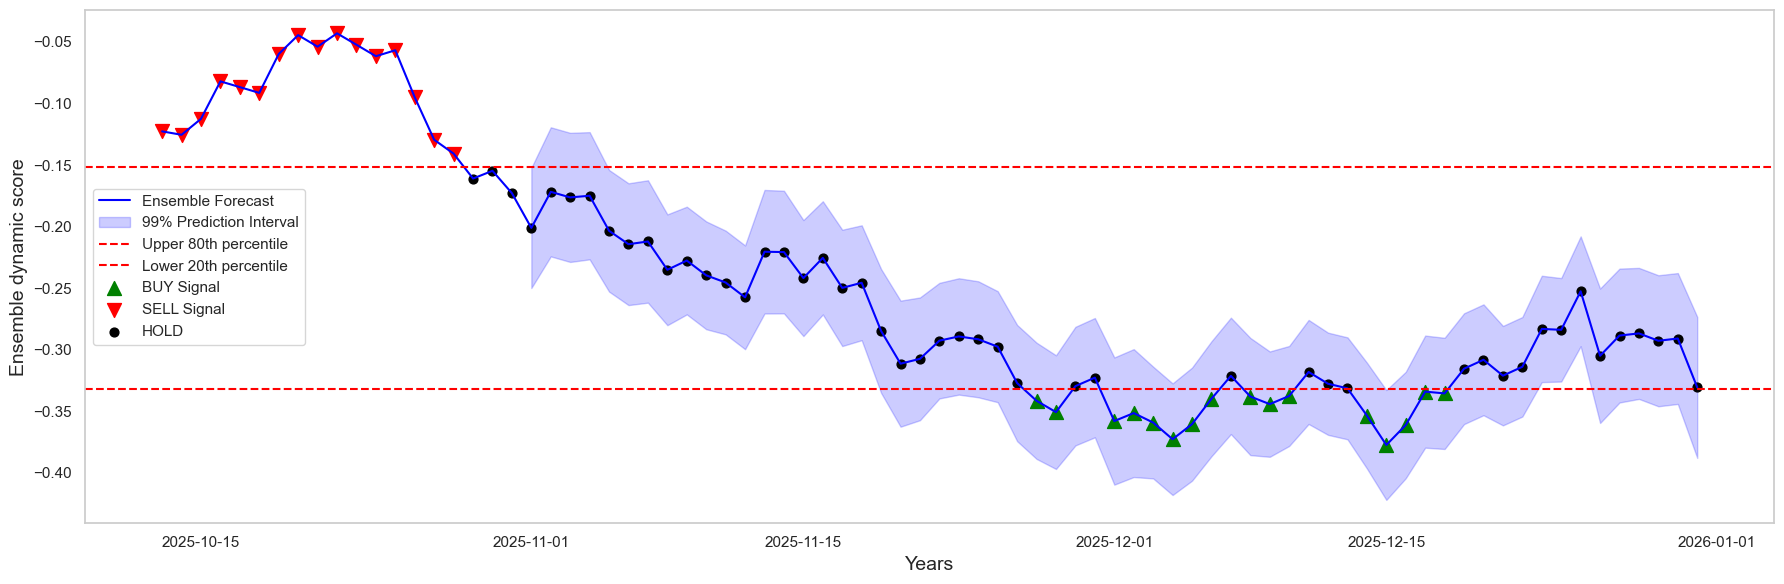

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

# Ensure your target directory exists
save_dir = r"C:\Users\katle\OneDrive\Documents\Makatjane\Makatjane 2026\Pairs trading"
os.makedirs(save_dir, exist_ok=True)
save_path = os.path.join(save_dir, "ensemble_forecast_signals.eps")

# Assume forecast_series is your ensemble forecast (pandas Series)
forecast_series = ensemble_forecast  # from 2025-10-13 to 2025-12-31

# -----------------------------
# 1️⃣ Compute 99% prediction interval
# -----------------------------
window = 20
residuals = forecast_series.diff().fillna(0)
rolling_std = residuals.rolling(window).std()
ci_multiplier = 2.576  # 99% CI
upper_bound = forecast_series + ci_multiplier * rolling_std
lower_bound = forecast_series - ci_multiplier * rolling_std

# -----------------------------
# 2️⃣ Compute trading signals
# -----------------------------
upper_percentile = np.percentile(forecast_series, 80)  # SELL
lower_percentile = np.percentile(forecast_series, 20)  # BUY

signals = np.where(
    forecast_series > upper_percentile, -1,
    np.where(forecast_series < lower_percentile, 1, 0)
)

# -----------------------------
# 3️⃣ Plot and save EPS
# -----------------------------
plt.figure(figsize=(18,6))
plt.plot(forecast_series.index, forecast_series, color='blue', label='Ensemble Forecast')
plt.fill_between(forecast_series.index, lower_bound, upper_bound, color='blue', alpha=0.2, label='99% Prediction Interval')
plt.axhline(upper_percentile, color='red', linestyle='--', label='Upper 80th percentile')
plt.axhline(lower_percentile, color='red', linestyle='--', label='Lower 20th percentile')

plt.scatter(forecast_series.index[signals == 1], forecast_series[signals == 1], color='green', marker='^', s=100, label='BUY Signal')
plt.scatter(forecast_series.index[signals == -1], forecast_series[signals == -1], color='red', marker='v', s=100, label='SELL Signal')
plt.scatter(forecast_series.index[signals == 0], forecast_series[signals == 0], color='black', marker='o', s=40, label='HOLD')

plt.title('')
plt.xlabel('Years', fontsize=14)
plt.ylabel('Ensemble dynamic score', fontsize=14)
plt.legend()
plt.grid(False)
plt.tight_layout()

# Save as high-resolution EPS
plt.savefig(save_path, format='eps', dpi=1200)
plt.show()


89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step


C:\Users\katle\AppData\Local\Temp\ipykernel_17448\1307674698.py:53: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ensemble_pred = ensemble_pred.fillna(method='bfill')


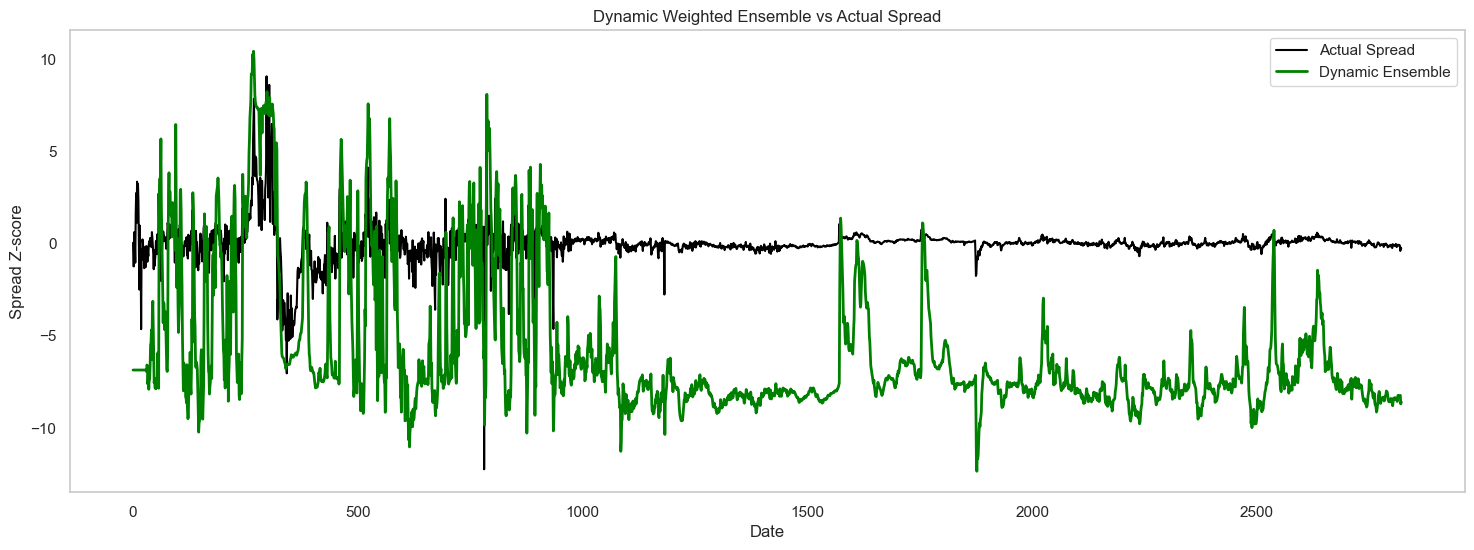

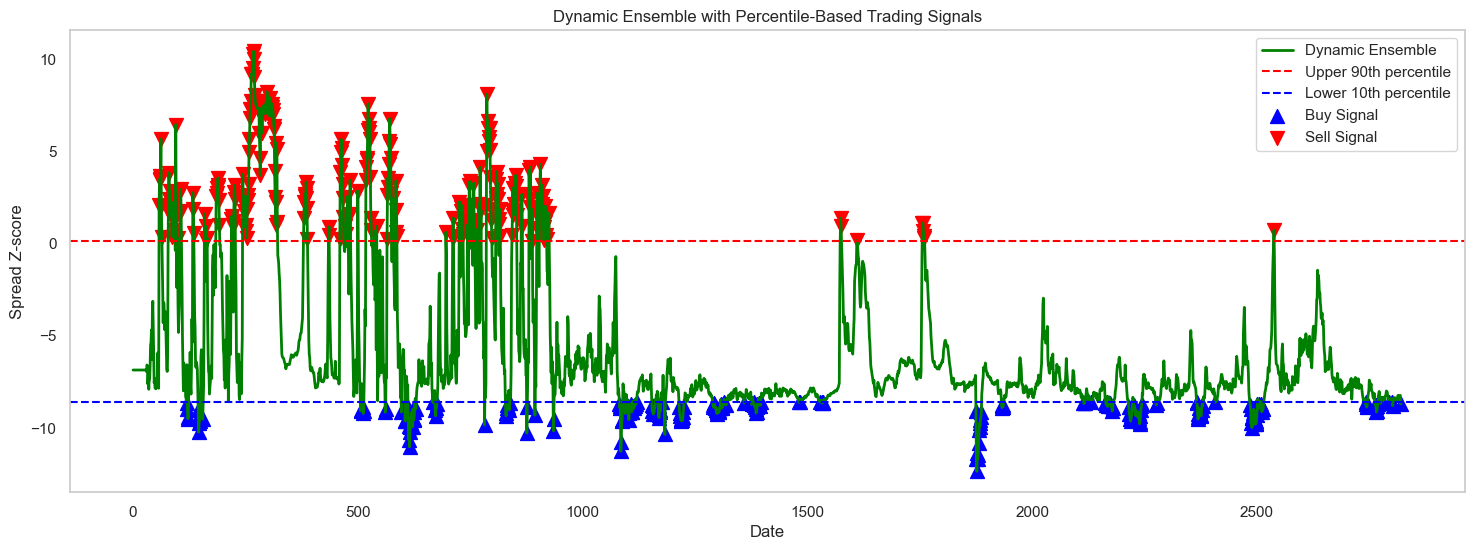

Trading Signals Table:
 Date Trade  Ensemble_Z     Next_Z        PL
   58  Sell    2.109500   3.470939 -1.361439
   59  Sell    3.470939   3.456995  0.013944
   60  Sell    3.456995   3.686503 -0.229508
   61  Sell    3.686503   5.671782 -1.985279
   62  Sell    5.671782   2.029239  3.642544
   63  Sell    2.029239   0.367668  1.661571
   64  Sell    0.367668  -1.032096  1.399764
   79  Sell    2.403634   3.833569 -1.429936
   80  Sell    3.833569   1.660005  2.173565
   81  Sell    1.660005   2.829275 -1.169271
   82  Sell    2.829275   1.976461  0.852814
   83  Sell    1.976461   2.111269 -0.134808
   84  Sell    2.111269   1.483377  0.627892
   85  Sell    1.483377   1.816655 -0.333278
   86  Sell    1.816655   0.359381  1.457274
   87  Sell    0.359381   2.216927 -1.857546
   88  Sell    2.216927   2.117146  0.099781
   89  Sell    2.117146   1.536154  0.580993
   90  Sell    1.536154   0.745071  0.791083
   91  Sell    0.745071   1.959841 -1.214770
   92  Sell    1.959841   1.3242

In [42]:
# ------------------------------
# 1️⃣ Imports
# ------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# ------------------------------
# 2️⃣ Model paths
# ------------------------------
dnn_model_path  = r"C:\Users\katle\OneDrive\Documents\Jupyter Notebooks\My Research Notebook\Makatjane and Shoko (2025)\Pairs trading-Cryptocurrency\Dnn.h5"
lstm_model_path = r"C:\Users\katle\OneDrive\Documents\Jupyter Notebooks\My Research Notebook\Makatjane and Shoko (2025)\Pairs trading-Cryptocurrency\Lstm.h5"

# Load models
dnn_model  = load_model(dnn_model_path, compile=False)
lstm_model = load_model(lstm_model_path, compile=False)

# ------------------------------
# 3️⃣ Dynamic Ensemble Function
# ------------------------------
def build_ensemble(dnn_model, lstm_model, spread_series, window_size=20):
    """
    Compute dynamic weighted ensemble predictions from DNN and LSTM models.
    """
    # 1️⃣ Create sequences
    X_seq = np.array([spread_series[i:i+window_size] for i in range(len(spread_series)-window_size)])
    
    # 2️⃣ Prepare LSTM input
    X_lstm = X_seq.reshape((X_seq.shape[0], window_size, 1))
    
    # 3️⃣ Predict
    y_pred_dnn  = dnn_model.predict(X_seq).flatten()
    y_pred_lstm = lstm_model.predict(X_lstm).flatten()
    
    # 4️⃣ Rolling MSE & dynamic weights
    true_series = pd.Series(spread_series[window_size:])
    dnn_series  = pd.Series(y_pred_dnn)
    lstm_series = pd.Series(y_pred_lstm)
    
    rolling_window = min(30, len(true_series))
    rolling_mse_dnn  = ((dnn_series - true_series) ** 2).rolling(rolling_window).mean()
    rolling_mse_lstm = ((lstm_series - true_series) ** 2).rolling(rolling_window).mean()
    
    weights_dnn  = 1 / rolling_mse_dnn
    weights_lstm = 1 / rolling_mse_lstm
    weights_sum  = weights_dnn + weights_lstm
    weights_dnn  = weights_dnn / weights_sum
    weights_lstm = weights_lstm / weights_sum
    
    # 5️⃣ Ensemble prediction
    ensemble_pred = weights_dnn * dnn_series + weights_lstm * lstm_series
    ensemble_pred = ensemble_pred.fillna(method='bfill')
    ensemble_pred.index = true_series.index
    
    return ensemble_pred

# ------------------------------
# 4️⃣ Compute Ensemble on spread
# ------------------------------
ensemble_pred = build_ensemble(dnn_model, lstm_model, zscore_tv.values, window_size=20)

# ------------------------------
# 5️⃣ Plot Ensemble vs Actual Spread
# ------------------------------
dates = zscore_tv.index[-len(ensemble_pred):]

plt.figure(figsize=(18,6))
plt.plot(zscore_tv.values[-len(ensemble_pred):], label='Actual Spread', color='black')
plt.plot(ensemble_pred, label='Dynamic Ensemble', color='green', linewidth=2)
plt.title('Dynamic Weighted Ensemble vs Actual Spread')
plt.xlabel('Date')
plt.ylabel('Spread Z-score')
plt.legend()
plt.grid(False)
plt.show()

# ------------------------------
# 6️⃣ Percentile-Based Trading Signals
# ------------------------------
upper_percentile = np.percentile(ensemble_pred, 90)
lower_percentile = np.percentile(ensemble_pred, 10)

signals = np.where(ensemble_pred > upper_percentile, -1,  # Sell
                   np.where(ensemble_pred < lower_percentile, 1, 0))  # Buy / Hold

# Plot ensemble with signals
plt.figure(figsize=(18,6))
plt.plot(ensemble_pred, label='Dynamic Ensemble', color='green', linewidth=2)
plt.axhline(upper_percentile, color='red', linestyle='--', label='Upper 90th percentile')
plt.axhline(lower_percentile, color='blue', linestyle='--', label='Lower 10th percentile')
plt.scatter(ensemble_pred.index[signals == 1], ensemble_pred[signals == 1],
            color='blue', marker='^', s=100, label='Buy Signal')
plt.scatter(ensemble_pred.index[signals == -1], ensemble_pred[signals == -1],
            color='red', marker='v', s=100, label='Sell Signal')
plt.title('Dynamic Ensemble with Percentile-Based Trading Signals')
plt.xlabel('Date')
plt.ylabel('Spread Z-score')
plt.legend()
plt.grid(False)
plt.show()

# ------------------------------
# 7️⃣ Trading Signals DataFrame
# ------------------------------
signals_df = pd.DataFrame({
    'Date': ensemble_pred.index,
    'Ensemble_Z': ensemble_pred.values,
    'Signal': signals
})
signals_df = signals_df[signals_df['Signal'] != 0].reset_index(drop=True)

# Next-step profit/loss
ensemble_values = ensemble_pred.values
pl_list = []
next_z_list = []

for idx in signals_df.index:
    actual_idx = ensemble_pred.index.get_loc(signals_df.loc[idx, 'Date'])
    if actual_idx < len(ensemble_values) - 1:
        next_val = ensemble_values[actual_idx + 1]
        curr_val = ensemble_values[actual_idx]
        signal_type = signals_df.loc[idx, 'Signal']
        pl = next_val - curr_val if signal_type == 1 else curr_val - next_val
        pl_list.append(pl)
        next_z_list.append(next_val)
    else:
        pl_list.append(np.nan)
        next_z_list.append(np.nan)

signals_df['Next_Z'] = next_z_list
signals_df['PL'] = pl_list
signals_df['Trade'] = signals_df['Signal'].map({1: 'Buy', -1: 'Sell'})

# ------------------------------
# 8️⃣ Performance Summary
# ------------------------------
winning_trades = (signals_df['PL'] > 0).sum()
losing_trades  = (signals_df['PL'] <= 0).sum()
total_signals  = len(signals_df.dropna())
prob_win  = winning_trades / total_signals * 100
prob_loss = losing_trades / total_signals * 100

# Display table and summary
display_cols = ['Date', 'Trade', 'Ensemble_Z', 'Next_Z', 'PL']
signals_display = signals_df[display_cols]

print("Trading Signals Table:")
print(signals_display.to_string(index=False))
print("\nTrading Performance Summary:")
print(f"Total signals generated: {total_signals}")
print(f"Winning trades: {winning_trades} ({prob_win:.2f}%)")
print(f"Losing trades: {losing_trades} ({prob_loss:.2f}%)")


In [41]:
import os

folder = r"C:\Users\katle\OneDrive\Documents\Jupyter Notebooks\My Research Notebook\Makatjane and Shoko (2025)\Pairs trading-Cryptocurrency"
print(os.listdir(folder))


['Dnn.h5', 'dnn_model.h5', 'Lstm.h5', 'Pairs trading-Cryptocurrency market.ipynb', 'Pairs Trading.ipynb', 'Pairs.csv', 'Pairs.xlsx']


C:\Users\katle\AppData\Local\Temp\ipykernel_18884\4019336421.py:73: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ensemble_pred = ensemble_pred.fillna(method='bfill')


Date: 0 | Ensemble Z-score: -7.6509 | Action: HOLD


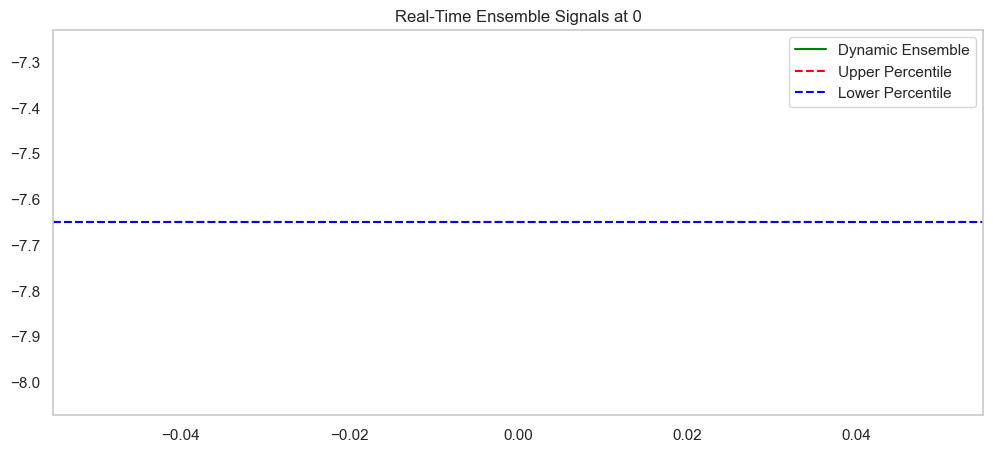

Date: 1 | Ensemble Z-score: -2.9998 | Action: HOLD
Date: 2 | Ensemble Z-score: -2.3675 | Action: HOLD
Date: 3 | Ensemble Z-score: -0.6330 | Action: HOLD
Date: 4 | Ensemble Z-score: 2.0273 | Action: HOLD
Date: 5 | Ensemble Z-score: 2.7667 | Action: HOLD
Date: 6 | Ensemble Z-score: 2.6105 | Action: HOLD
Date: 7 | Ensemble Z-score: 3.8649 | Action: HOLD
Date: 8 | Ensemble Z-score: 4.9153 | Action: HOLD
Date: 9 | Ensemble Z-score: 4.7823 | Action: HOLD
Date: 10 | Ensemble Z-score: 5.5786 | Action: HOLD


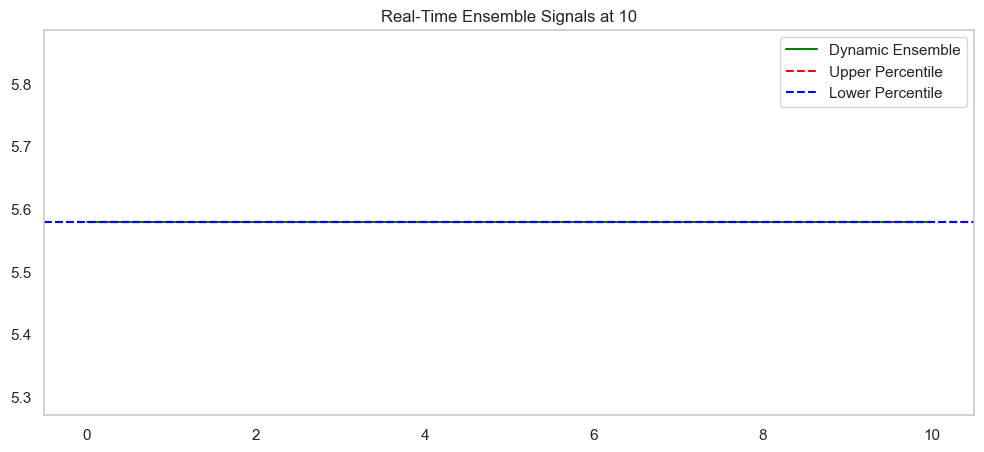

Date: 11 | Ensemble Z-score: 5.6236 | Action: HOLD
Date: 12 | Ensemble Z-score: 5.7768 | Action: HOLD
Date: 13 | Ensemble Z-score: 5.7092 | Action: HOLD
Date: 14 | Ensemble Z-score: 5.2227 | Action: HOLD
Date: 15 | Ensemble Z-score: 2.0527 | Action: HOLD
Date: 16 | Ensemble Z-score: 0.6771 | Action: HOLD
Date: 17 | Ensemble Z-score: -0.1591 | Action: HOLD
Date: 18 | Ensemble Z-score: -1.0654 | Action: HOLD
Date: 19 | Ensemble Z-score: -1.4685 | Action: HOLD
Date: 20 | Ensemble Z-score: -1.4995 | Action: HOLD


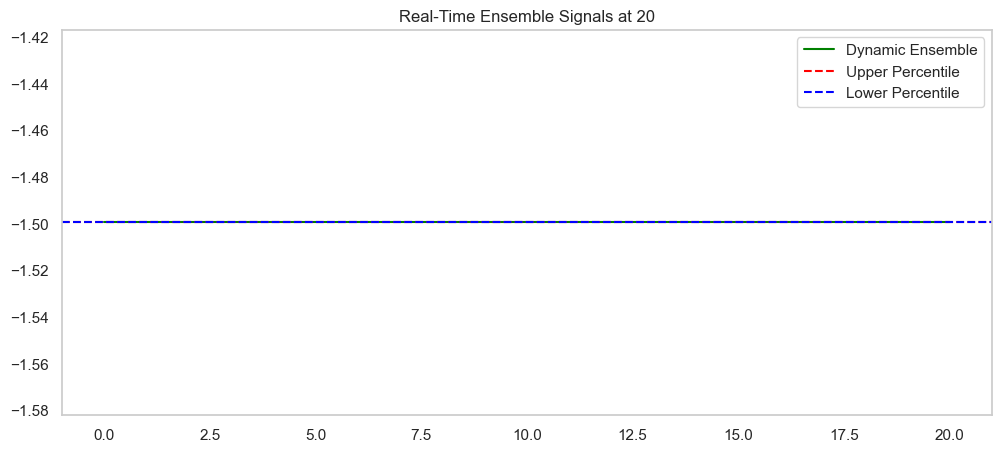

Date: 21 | Ensemble Z-score: -2.3442 | Action: HOLD
Date: 22 | Ensemble Z-score: -3.1850 | Action: HOLD
Date: 23 | Ensemble Z-score: -4.4740 | Action: HOLD
Date: 24 | Ensemble Z-score: -4.3778 | Action: HOLD
Date: 25 | Ensemble Z-score: -4.6110 | Action: HOLD
Date: 26 | Ensemble Z-score: -5.6885 | Action: HOLD
Date: 27 | Ensemble Z-score: -6.1084 | Action: HOLD
Date: 28 | Ensemble Z-score: -6.6662 | Action: HOLD
Date: 29 | Ensemble Z-score: -7.0805 | Action: HOLD
Date: 30 | Ensemble Z-score: -6.5423 | Action: SELL


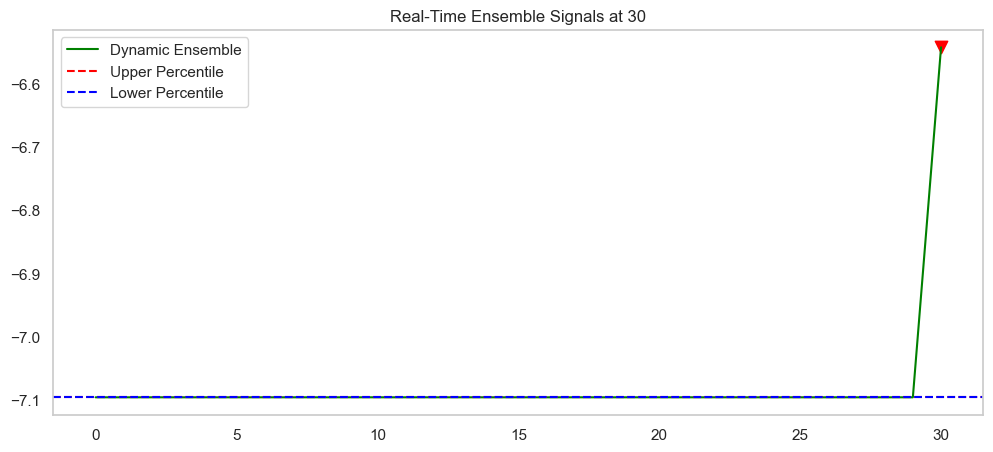

Date: 31 | Ensemble Z-score: -5.6583 | Action: SELL
Date: 32 | Ensemble Z-score: -5.1216 | Action: SELL
Date: 33 | Ensemble Z-score: -6.9931 | Action: SELL
Date: 34 | Ensemble Z-score: -5.5692 | Action: SELL
Date: 35 | Ensemble Z-score: -7.4513 | Action: BUY
Date: 36 | Ensemble Z-score: -6.2822 | Action: SELL
Date: 37 | Ensemble Z-score: -6.3768 | Action: HOLD
Date: 38 | Ensemble Z-score: -4.3837 | Action: SELL
Date: 39 | Ensemble Z-score: -2.8883 | Action: SELL
Date: 40 | Ensemble Z-score: -2.3857 | Action: SELL


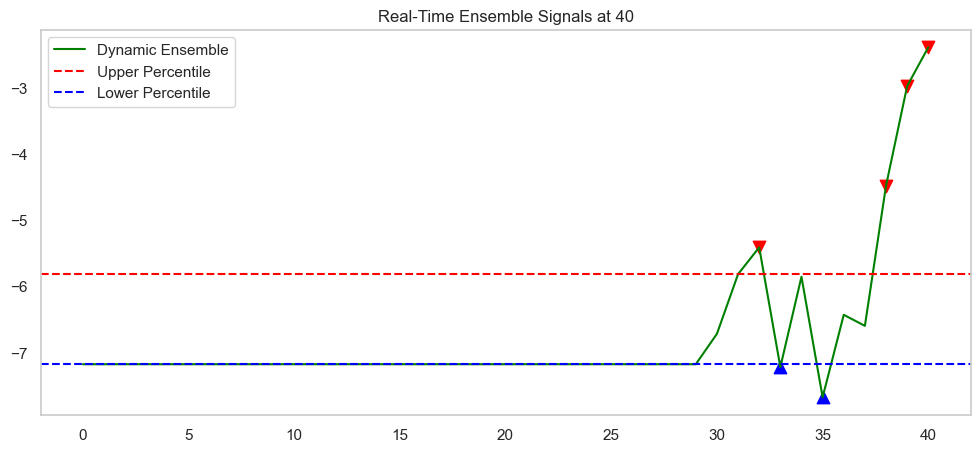

Date: 41 | Ensemble Z-score: -1.3041 | Action: SELL
Date: 42 | Ensemble Z-score: -3.2953 | Action: SELL
Date: 43 | Ensemble Z-score: -1.2071 | Action: SELL
Date: 44 | Ensemble Z-score: -0.8449 | Action: SELL
Date: 45 | Ensemble Z-score: -1.3269 | Action: SELL
Date: 46 | Ensemble Z-score: -3.0952 | Action: HOLD
Date: 47 | Ensemble Z-score: -6.1868 | Action: HOLD
Date: 48 | Ensemble Z-score: -5.9048 | Action: HOLD
Date: 49 | Ensemble Z-score: -7.2396 | Action: BUY
Date: 50 | Ensemble Z-score: -7.3507 | Action: BUY


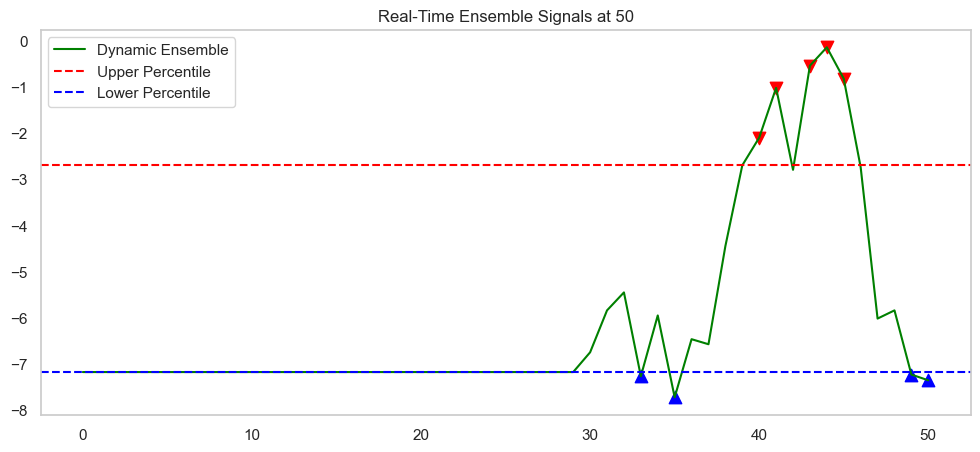

Date: 51 | Ensemble Z-score: -7.5546 | Action: BUY
Date: 52 | Ensemble Z-score: -5.8926 | Action: HOLD
Date: 53 | Ensemble Z-score: -6.9808 | Action: HOLD
Date: 54 | Ensemble Z-score: -5.8938 | Action: HOLD
Date: 55 | Ensemble Z-score: -3.8267 | Action: HOLD
Date: 56 | Ensemble Z-score: -4.8231 | Action: HOLD
Date: 57 | Ensemble Z-score: -6.2688 | Action: HOLD
Date: 58 | Ensemble Z-score: 3.3068 | Action: SELL
Date: 59 | Ensemble Z-score: 2.9301 | Action: SELL
Date: 60 | Ensemble Z-score: 3.7723 | Action: SELL


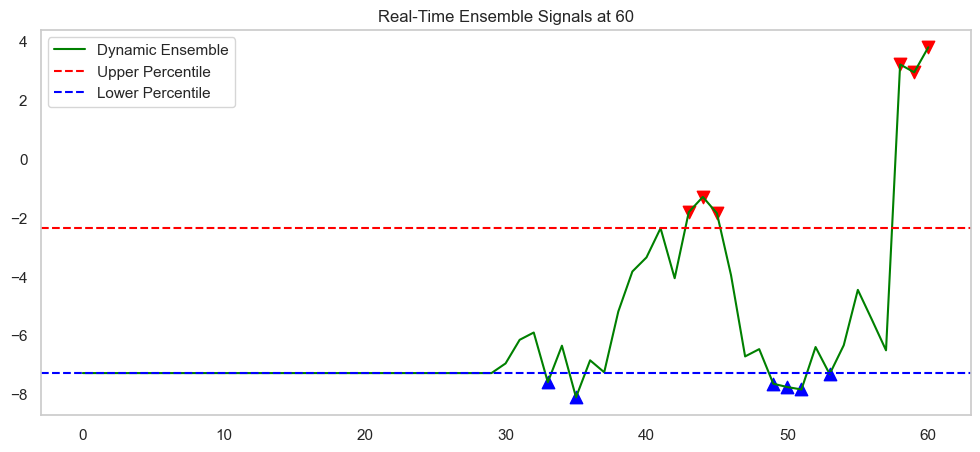

Date: 61 | Ensemble Z-score: 3.4731 | Action: SELL
Date: 62 | Ensemble Z-score: 5.5557 | Action: SELL
Date: 63 | Ensemble Z-score: 0.8327 | Action: SELL
Date: 64 | Ensemble Z-score: -0.6794 | Action: SELL
Date: 65 | Ensemble Z-score: -0.7694 | Action: HOLD
Date: 66 | Ensemble Z-score: -2.4234 | Action: HOLD
Date: 67 | Ensemble Z-score: -2.6784 | Action: HOLD
Date: 68 | Ensemble Z-score: -0.1709 | Action: SELL
Date: 69 | Ensemble Z-score: -0.7748 | Action: HOLD
Date: 70 | Ensemble Z-score: -2.0835 | Action: HOLD


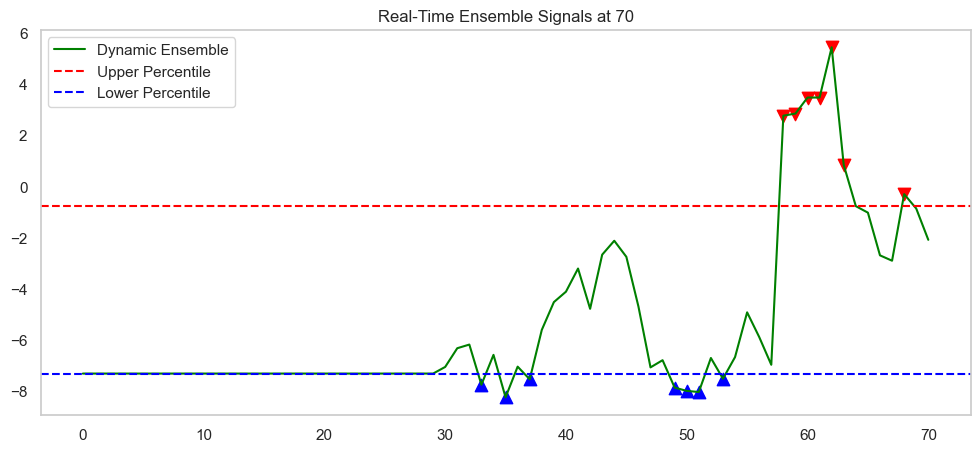

Date: 71 | Ensemble Z-score: -2.3125 | Action: HOLD
Date: 72 | Ensemble Z-score: -0.6961 | Action: SELL
Date: 73 | Ensemble Z-score: -1.7457 | Action: HOLD
Date: 74 | Ensemble Z-score: -3.3255 | Action: HOLD
Date: 75 | Ensemble Z-score: -4.6941 | Action: HOLD
Date: 76 | Ensemble Z-score: -5.3284 | Action: HOLD
Date: 77 | Ensemble Z-score: -3.8256 | Action: HOLD
Date: 78 | Ensemble Z-score: 0.8314 | Action: SELL
Date: 79 | Ensemble Z-score: 1.8253 | Action: SELL
Date: 80 | Ensemble Z-score: 3.2068 | Action: SELL


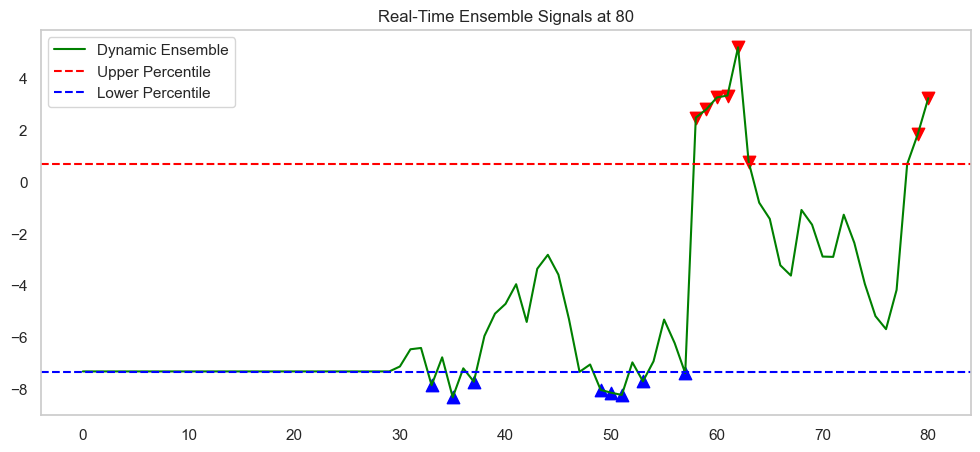

Date: 81 | Ensemble Z-score: 0.6570 | Action: SELL
Date: 82 | Ensemble Z-score: 1.3058 | Action: SELL
Date: 83 | Ensemble Z-score: 0.5709 | Action: HOLD
Date: 84 | Ensemble Z-score: 1.2854 | Action: SELL
Date: 85 | Ensemble Z-score: 0.9911 | Action: HOLD
Date: 86 | Ensemble Z-score: 1.1366 | Action: HOLD
Date: 87 | Ensemble Z-score: -0.2200 | Action: HOLD
Date: 88 | Ensemble Z-score: 1.6237 | Action: SELL
Date: 89 | Ensemble Z-score: 1.5085 | Action: SELL
Date: 90 | Ensemble Z-score: 1.0772 | Action: HOLD


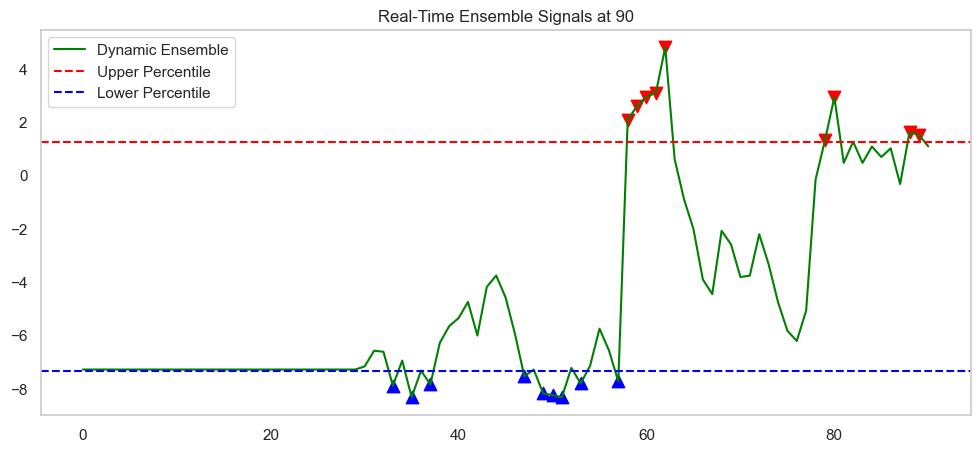

Date: 91 | Ensemble Z-score: 0.2592 | Action: HOLD
Date: 92 | Ensemble Z-score: 0.9397 | Action: HOLD
Date: 93 | Ensemble Z-score: -0.1044 | Action: HOLD
Date: 94 | Ensemble Z-score: -2.1314 | Action: HOLD
Date: 95 | Ensemble Z-score: 3.5986 | Action: SELL
Date: 96 | Ensemble Z-score: 0.0847 | Action: HOLD
Date: 97 | Ensemble Z-score: -3.5421 | Action: HOLD
Date: 98 | Ensemble Z-score: -1.7507 | Action: HOLD
Date: 99 | Ensemble Z-score: -1.3288 | Action: HOLD
Date: 100 | Ensemble Z-score: -3.7621 | Action: HOLD


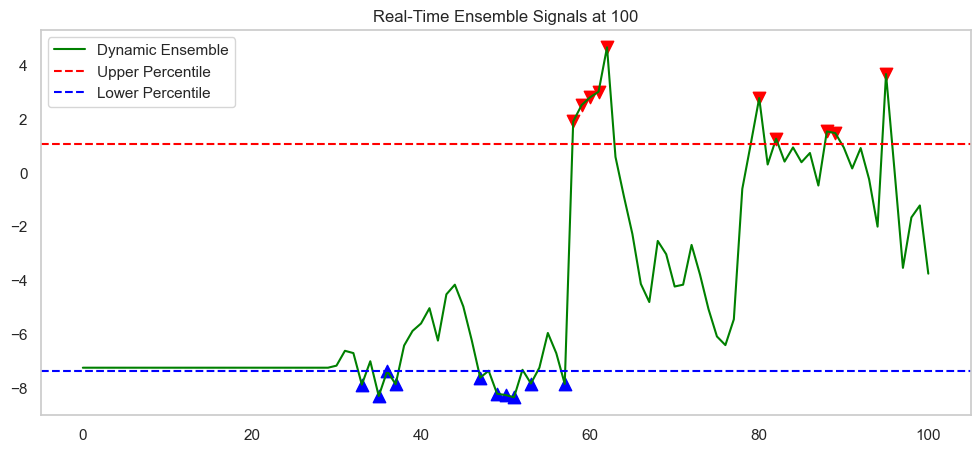

Date: 101 | Ensemble Z-score: -5.8315 | Action: HOLD
Date: 102 | Ensemble Z-score: -3.7823 | Action: HOLD
Date: 103 | Ensemble Z-score: -3.7439 | Action: HOLD
Date: 104 | Ensemble Z-score: -3.2958 | Action: HOLD
Date: 105 | Ensemble Z-score: 1.0293 | Action: SELL
Date: 106 | Ensemble Z-score: 0.7462 | Action: HOLD
Date: 107 | Ensemble Z-score: 0.1810 | Action: HOLD
Date: 108 | Ensemble Z-score: -2.5047 | Action: HOLD
Date: 109 | Ensemble Z-score: -3.0827 | Action: HOLD
Date: 110 | Ensemble Z-score: -5.7313 | Action: HOLD


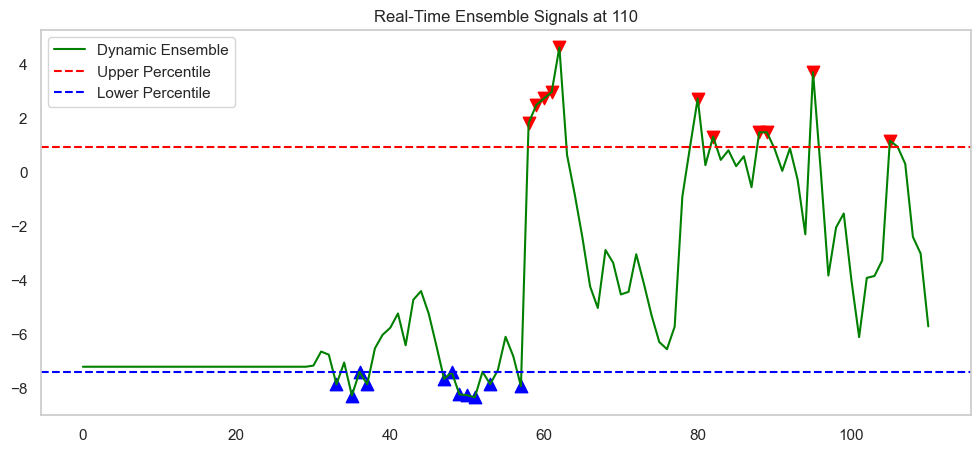

Date: 111 | Ensemble Z-score: -6.4843 | Action: HOLD
Date: 112 | Ensemble Z-score: -7.6674 | Action: BUY
Date: 113 | Ensemble Z-score: -6.0412 | Action: HOLD
Date: 114 | Ensemble Z-score: -7.5576 | Action: BUY
Date: 115 | Ensemble Z-score: -7.4524 | Action: BUY
Date: 116 | Ensemble Z-score: -6.4710 | Action: HOLD
Date: 117 | Ensemble Z-score: -7.9599 | Action: BUY
Date: 118 | Ensemble Z-score: -7.8525 | Action: BUY
Date: 119 | Ensemble Z-score: -7.9777 | Action: BUY
Date: 120 | Ensemble Z-score: -6.3242 | Action: HOLD


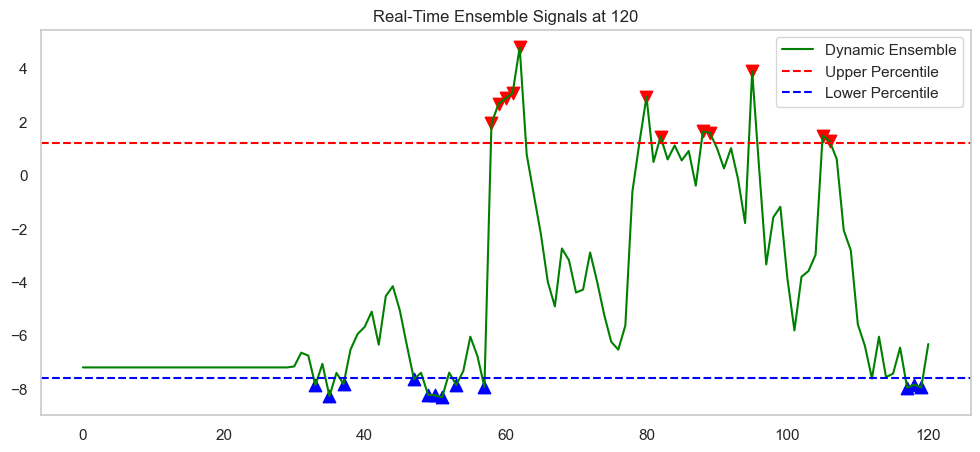

Date: 121 | Ensemble Z-score: -8.4515 | Action: BUY
Date: 122 | Ensemble Z-score: -9.0978 | Action: BUY
Date: 123 | Ensemble Z-score: -9.3746 | Action: BUY
Date: 124 | Ensemble Z-score: -7.2144 | Action: HOLD
Date: 125 | Ensemble Z-score: -6.9728 | Action: HOLD
Date: 126 | Ensemble Z-score: -6.9761 | Action: HOLD
Date: 127 | Ensemble Z-score: -5.3802 | Action: HOLD
Date: 128 | Ensemble Z-score: -7.5982 | Action: HOLD
Date: 129 | Ensemble Z-score: -7.6834 | Action: HOLD
Date: 130 | Ensemble Z-score: -6.4383 | Action: HOLD


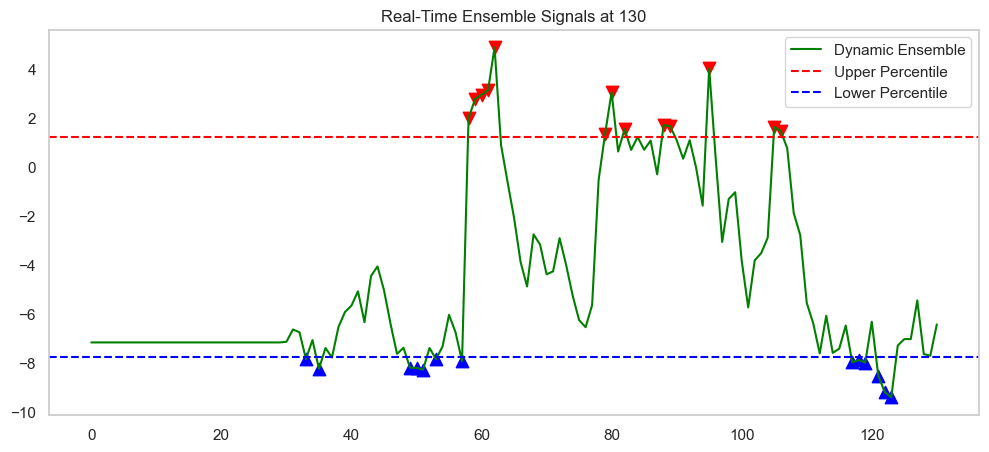

Date: 131 | Ensemble Z-score: -4.2470 | Action: HOLD
Date: 132 | Ensemble Z-score: -5.1460 | Action: HOLD
Date: 133 | Ensemble Z-score: 2.1107 | Action: SELL
Date: 134 | Ensemble Z-score: 0.6281 | Action: HOLD
Date: 135 | Ensemble Z-score: -0.3494 | Action: HOLD
Date: 136 | Ensemble Z-score: -2.4475 | Action: HOLD
Date: 137 | Ensemble Z-score: -4.5033 | Action: HOLD
Date: 138 | Ensemble Z-score: -4.6244 | Action: HOLD
Date: 139 | Ensemble Z-score: -6.2508 | Action: HOLD
Date: 140 | Ensemble Z-score: -6.4899 | Action: HOLD


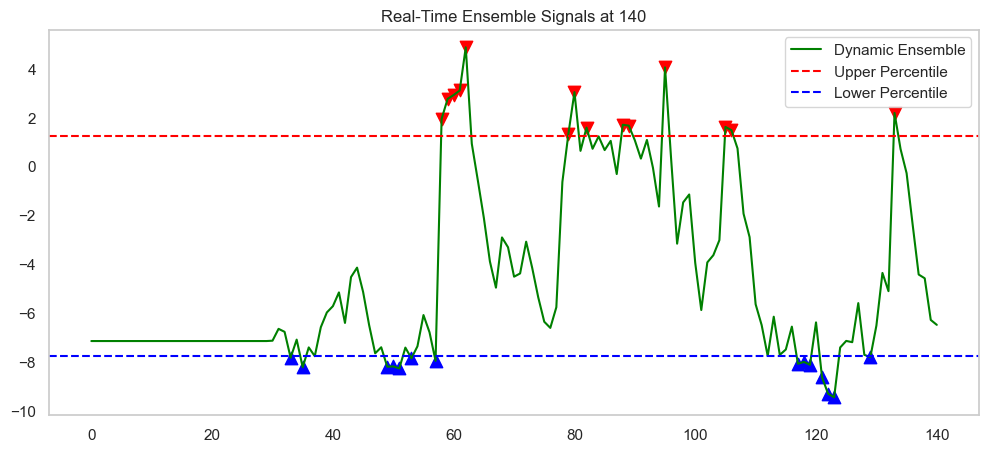

Date: 141 | Ensemble Z-score: -6.0410 | Action: HOLD
Date: 142 | Ensemble Z-score: -6.2115 | Action: HOLD
Date: 143 | Ensemble Z-score: -6.2953 | Action: HOLD
Date: 144 | Ensemble Z-score: -7.4909 | Action: HOLD
Date: 145 | Ensemble Z-score: -8.6790 | Action: BUY
Date: 146 | Ensemble Z-score: -10.3193 | Action: BUY
Date: 147 | Ensemble Z-score: -9.8859 | Action: BUY
Date: 148 | Ensemble Z-score: -9.8556 | Action: BUY
Date: 149 | Ensemble Z-score: -9.5101 | Action: BUY
Date: 150 | Ensemble Z-score: -9.2732 | Action: BUY


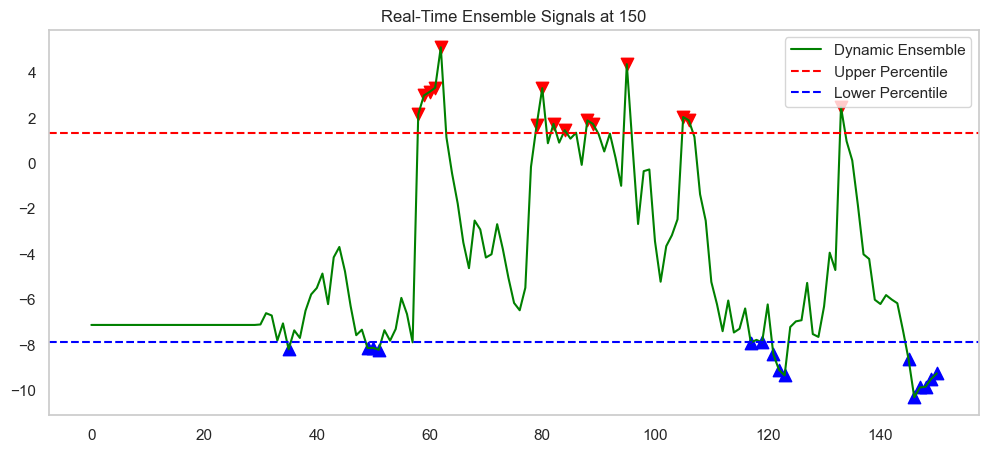

Date: 151 | Ensemble Z-score: -5.9518 | Action: HOLD
Date: 152 | Ensemble Z-score: -5.8822 | Action: HOLD
Date: 153 | Ensemble Z-score: -7.2324 | Action: HOLD
Date: 154 | Ensemble Z-score: -7.6082 | Action: HOLD
Date: 155 | Ensemble Z-score: -9.6864 | Action: BUY
Date: 156 | Ensemble Z-score: -8.4868 | Action: BUY
Date: 157 | Ensemble Z-score: -7.4466 | Action: HOLD
Date: 158 | Ensemble Z-score: -3.9797 | Action: HOLD
Date: 159 | Ensemble Z-score: 1.0942 | Action: HOLD
Date: 160 | Ensemble Z-score: -2.2521 | Action: HOLD


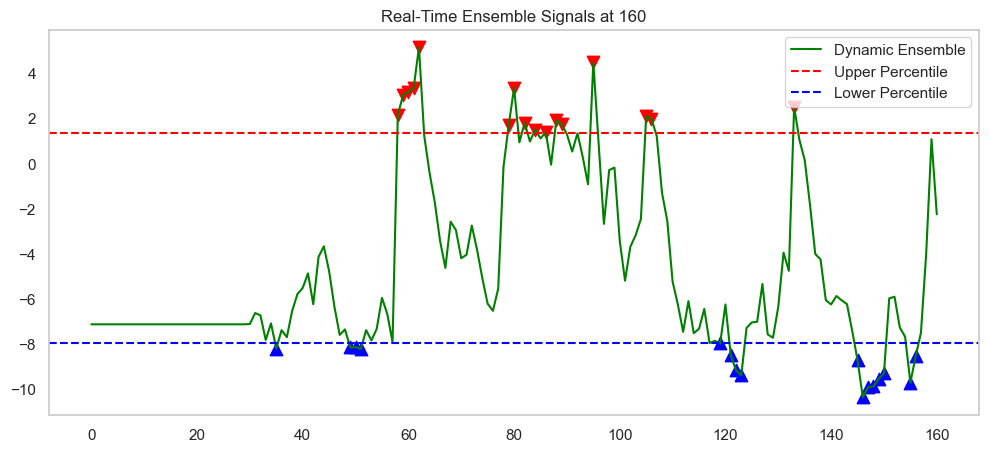

Date: 161 | Ensemble Z-score: -1.0600 | Action: HOLD
Date: 162 | Ensemble Z-score: -0.6893 | Action: HOLD
Date: 163 | Ensemble Z-score: -0.1850 | Action: HOLD
Date: 164 | Ensemble Z-score: -1.3408 | Action: HOLD
Date: 165 | Ensemble Z-score: -0.5591 | Action: HOLD
Date: 166 | Ensemble Z-score: -4.9561 | Action: HOLD
Date: 167 | Ensemble Z-score: -6.1174 | Action: HOLD
Date: 168 | Ensemble Z-score: -7.0955 | Action: HOLD
Date: 169 | Ensemble Z-score: -7.3314 | Action: HOLD
Date: 170 | Ensemble Z-score: -8.8351 | Action: BUY


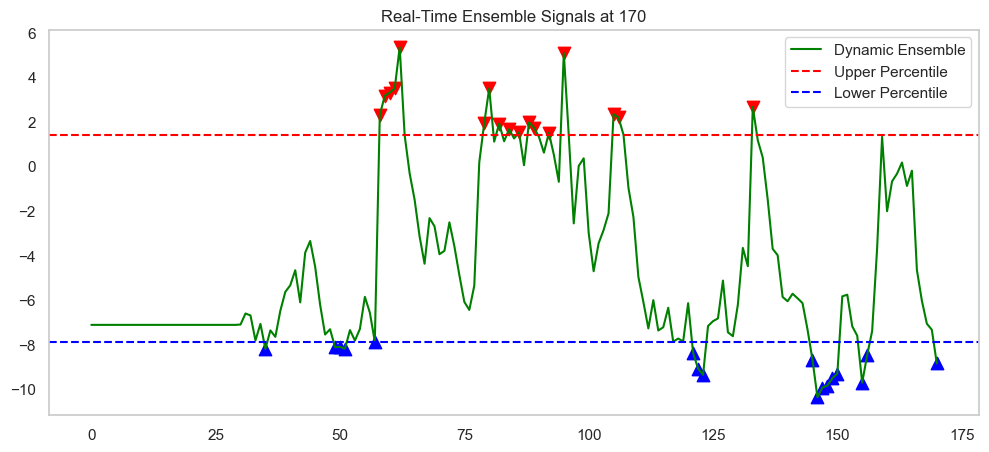

Date: 171 | Ensemble Z-score: -8.0816 | Action: BUY
Date: 172 | Ensemble Z-score: -7.5044 | Action: HOLD
Date: 173 | Ensemble Z-score: -6.5054 | Action: HOLD
Date: 174 | Ensemble Z-score: -6.2661 | Action: HOLD
Date: 175 | Ensemble Z-score: -7.0636 | Action: HOLD
Date: 176 | Ensemble Z-score: -4.1560 | Action: HOLD
Date: 177 | Ensemble Z-score: -1.7944 | Action: HOLD
Date: 178 | Ensemble Z-score: -0.8362 | Action: HOLD
Date: 179 | Ensemble Z-score: -2.8641 | Action: HOLD
Date: 180 | Ensemble Z-score: -0.4326 | Action: HOLD


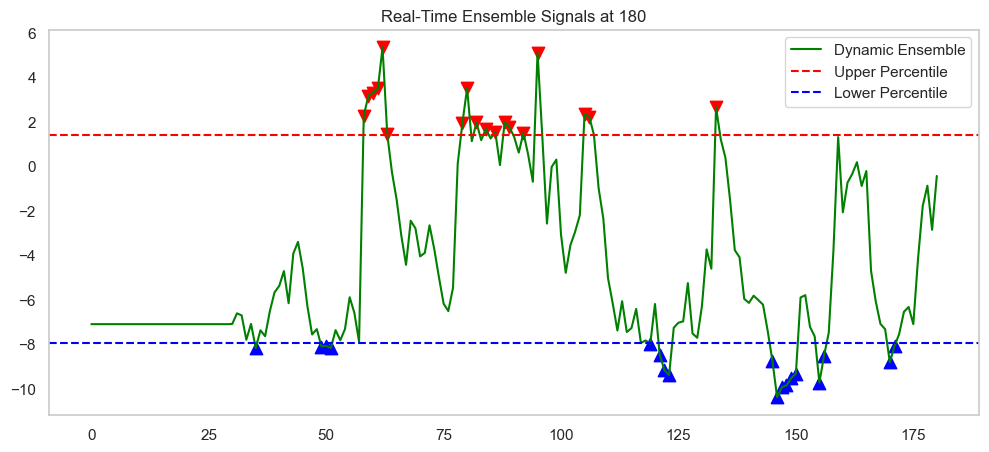

Date: 181 | Ensemble Z-score: -1.3830 | Action: HOLD
Date: 182 | Ensemble Z-score: -1.4872 | Action: HOLD
Date: 183 | Ensemble Z-score: -2.5020 | Action: HOLD
Date: 184 | Ensemble Z-score: -0.7701 | Action: HOLD
Date: 185 | Ensemble Z-score: 1.8942 | Action: SELL
Date: 186 | Ensemble Z-score: 2.0658 | Action: SELL
Date: 187 | Ensemble Z-score: 2.2660 | Action: SELL
Date: 188 | Ensemble Z-score: 2.2263 | Action: SELL
Date: 189 | Ensemble Z-score: 2.5969 | Action: SELL
Date: 190 | Ensemble Z-score: 2.3601 | Action: SELL


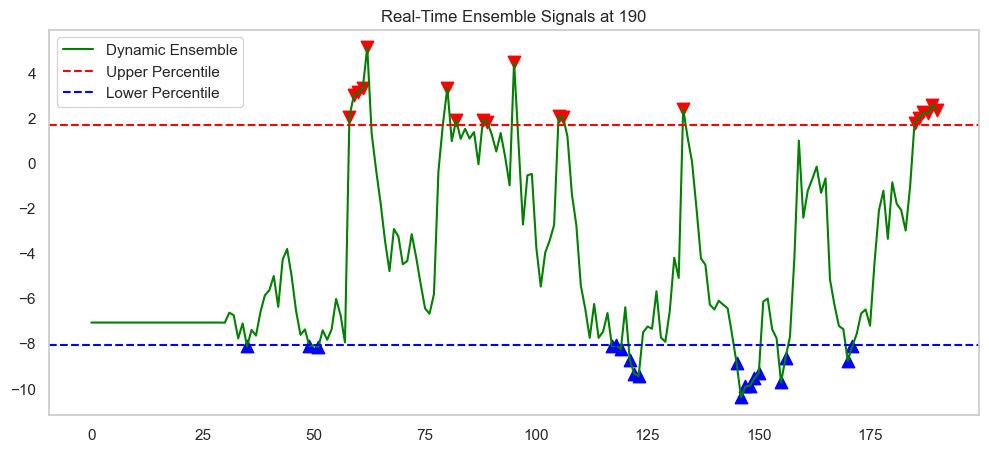

Date: 191 | Ensemble Z-score: 1.5821 | Action: HOLD
Date: 192 | Ensemble Z-score: 0.4781 | Action: HOLD
Date: 193 | Ensemble Z-score: -0.4956 | Action: HOLD
Date: 194 | Ensemble Z-score: -1.0334 | Action: HOLD
Date: 195 | Ensemble Z-score: -1.8378 | Action: HOLD
Date: 196 | Ensemble Z-score: -1.6109 | Action: HOLD
Date: 197 | Ensemble Z-score: -1.7637 | Action: HOLD
Date: 198 | Ensemble Z-score: -2.7457 | Action: HOLD
Date: 199 | Ensemble Z-score: -4.2257 | Action: HOLD
Date: 200 | Ensemble Z-score: -4.9504 | Action: HOLD


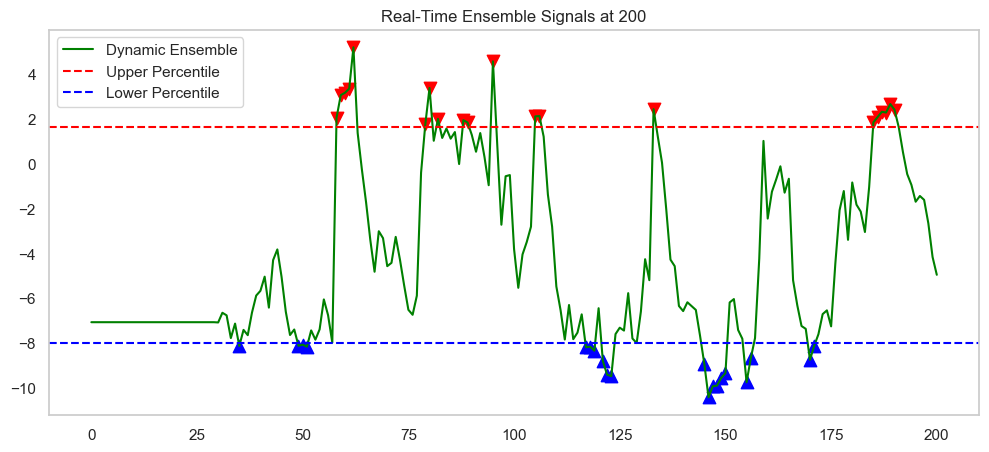

Date: 201 | Ensemble Z-score: -6.0716 | Action: HOLD
Date: 202 | Ensemble Z-score: -6.1739 | Action: HOLD
Date: 203 | Ensemble Z-score: -7.8269 | Action: HOLD
Date: 204 | Ensemble Z-score: -7.1342 | Action: HOLD
Date: 205 | Ensemble Z-score: -8.2161 | Action: BUY
Date: 206 | Ensemble Z-score: -5.2248 | Action: HOLD
Date: 207 | Ensemble Z-score: -5.6514 | Action: HOLD
Date: 208 | Ensemble Z-score: -5.6333 | Action: HOLD
Date: 209 | Ensemble Z-score: -2.3888 | Action: HOLD
Date: 210 | Ensemble Z-score: -4.7245 | Action: HOLD


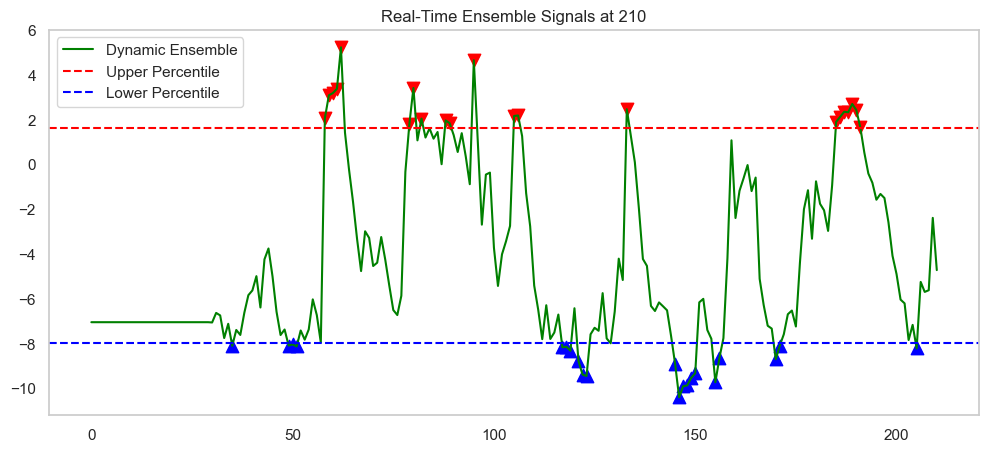

Date: 211 | Ensemble Z-score: -4.2358 | Action: HOLD
Date: 212 | Ensemble Z-score: -8.5415 | Action: BUY
Date: 213 | Ensemble Z-score: -6.7356 | Action: HOLD
Date: 214 | Ensemble Z-score: -5.9446 | Action: HOLD
Date: 215 | Ensemble Z-score: -2.0525 | Action: HOLD
Date: 216 | Ensemble Z-score: -4.1862 | Action: HOLD
Date: 217 | Ensemble Z-score: -5.8490 | Action: HOLD
Date: 218 | Ensemble Z-score: -2.9388 | Action: HOLD
Date: 219 | Ensemble Z-score: 0.3849 | Action: HOLD
Date: 220 | Ensemble Z-score: 0.7284 | Action: HOLD


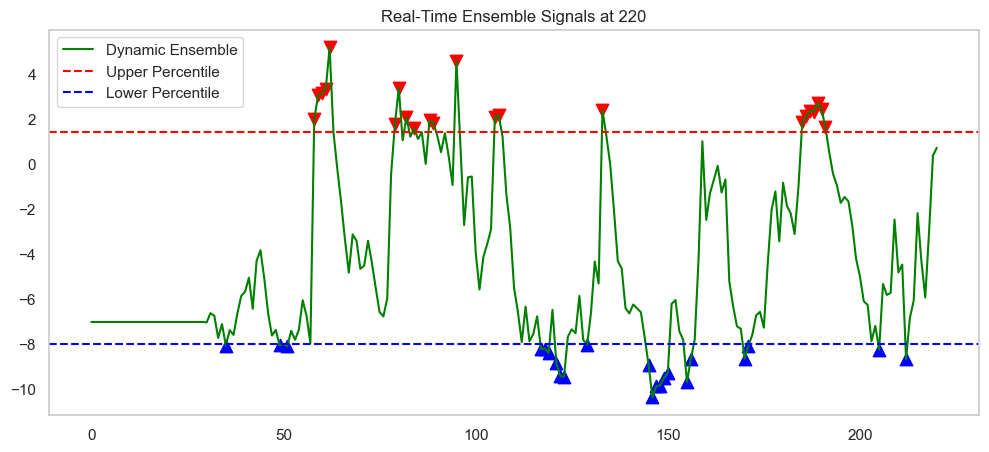

Date: 221 | Ensemble Z-score: -1.3045 | Action: HOLD
Date: 222 | Ensemble Z-score: 0.0895 | Action: HOLD
Date: 223 | Ensemble Z-score: -4.7369 | Action: HOLD
Date: 224 | Ensemble Z-score: 0.1206 | Action: HOLD
Date: 225 | Ensemble Z-score: 2.2797 | Action: SELL
Date: 226 | Ensemble Z-score: 2.6762 | Action: SELL
Date: 227 | Ensemble Z-score: 1.8533 | Action: SELL
Date: 228 | Ensemble Z-score: -2.0775 | Action: HOLD
Date: 229 | Ensemble Z-score: -2.8787 | Action: HOLD
Date: 230 | Ensemble Z-score: -6.7983 | Action: HOLD


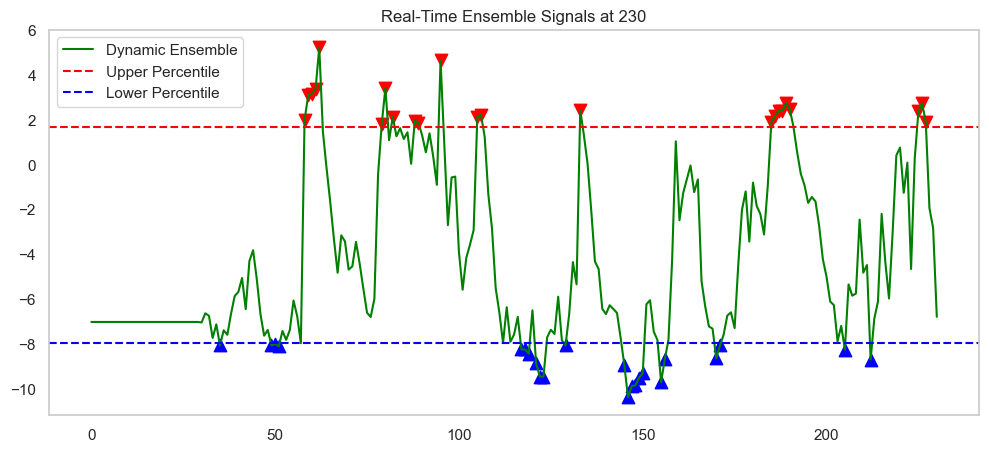

Date: 231 | Ensemble Z-score: -7.2579 | Action: HOLD
Date: 232 | Ensemble Z-score: -7.8653 | Action: HOLD
Date: 233 | Ensemble Z-score: -6.4656 | Action: HOLD
Date: 234 | Ensemble Z-score: -7.7067 | Action: HOLD
Date: 235 | Ensemble Z-score: -5.9548 | Action: HOLD
Date: 236 | Ensemble Z-score: -8.3467 | Action: BUY
Date: 237 | Ensemble Z-score: -8.6145 | Action: BUY
Date: 238 | Ensemble Z-score: -7.4725 | Action: HOLD
Date: 239 | Ensemble Z-score: -6.4406 | Action: HOLD
Date: 240 | Ensemble Z-score: -8.0904 | Action: BUY


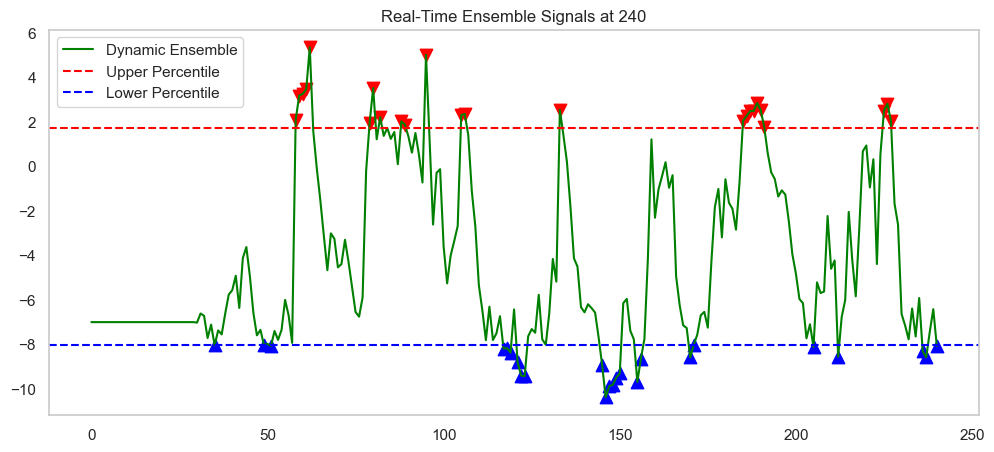

Date: 241 | Ensemble Z-score: -8.1308 | Action: BUY
Date: 242 | Ensemble Z-score: -6.2901 | Action: HOLD
Date: 243 | Ensemble Z-score: -5.1261 | Action: HOLD
Date: 244 | Ensemble Z-score: 3.5382 | Action: SELL
Date: 245 | Ensemble Z-score: 1.7183 | Action: HOLD
Date: 246 | Ensemble Z-score: 1.1843 | Action: HOLD
Date: 247 | Ensemble Z-score: 1.5127 | Action: HOLD
Date: 248 | Ensemble Z-score: 1.8582 | Action: SELL
Date: 249 | Ensemble Z-score: 0.1626 | Action: HOLD
Date: 250 | Ensemble Z-score: 2.1714 | Action: SELL


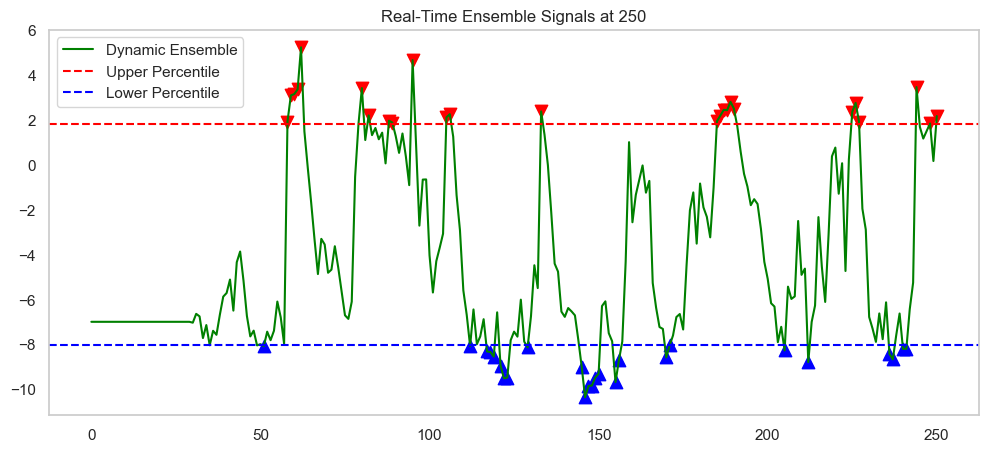

Date: 251 | Ensemble Z-score: 0.3723 | Action: HOLD
Date: 252 | Ensemble Z-score: -0.0419 | Action: HOLD
Date: 253 | Ensemble Z-score: -0.4121 | Action: HOLD
Date: 254 | Ensemble Z-score: 1.5688 | Action: HOLD
Date: 255 | Ensemble Z-score: 2.1009 | Action: SELL
Date: 256 | Ensemble Z-score: 2.1762 | Action: SELL
Date: 257 | Ensemble Z-score: 2.8166 | Action: SELL
Date: 258 | Ensemble Z-score: 4.1793 | Action: SELL
Date: 259 | Ensemble Z-score: 4.5714 | Action: SELL
Date: 260 | Ensemble Z-score: 5.5248 | Action: SELL


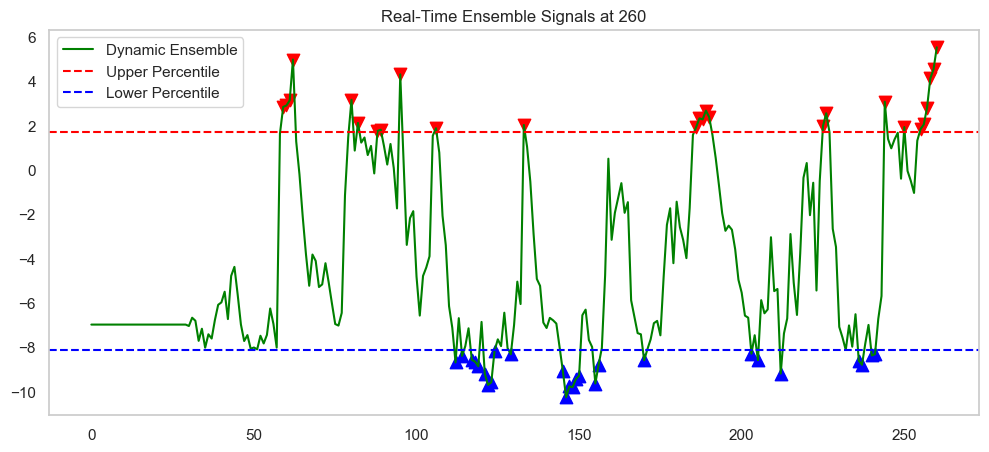

Date: 261 | Ensemble Z-score: 6.0934 | Action: SELL
Date: 262 | Ensemble Z-score: 6.3478 | Action: SELL
Date: 263 | Ensemble Z-score: 7.5724 | Action: SELL
Date: 264 | Ensemble Z-score: 8.2652 | Action: SELL
Date: 265 | Ensemble Z-score: 8.1725 | Action: SELL
Date: 266 | Ensemble Z-score: 9.6256 | Action: SELL
Date: 267 | Ensemble Z-score: 8.9035 | Action: SELL
Date: 268 | Ensemble Z-score: 10.6703 | Action: SELL
Date: 269 | Ensemble Z-score: 10.9457 | Action: SELL
Date: 270 | Ensemble Z-score: 9.9217 | Action: SELL


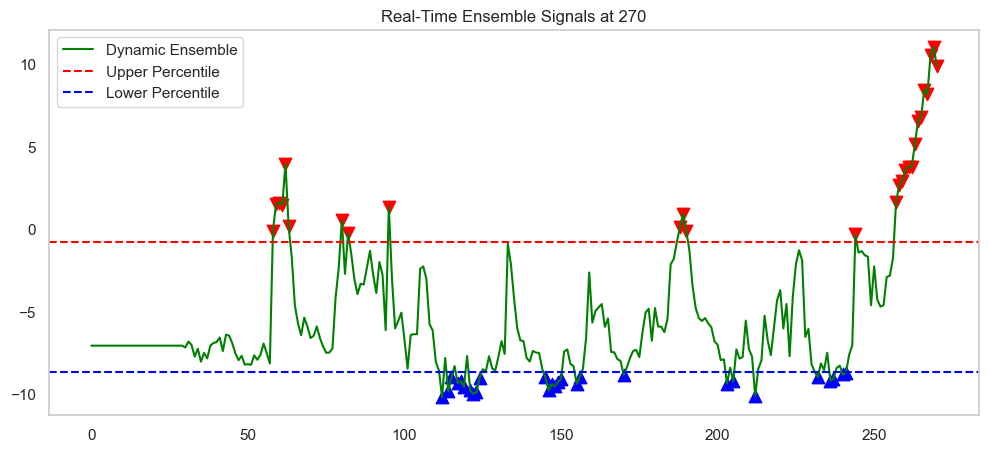

Date: 271 | Ensemble Z-score: 8.8587 | Action: SELL
Date: 272 | Ensemble Z-score: 8.4210 | Action: SELL
Date: 273 | Ensemble Z-score: 8.3221 | Action: SELL
Date: 274 | Ensemble Z-score: 8.1530 | Action: SELL
Date: 275 | Ensemble Z-score: 8.1507 | Action: SELL
Date: 276 | Ensemble Z-score: 8.4298 | Action: SELL
Date: 277 | Ensemble Z-score: 7.9814 | Action: SELL
Date: 278 | Ensemble Z-score: 7.6336 | Action: SELL
Date: 279 | Ensemble Z-score: 7.5236 | Action: SELL
Date: 280 | Ensemble Z-score: 6.8266 | Action: SELL


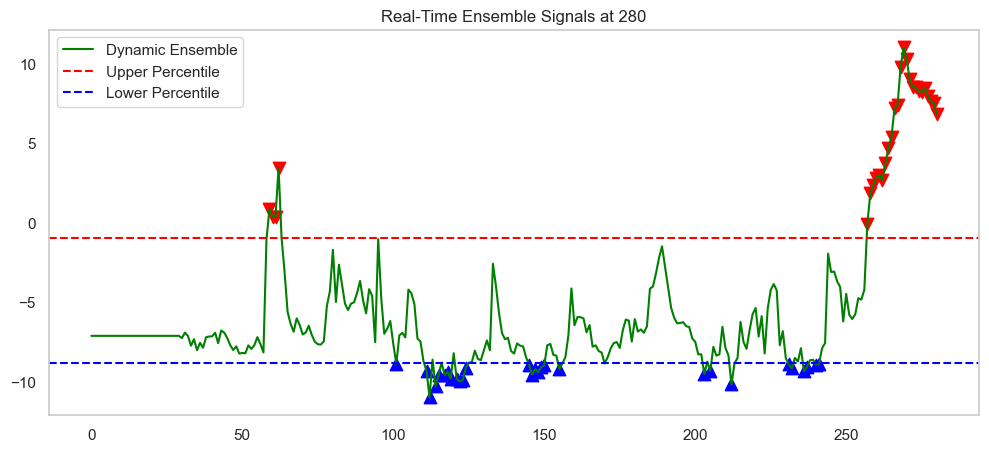

Date: 281 | Ensemble Z-score: 4.0043 | Action: SELL
Date: 282 | Ensemble Z-score: 1.6700 | Action: SELL
Date: 283 | Ensemble Z-score: 0.5830 | Action: SELL
Date: 284 | Ensemble Z-score: 5.1247 | Action: SELL
Date: 285 | Ensemble Z-score: 6.4487 | Action: SELL
Date: 286 | Ensemble Z-score: 6.6483 | Action: SELL
Date: 287 | Ensemble Z-score: 2.8403 | Action: SELL
Date: 288 | Ensemble Z-score: 6.4675 | Action: SELL
Date: 289 | Ensemble Z-score: 7.0438 | Action: SELL
Date: 290 | Ensemble Z-score: 7.5865 | Action: SELL


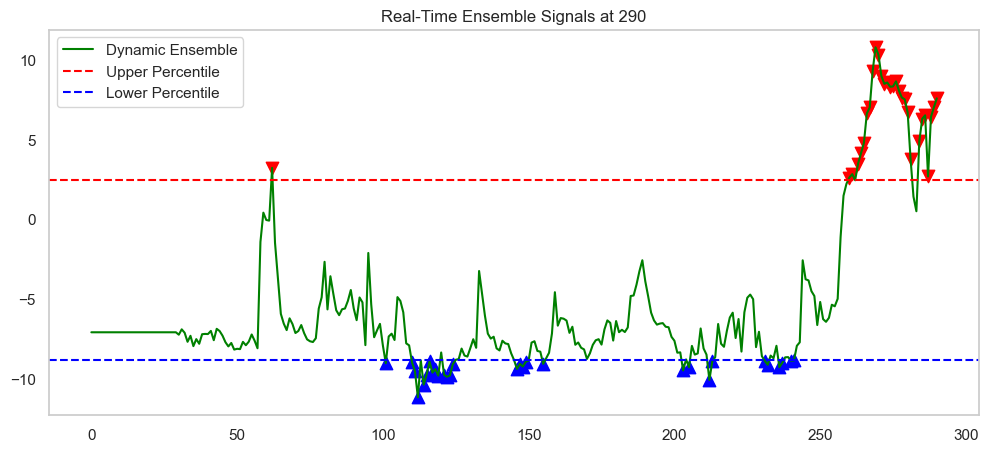

Date: 291 | Ensemble Z-score: 7.7025 | Action: SELL
Date: 292 | Ensemble Z-score: 7.6741 | Action: SELL
Date: 293 | Ensemble Z-score: 7.2124 | Action: SELL
Date: 294 | Ensemble Z-score: 5.5073 | Action: SELL
Date: 295 | Ensemble Z-score: 7.1088 | Action: SELL
Date: 296 | Ensemble Z-score: 8.3741 | Action: SELL
Date: 297 | Ensemble Z-score: 8.8961 | Action: SELL
Date: 298 | Ensemble Z-score: 10.4451 | Action: SELL
Date: 299 | Ensemble Z-score: 9.3084 | Action: SELL
Date: 300 | Ensemble Z-score: 8.7198 | Action: SELL


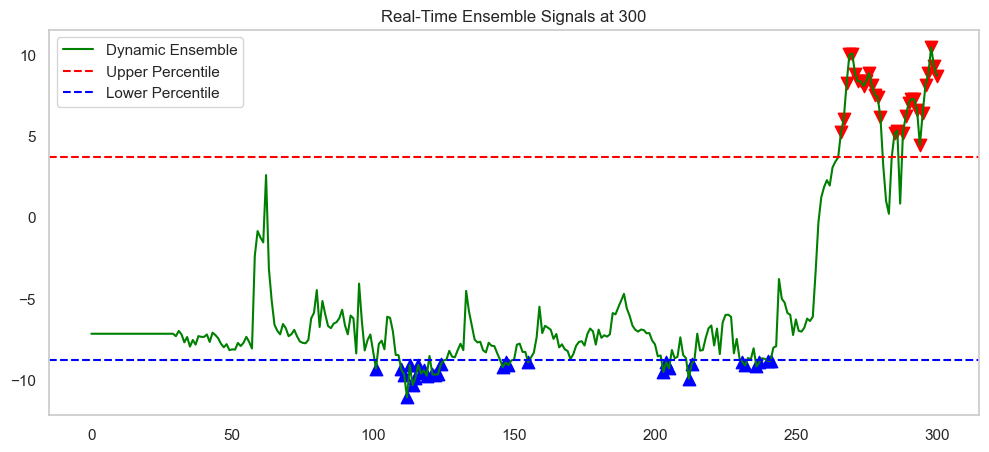

Date: 301 | Ensemble Z-score: 8.6528 | Action: SELL
Date: 302 | Ensemble Z-score: 7.9297 | Action: SELL
Date: 303 | Ensemble Z-score: 8.7977 | Action: SELL
Date: 304 | Ensemble Z-score: 9.9217 | Action: SELL
Date: 305 | Ensemble Z-score: 7.9967 | Action: SELL
Date: 306 | Ensemble Z-score: 7.1990 | Action: SELL
Date: 307 | Ensemble Z-score: 8.1871 | Action: SELL
Date: 308 | Ensemble Z-score: 7.8782 | Action: SELL
Date: 309 | Ensemble Z-score: 8.4096 | Action: SELL
Date: 310 | Ensemble Z-score: 9.2604 | Action: SELL


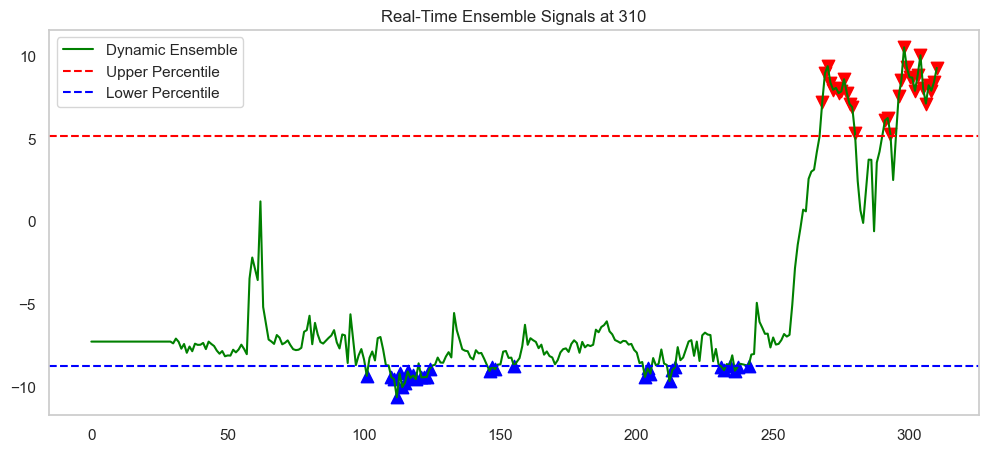

Date: 311 | Ensemble Z-score: 8.4566 | Action: SELL
Date: 312 | Ensemble Z-score: 6.6535 | Action: SELL
Date: 313 | Ensemble Z-score: 4.5201 | Action: HOLD
Date: 314 | Ensemble Z-score: 3.3616 | Action: HOLD
Date: 315 | Ensemble Z-score: 0.7636 | Action: HOLD
Date: 316 | Ensemble Z-score: 0.3573 | Action: HOLD
Date: 317 | Ensemble Z-score: -0.3052 | Action: HOLD
Date: 318 | Ensemble Z-score: -0.9055 | Action: HOLD
Date: 319 | Ensemble Z-score: -0.1581 | Action: HOLD
Date: 320 | Ensemble Z-score: -1.1356 | Action: HOLD


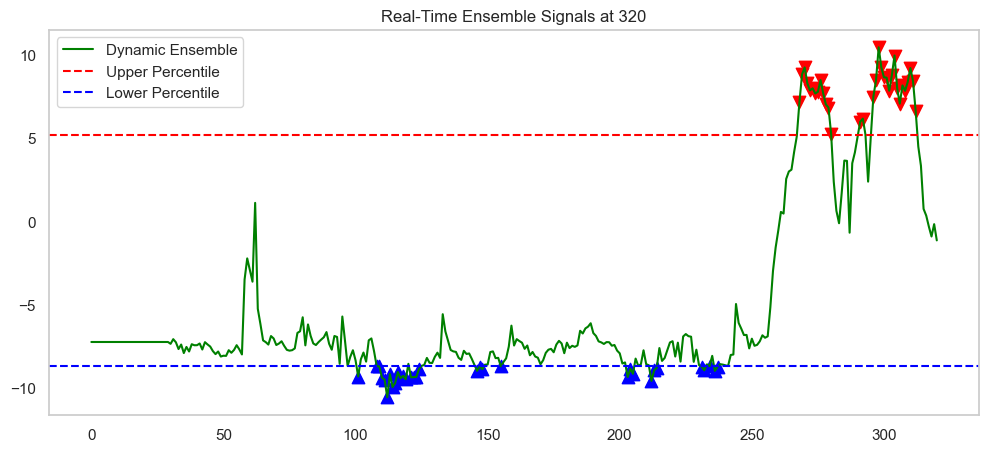

Date: 321 | Ensemble Z-score: -2.2614 | Action: HOLD
Date: 322 | Ensemble Z-score: -2.8454 | Action: HOLD
Date: 323 | Ensemble Z-score: -2.9510 | Action: HOLD
Date: 324 | Ensemble Z-score: -3.3806 | Action: HOLD
Date: 325 | Ensemble Z-score: -4.6391 | Action: HOLD
Date: 326 | Ensemble Z-score: -5.5159 | Action: HOLD
Date: 327 | Ensemble Z-score: -5.9272 | Action: HOLD
Date: 328 | Ensemble Z-score: -6.4202 | Action: HOLD
Date: 329 | Ensemble Z-score: -6.6359 | Action: HOLD
Date: 330 | Ensemble Z-score: -6.8802 | Action: HOLD


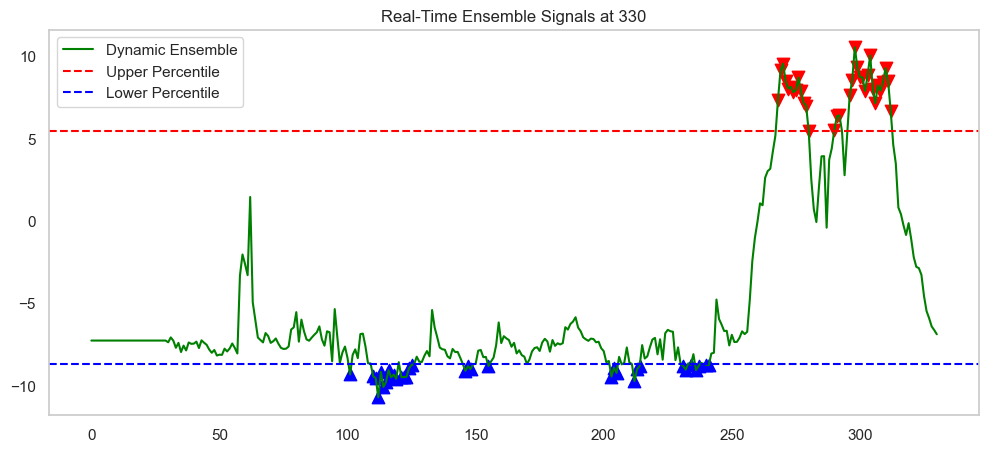

Date: 331 | Ensemble Z-score: -7.4395 | Action: HOLD
Date: 332 | Ensemble Z-score: -7.6455 | Action: HOLD
Date: 333 | Ensemble Z-score: -7.9393 | Action: HOLD
Date: 334 | Ensemble Z-score: -7.8275 | Action: HOLD
Date: 335 | Ensemble Z-score: -7.6124 | Action: HOLD
Date: 336 | Ensemble Z-score: -7.5804 | Action: HOLD
Date: 337 | Ensemble Z-score: -7.5583 | Action: HOLD
Date: 338 | Ensemble Z-score: -7.5439 | Action: HOLD
Date: 339 | Ensemble Z-score: -7.6089 | Action: HOLD
Date: 340 | Ensemble Z-score: -7.6248 | Action: HOLD


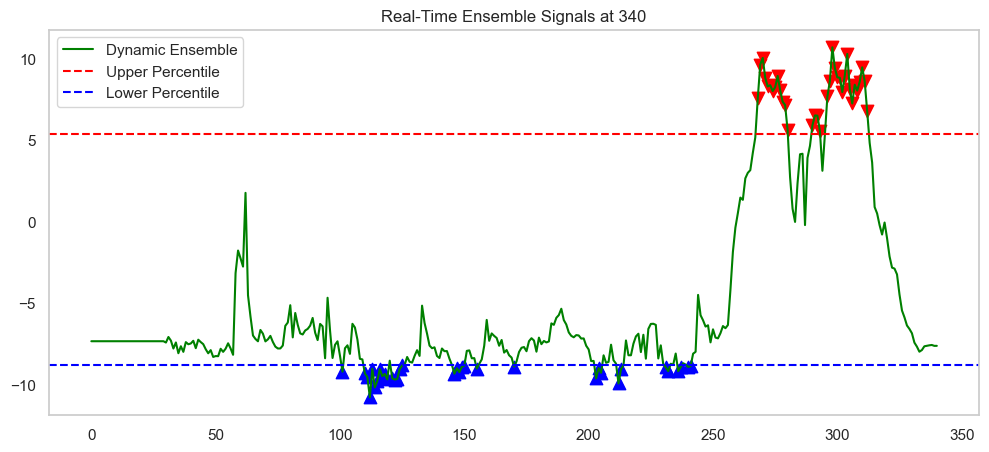

Date: 341 | Ensemble Z-score: -7.5034 | Action: HOLD
Date: 342 | Ensemble Z-score: -7.4648 | Action: HOLD
Date: 343 | Ensemble Z-score: -7.4258 | Action: HOLD
Date: 344 | Ensemble Z-score: -7.3484 | Action: HOLD
Date: 345 | Ensemble Z-score: -7.2765 | Action: HOLD
Date: 346 | Ensemble Z-score: -7.2582 | Action: HOLD
Date: 347 | Ensemble Z-score: -7.2980 | Action: HOLD
Date: 348 | Ensemble Z-score: -7.1796 | Action: HOLD
Date: 349 | Ensemble Z-score: -7.0873 | Action: HOLD


KeyboardInterrupt: 

In [28]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import time  # for simulating real-time updates

# -----------------------------
# 1️⃣ Load models
# -----------------------------
dnn_model_path  = r"C:\Users\katle\OneDrive\Documents\Jupyter Notebooks\My Research Notebook\Makatjane and Shoko (2025)\Pairs trading-Cryptocurrency\Dnn.h5"
lstm_model_path = r"C:\Users\katle\OneDrive\Documents\Jupyter Notebooks\My Research Notebook\Makatjane and Shoko (2025)\Pairs trading-Cryptocurrency\Lstm.h5"

dnn_model  = load_model(dnn_model_path, compile=False)
lstm_model = load_model(lstm_model_path, compile=False)

# -----------------------------
# 2️⃣ Load initial dataset
# -----------------------------
Katleho = pd.read_csv('Pairs.csv', delimiter=';', decimal=',')
Katleho['Date'] = pd.to_datetime(Katleho['Date'])
Hlompho = Katleho.set_index('Date')

# -----------------------------
# 3️⃣ Johansen Cointegration
# -----------------------------
from statsmodels.tsa.vector_ar.vecm import coint_johansen

Hlompho_log = np.log(Hlompho)
det_order = 0
k_ar_diff = 1
johansen_test = coint_johansen(Hlompho_log, det_order, k_ar_diff)
beta = johansen_test.evec[:, 0]  # first cointegration vector

# -----------------------------
# 4️⃣ Function: Compute spread & z-score
# -----------------------------
def compute_zscore(data, beta):
    spread = data.values @ beta
    spread_series = pd.Series(spread, index=data.index)
    zscore = (spread_series - spread_series.mean()) / spread_series.std()
    return zscore

# -----------------------------
# 5️⃣ Function: Build ensemble
# -----------------------------
def build_ensemble(dnn_model, lstm_model, zscore_series, window_size=20):
    X_seq = []
    for i in range(len(zscore_series) - window_size):
        X_seq.append(zscore_series[i:i+window_size])
    X_seq = np.array(X_seq)
    if len(X_seq) == 0:
        return pd.Series(dtype=float)  # not enough data

    X_lstm = X_seq.reshape((X_seq.shape[0], window_size, 1))
    y_pred_dnn  = dnn_model.predict(X_seq, verbose=0).flatten()
    y_pred_lstm = lstm_model.predict(X_lstm, verbose=0).flatten()

    true_series = pd.Series(zscore_series[window_size:])
    dnn_series  = pd.Series(y_pred_dnn)
    lstm_series = pd.Series(y_pred_lstm)

    rolling_window = min(30, len(true_series))
    rolling_mse_dnn  = ((dnn_series - true_series) ** 2).rolling(rolling_window).mean()
    rolling_mse_lstm = ((lstm_series - true_series) ** 2).rolling(rolling_window).mean()

    weights_dnn  = 1 / rolling_mse_dnn
    weights_lstm = 1 / rolling_mse_lstm
    weights_sum  = weights_dnn + weights_lstm
    weights_dnn  = weights_dnn / weights_sum
    weights_lstm = weights_lstm / weights_sum

    ensemble_pred = weights_dnn * dnn_series + weights_lstm * lstm_series
    ensemble_pred = ensemble_pred.fillna(method='bfill')
    ensemble_pred.index = true_series.index

    return ensemble_pred

# -----------------------------
# 6️⃣ Function: Generate signals
# -----------------------------
def generate_signals(ensemble_series, upper_pct=90, lower_pct=10):
    upper = np.percentile(ensemble_series, upper_pct)
    lower = np.percentile(ensemble_series, lower_pct)
    signals = np.where(ensemble_series > upper, -1, np.where(ensemble_series < lower, 1, 0))
    return signals, upper, lower

# -----------------------------
# 7️⃣ Real-time simulation / streaming
# -----------------------------
window_size = 20

# Assume new_data_stream is an iterable of new rows coming in
# For demo, we simulate by iterating through the original dataset
for t in range(window_size, len(Hlompho_log)):
    current_data = Hlompho_log.iloc[:t+1]  # take all data until now
    zscore = compute_zscore(current_data, beta)

    ensemble_pred = build_ensemble(dnn_model, lstm_model, zscore.values, window_size=window_size)
    if len(ensemble_pred) == 0:
        continue  # not enough data yet

    signals, upper, lower = generate_signals(ensemble_pred)

    # Latest signal
    latest_signal = signals[-1]
    if latest_signal == 1:
        action = "BUY"
    elif latest_signal == -1:
        action = "SELL"
    else:
        action = "HOLD"

    print(f"Date: {ensemble_pred.index[-1]} | Ensemble Z-score: {ensemble_pred.values[-1]:.4f} | Action: {action}")

    # Optional: live plot (update every 10 steps)
    if t % 10 == 0:
        plt.figure(figsize=(12,5))
        plt.plot(ensemble_pred, label='Dynamic Ensemble', color='green')
        plt.axhline(upper, color='red', linestyle='--', label='Upper Percentile')
        plt.axhline(lower, color='blue', linestyle='--', label='Lower Percentile')
        plt.scatter(ensemble_pred.index[signals==1], ensemble_pred[signals==1], color='blue', marker='^', s=80)
        plt.scatter(ensemble_pred.index[signals==-1], ensemble_pred[signals==-1], color='red', marker='v', s=80)
        plt.title(f'Real-Time Ensemble Signals at {ensemble_pred.index[-1]}')
        plt.legend()
        plt.grid(False)
        plt.show()

    # Simulate real-time delay
    time.sleep(0.1)  # remove or adjust in real deployment


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from binance.client import Client
import time

# -----------------------------
# 1️⃣ Binance API setup
# -----------------------------
api_key = "YOUR_BINANCE_API_KEY"
api_secret = "YOUR_BINANCE_API_SECRET"
client = Client(api_key, api_secret)

# -----------------------------
# 2️⃣ Load trained models
# -----------------------------
dnn_model  = load_model(r"Dnn.h5", compile=False)
lstm_model = load_model(r"Lstm.h5", compile=False)

# -----------------------------
# 3️⃣ Define pairs and log-price storage
# -----------------------------
pairs = ["BNBUSDT", "ETHUSDT"]  # example pair
window_size = 5
price_history = pd.DataFrame(columns=pairs)

# -----------------------------
# 4️⃣ Function: Compute z-score from cointegration
# -----------------------------
# For simplicity, we compute beta using first batch of historical data
def get_beta(prices):
    from statsmodels.tsa.vector_ar.vecm import coint_johansen
    log_prices = np.log(prices)
    johansen_test = coint_johansen(log_prices, det_order=0, k_ar_diff=1)
    beta = johansen_test.evec[:, 0]  # first cointegration vector
    return beta

# -----------------------------
# 5️⃣ Function: Compute z-score spread
# -----------------------------
def compute_zscore(prices, beta):
    spread = prices.values @ beta
    zscore = (spread - np.mean(spread)) / np.std(spread)
    return pd.Series(zscore, index=prices.index)

# -----------------------------
# 6️⃣ Ensemble prediction
# -----------------------------
def build_ensemble(dnn_model, lstm_model, zscore_series, window_size=20):
    X_seq = []
    for i in range(len(zscore_series) - window_size):
        X_seq.append(zscore_series[i:i+window_size])
    X_seq = np.array(X_seq)
    if len(X_seq) == 0:
        return pd.Series(dtype=float)

    X_lstm = X_seq.reshape((X_seq.shape[0], window_size, 1))
    y_pred_dnn  = dnn_model.predict(X_seq, verbose=0).flatten()
    y_pred_lstm = lstm_model.predict(X_lstm, verbose=0).flatten()

    true_series = pd.Series(zscore_series[window_size:])
    dnn_series  = pd.Series(y_pred_dnn)
    lstm_series = pd.Series(y_pred_lstm)

    rolling_window = min(30, len(true_series))
    rolling_mse_dnn  = ((dnn_series - true_series) ** 2).rolling(rolling_window).mean()
    rolling_mse_lstm = ((lstm_series - true_series) ** 2).rolling(rolling_window).mean()

    weights_dnn  = 1 / rolling_mse_dnn
    weights_lstm = 1 / rolling_mse_lstm
    weights_sum  = weights_dnn + weights_lstm
    weights_dnn  = weights_dnn / weights_sum
    weights_lstm = weights_lstm / weights_sum

    ensemble_pred = weights_dnn * dnn_series + weights_lstm * lstm_series
    ensemble_pred = ensemble_pred.fillna(method='bfill')
    ensemble_pred.index = true_series.index
    return ensemble_pred

# -----------------------------
# 7️⃣ Signal generator
# -----------------------------
def generate_signals(ensemble_series, upper_pct=80, lower_pct=20):
    upper = np.percentile(ensemble_series, upper_pct)
    lower = np.percentile(ensemble_series, lower_pct)
    signals = np.where(ensemble_series > upper, -1, np.where(ensemble_series < lower, 1, 0))
    return signals, upper, lower

# -----------------------------
# 8️⃣ Real-time loop
# -----------------------------
beta = None  # will be computed once we have enough data
while True:
    # Fetch latest prices
    new_prices = {}
    for symbol in pairs:
        klines = client.get_klines(symbol=symbol, interval=Client.KLINE_INTERVAL_1MINUTE, limit=1)
        close_price = float(klines[0][4])
        new_prices[symbol] = close_price

    # Append to history
    price_history = price_history.append(pd.DataFrame([new_prices], index=[pd.Timestamp.now()]))
    price_history = price_history.tail(100)  # keep last 100 points

    if price_history.shape[0] >= window_size:
        if beta is None:
            beta = get_beta(price_history)  # compute once at start

        zscore_series = compute_zscore(price_history, beta)
        ensemble_pred = build_ensemble(dnn_model, lstm_model, zscore_series.values, window_size)

        if len(ensemble_pred) > 0:
            signals, upper, lower = generate_signals(ensemble_pred)
            latest_signal = signals[-1]

            if latest_signal == 1:
                action = "BUY"
            elif latest_signal == -1:
                action = "SELL"
            else:
                action = "HOLD"

            print(f"Time: {ensemble_pred.index[-1]} | Ensemble Z: {ensemble_pred.values[-1]:.4f} | Signal: {action}")

    time.sleep(60)  # fetch every minute


AttributeError: 'DataFrame' object has no attribute 'append'

In [12]:
from binance.client import Client

api_key = "yOnpx3pfPHIP9m6xOOGrOWgq3eK3GZWtxMxTkLmDhSaLOgP3z17hhZUbrkwxefcP"
api_secret = "rlmIFIORwDKlw2hGatBVCptb3Ld1YfCePuJHraG78OrA6Y3oIqpu4Zp4RErRJK7V"
client = Client(api_key, api_secret)

# Example: fetch current price
price = client.get_symbol_ticker(symbol="BTCUSDT")
print(price)


{'symbol': 'BTCUSDT', 'price': '96457.68000000'}


In [18]:
from fastapi import FastAPI
from binance.client import Client
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from Katjies import api_key, api_secret  # Import directly from your file

# ------------------ Binance client ------------------
client = Client(api_key, api_secret)

# ------------------ Load ML models ------------------
dnn_model  = load_model("Dnn.h5", compile=False)
lstm_model = load_model("Lstm.h5", compile=False)

# ------------------ FastAPI app ------------------
app = FastAPI()

# ------------------ Trading pairs and price history ------------------
pairs = ["BNBUSDT", "ETHUSDT"]
window_size = 5
price_history = pd.DataFrame(columns=pairs)
beta = None  # cointegration vector

# ------------------ Utility functions ------------------
def get_beta(prices):
    log_prices = np.log(prices)
    johansen_test = coint_johansen(log_prices, det_order=0, k_ar_diff=1)
    beta = johansen_test.evec[:, 0]  # first cointegration vector
    return beta

def compute_zscore(prices, beta):
    spread = prices.values @ beta
    zscore = (spread - np.mean(spread)) / np.std(spread)
    return pd.Series(zscore, index=prices.index)

def build_ensemble(dnn_model, lstm_model, zscore_series, window_size=20):
    X_seq = []
    for i in range(len(zscore_series) - window_size):
        X_seq.append(zscore_series[i:i+window_size])
    X_seq = np.array(X_seq)
    if len(X_seq) == 0:
        return pd.Series(dtype=float)

    X_lstm = X_seq.reshape((X_seq.shape[0], window_size, 1))
    y_pred_dnn  = dnn_model.predict(X_seq, verbose=0).flatten()
    y_pred_lstm = lstm_model.predict(X_lstm, verbose=0).flatten()

    true_series = pd.Series(zscore_series[window_size:])
    dnn_series  = pd.Series(y_pred_dnn)
    lstm_series = pd.Series(y_pred_lstm)

    rolling_window = min(30, len(true_series))
    rolling_mse_dnn  = ((dnn_series - true_series) ** 2).rolling(rolling_window).mean()
    rolling_mse_lstm = ((lstm_series - true_series) ** 2).rolling(rolling_window).mean()

    weights_dnn  = 1 / rolling_mse_dnn
    weights_lstm = 1 / rolling_mse_lstm
    weights_sum  = weights_dnn + weights_lstm
    weights_dnn  = weights_dnn / weights_sum
    weights_lstm = weights_lstm / weights_sum

    ensemble_pred = weights_dnn * dnn_series + weights_lstm * lstm_series
    ensemble_pred = ensemble_pred.fillna(method='bfill')
    ensemble_pred.index = true_series.index
    return ensemble_pred

def generate_signals(ensemble_series, upper_pct=80, lower_pct=20):
    upper = np.percentile(ensemble_series, upper_pct)
    lower = np.percentile(ensemble_series, lower_pct=20)
    signals = np.where(ensemble_series > upper, -1, np.where(ensemble_series < lower, 1, 0))
    return signals, upper, lower

# ------------------ FastAPI endpoint ------------------
@app.get("/signal")
def get_signal():
    global price_history, window_size, beta

    # Fetch latest prices
    new_prices = {}
    for symbol in pairs:
        try:
            klines = client.get_klines(symbol=symbol, interval=Client.KLINE_INTERVAL_1MINUTE, limit=1)
            close_price = float(klines[0][4])
            new_prices[symbol] = close_price
        except Exception as e:
            return {"error": f"Failed to fetch {symbol}: {e}"}

    # Update price history
    price_history = pd.concat([price_history, pd.DataFrame([new_prices], index=[pd.Timestamp.now()])])
    price_history = price_history.tail(100)

    if price_history.shape[0] >= window_size:
        if beta is None:
            beta = get_beta(price_history)

        zscore_series = compute_zscore(price_history, beta)
        ensemble_pred = build_ensemble(dnn_model, lstm_model, zscore_series.values, window_size)

        if len(ensemble_pred) > 0:
            signals, _, _ = generate_signals(ensemble_pred)
            latest_signal = signals[-1]
            action = "HOLD"
            if latest_signal == 1:
                action = "BUY"
            elif latest_signal == -1:
                action = "SELL"

            return {
                "time": str(ensemble_pred.index[-1]),
                "zscore": float(ensemble_pred.values[-1]),
                "signal": action
            }

    return {"signal": "Not enough data yet"}
